In [70]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import AutoMinorLocator
import IPython
import imgkit

In [ ]:
# This is a clean-up version aka final version (maybe)

# Neat CNF Suspensions 

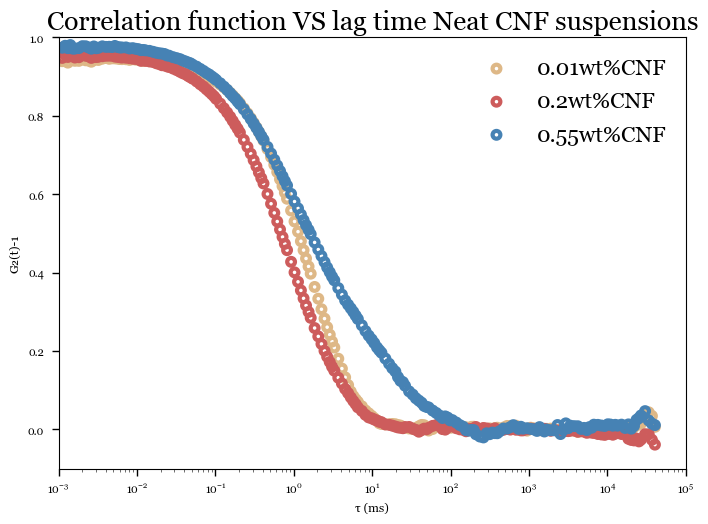

In [518]:
# Neat CNF Suspensions at 65.1 degree, 20C, 2D Autocorrelation
# Import Correlation Function data 
cnf001 = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/0.01CNF/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf02 = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/0.2CNF/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf055 = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/0.55CNF/Measurement 1/Repetition2/Correlation Function.csv', header= None, skiprows=[0,1,2])

lagtime_cnf001 = cnf001.iloc[28:,0]
lagtime_cnf001_ms = lagtime_cnf001  * 1000
corrfx_cnf001 = cnf001.iloc[28:,1]
lagtime_cnf02 = cnf02.iloc[28:,0]
lagtime_cnf02_ms = lagtime_cnf02  * 1000
corrfx_cnf02 = cnf02.iloc[28:,1]
lagtime_cnf055 = cnf055.iloc[28:,0]
lagtime_cnf055_ms = lagtime_cnf055  * 1000
corrfx_cnf055 = cnf055.iloc[28:,1]

plt.scatter(lagtime_cnf001_ms ,corrfx_cnf001, marker='o', facecolors='none', linewidths=3, edgecolors='burlywood', label = '0.01wt%CNF')
plt.scatter(lagtime_cnf02_ms ,corrfx_cnf02, marker='o', facecolors='none', linewidths=3, edgecolors='indianred', label = '0.2wt%CNF')
plt.scatter(lagtime_cnf055_ms ,corrfx_cnf055,  marker='o', facecolors='none', linewidths=3, edgecolors='steelblue', label = '0.55wt%CNF')
#plt.scatter(lagtime_cnf001 ,corrfx_cnf001, marker='o', facecolors='none', edgecolors='burlywood', label = '0.01wt%CNF')
#plt.scatter(lagtime_cnf02 ,corrfx_cnf02, marker='o', facecolors='none', edgecolors='coral', label = '0.2wt%CNF')
#plt.scatter(lagtime_cnf055 ,corrfx_cnf055,  marker='o', facecolors='none', edgecolors='seagreen', label = '0.55wt%CNF')
plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')
plt.xscale("log")
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time Neat CNF suspensions')
plt.savefig("Correlation function VS lag time Neat CNF suspensions 2DAuto 65.1deg.png", dpi=1500, bbox_inches='tight')
#plt.show()

In [519]:
# Fitting to 𝑔(𝑡)=𝐴𝑒𝑥𝑝[−(𝑡/𝜏)^𝛽]

def g(t, A, tau, beta):
    return A * np.exp(-(t/tau)**beta)

t_cnf001 = lagtime_cnf001_ms
g_t_cnf001 = corrfx_cnf001
t_cnf02 = lagtime_cnf02_ms
g_t_cnf02 = corrfx_cnf02
t_cnf055 = lagtime_cnf055_ms
g_t_cnf055 = corrfx_cnf055

p0 = [1, 1,1]

# Set the parameter bounds
bounds = ([0, 0.001, 0], [1, 100000, 1])

params_cnf001, cov_cnf001 = curve_fit(g, t_cnf001, g_t_cnf001, p0, bounds=bounds)
A_fit_cnf001, tau_fit_cnf001, beta_fit_cnf001 = params_cnf001

params_cnf02, cov_cnf02 = curve_fit(g, t_cnf02, g_t_cnf02, p0, bounds=bounds)
A_fit_cnf02, tau_fit_cnf02, beta_fit_cnf02 = params_cnf02

params_cnf055, cov_cnf055 = curve_fit(g, t_cnf055, g_t_cnf055, p0, bounds=bounds)
A_fit_cnf055, tau_fit_cnf055, beta_fit_cnf055 = params_cnf055

# Plain Table
#data_neatCNF = [[A_fit_cnf001, A_fit_cnf02, A_fit_cnf055],
#                [tau_fit_cnf001, tau_fit_cnf02, tau_fit_cnf055], 
#                [beta_fit_cnf001, beta_fit_cnf02, beta_fit_cnf055]]

#round_data_neatCNF =  np.round(data_neatCNF, decimals=3)
#columns_neatCNF = ['0.01wt.% CNF', '0.2wt.% CNF', '0.55wt.% CNF']
#rows_neatCNF = ['A', '\u03C4 [ms]', '\u03B2']
#fig, ax = plt.subplots()                
#table = ax.table(cellText=round_data_neatCNF, rowLabels=rows_neatCNF, colLabels=columns_neatCNF, loc='center', cellLoc='center')
#ax.axis('off')               
#plt.show()

# Table using DataFrame

samples_neatCNF = ['0.01wt.% CNF', '0.2wt.% CNF', '0.55wt.% CNF']
A_fitted_neatCNF = [A_fit_cnf001, A_fit_cnf02, A_fit_cnf055]
t_fitted_neatCNF = [tau_fit_cnf001, tau_fit_cnf02, tau_fit_cnf055]
beta_fitted_neatCNF =  [beta_fit_cnf001, beta_fit_cnf02, beta_fit_cnf055]

table_Parameters_neatCNF = {
    '': samples_neatCNF,
    'A' : A_fitted_neatCNF,
    '\u03C4 (ms)': t_fitted_neatCNF,
    '\u03B2': beta_fitted_neatCNF,
}

table_Parameters_neatCNF_draw = pd.DataFrame(table_Parameters_neatCNF)

styled_table_Parameters_neatCNF_draw = table_Parameters_neatCNF_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='Reds') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.3f}', '\u03B2': '{:.3f}'})\
    .hide(axis='index')

styled_table_Parameters_neatCNF_draw           


In [520]:
# Save the styled table method 1
# Convert styled DataFrame to HTML table
html_styled_table_Parameters_neatCNF = styled_table_Parameters_neatCNF_draw.to_html()

# Save the HTML table to a temporary file
with open('temp.html', 'w') as f:
    f.write(html_styled_table_Parameters_neatCNF)
options = {
    'format': 'png',
    'quiet': '',
    'enable-local-file-access': '',
    'quality': 100,
    'zoom': 3,
   # 'width': 1200,  # A djust the width and height as needed
   # 'height': 1200,
    'encoding': 'UTF-8',  # Specify the character encoding
}
# Save the HTML table as a PNG image
imgkit.from_file('temp.html', 'Table of Fitted Parameters for Neat CNF Suspensions.png', options=options)

True

In [ ]:
# Save the styled table method 2
# Save the styled table to a html table 
html_styled_table_Parameters_neatCNF = 'styled_table_Parameters_neatCNF_draw.html'
styled_table_Parameters_neatCNF_draw.to_html(html_styled_table_Parameters_neatCNF)
#IPython.display.display(IPython.display.HTML(html_styled_table_Parameters_neatCNF))

# Convert the HTML file to an image/Save the htmal table to a png file
options = {
    'format': 'png',
    'quiet': '',
    'enable-local-file-access': '',
    'quality': 100,
    'zoom': 3,
   # 'width': 1200,  # A djust the width and height as needed
   # 'height': 1200,
    'encoding': 'UTF-8',  # Specify the character encoding
}
#image_table_Parameters_neatCNF = 'Table Fitted Parameters Neat CNF.png'
#imgkit.from_file(html_styled_table_Parameters_neatCNF, image_table_Parameters_neatCNF, options=options)

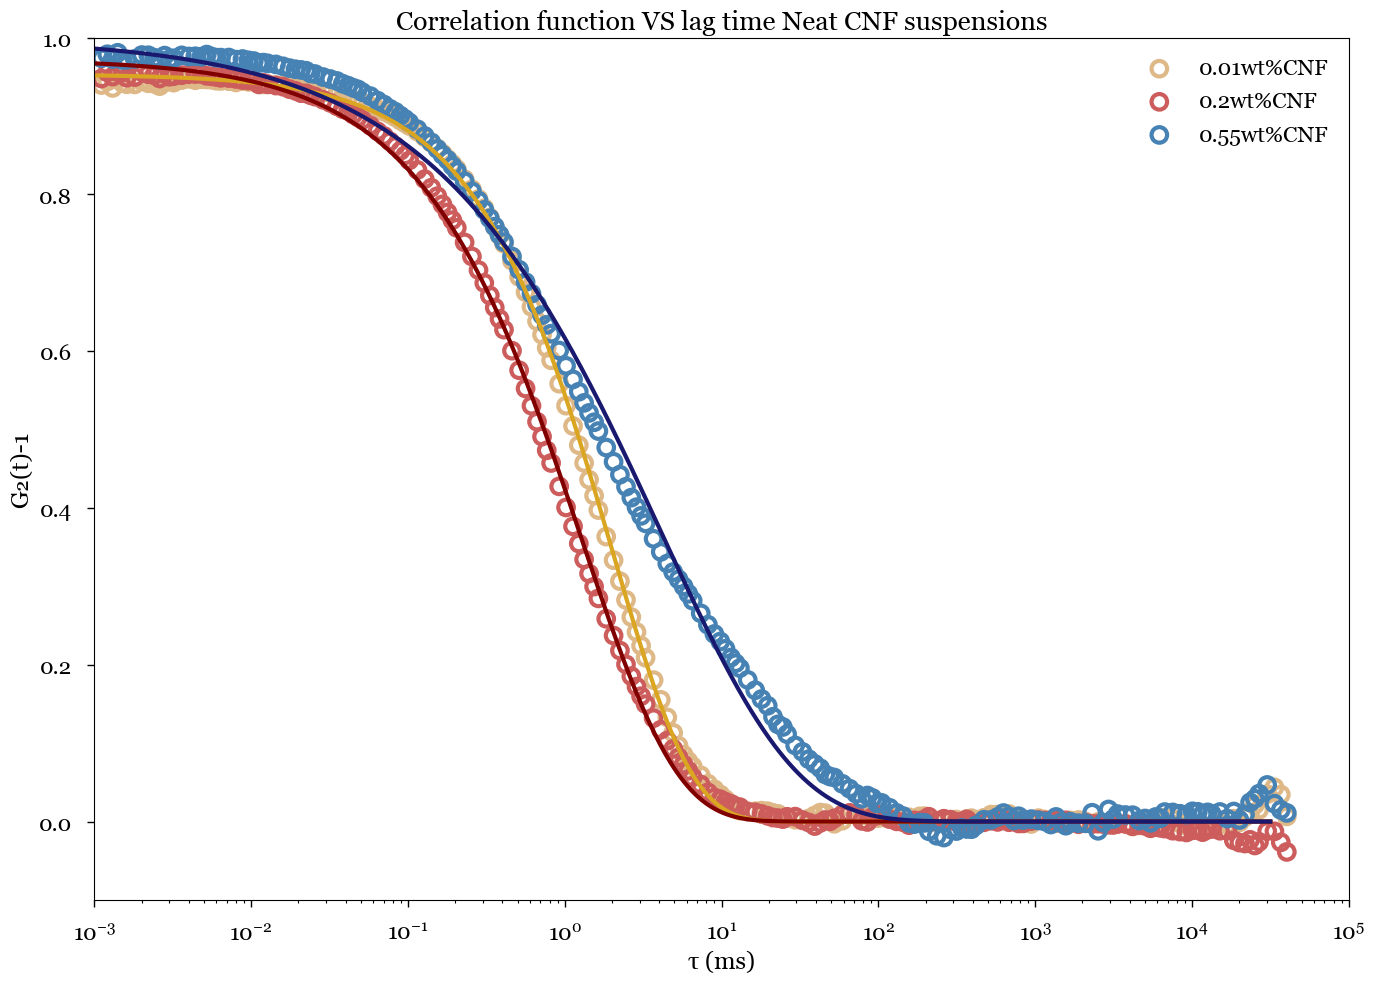

In [521]:
# Plot the fitting

t_fit_cnf001 = np.logspace(-3, 4.5, 1000)
g_fit_cnf001 = g(t_fit_cnf001, A_fit_cnf001, tau_fit_cnf001, beta_fit_cnf001)
t_fit_cnf02 = np.logspace(-3, 4.5, 1000)
g_fit_cnf02 = g(t_fit_cnf02, A_fit_cnf02, tau_fit_cnf02, beta_fit_cnf02)
t_fit_cnf055 = np.logspace(-3, 4.5, 1000)
g_fit_cnf055 = g(t_fit_cnf055, A_fit_cnf055, tau_fit_cnf055, beta_fit_cnf055)

plt.scatter(t_cnf001, g_t_cnf001, marker='o', facecolors='none', linewidths=3, edgecolors='burlywood', label='0.01wt%CNF')
plt.semilogx(t_fit_cnf001, g_fit_cnf001, linestyle='solid', color = 'goldenrod', linewidth=3)#,  label='0.01wt%CNF fit')
plt.scatter(t_cnf02, g_t_cnf02, marker='o', facecolors='none', linewidths=3, edgecolors='indianred', label='0.2wt%CNF')
plt.semilogx(t_fit_cnf02, g_fit_cnf02, linestyle='solid', color = 'maroon', linewidth=3)#, label='0.2wt%CNF fit')
plt.scatter(t_cnf055, g_t_cnf055, marker='o', facecolors='none', linewidths=3, edgecolors='steelblue', label='0.55wt%CNF')
plt.semilogx(t_fit_cnf055, g_fit_cnf055, linestyle='solid', color = 'midnightblue', linewidth=3) #,  label='0.55wt%CNF fit')
plt.style.use('seaborn-poster')
plt.xscale("log")
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')  
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time Neat CNF suspensions')
plt.savefig("Correlation function VS lag time Neat CNF suspensions 2DAuto 65.1deg fit.png", dpi=1500, bbox_inches='tight')
plt.show()

[0.85165948 0.72565287 0.51109097]


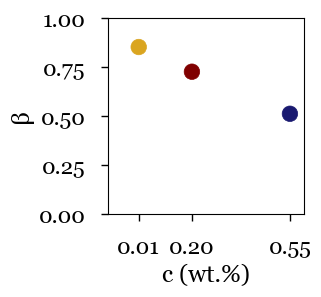

In [522]:
# Plot fitted Beta

cnf_conc = [0.01, 0.2, 0.55]
beta_neatCNF = np.array([beta_fit_cnf001, beta_fit_cnf02, beta_fit_cnf055])
print(beta_neatCNF)
#colors = ['burlywood', 'indianred', 'steelblue']
colors = ['goldenrod', 'maroon', 'midnightblue']
plt.style.use('_mpl-gallery-nogrid')
# plot
plt.scatter(cnf_conc, beta_neatCNF, c=colors)
plt.xlabel('c (wt.%)')
plt.ylabel('\u03B2')
plt.xlim(-0.1,0.6)
plt.ylim(0,1)
plt.xticks([0.01,0.2,0.55])
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
#plt.title('Stretched exponential function vs CNF concentrations')
plt.savefig("Stretched exponential function vs CNF concentrations Neat CNF.png", dpi=1500, bbox_inches='tight')
plt.show()

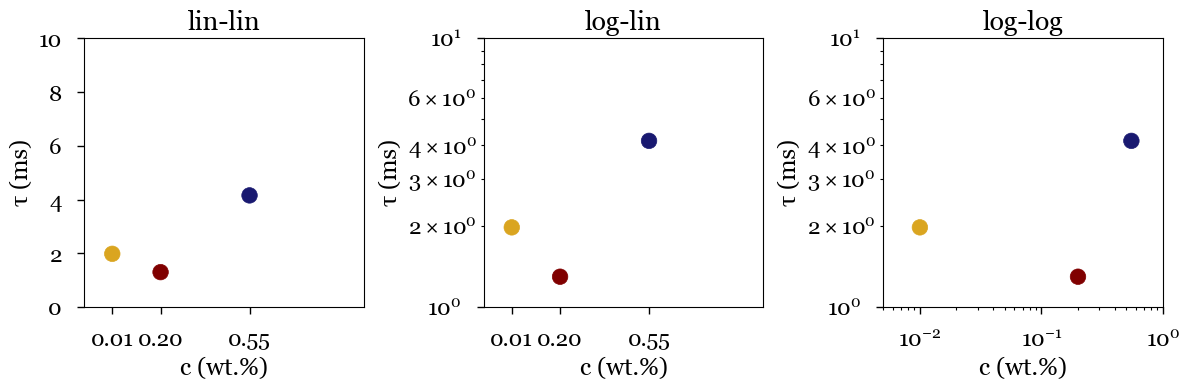

In [523]:
# Plot tau 

cnf_conc = [0.01, 0.2, 0.55]
tau = np.array([tau_fit_cnf001, tau_fit_cnf02, tau_fit_cnf055])
colors = ['goldenrod', 'maroon', 'midnightblue']
plt.style.use('_mpl-gallery-nogrid')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

#fig.subtitle('Lag time as a function of NaCl concentrations with 0.01wt.%CNF at 65.1\u00b0 2D Auto')
axes[0].scatter(cnf_conc, tau , c=colors)
axes[0].set_title('lin-lin')
axes[0].set_xlabel('c (wt.%)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_ylim(0,10)
axes[0].set_xlim(-0.1, 1)
axes[0].set_xticks([0.01,0.2,0.55])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

axes[1].scatter(cnf_conc, tau , c=colors)
axes[1].set_title('log-lin')
axes[1].set_xlabel('c (wt.%)')
axes[1].set_ylabel('\u03C4 (ms)')
axes[1].set_ylim(1,10)
axes[1].set_xlim(-0.1,1)
axes[1].set_xticks([0.01,0.2,0.55])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")

axes[2].scatter(cnf_conc, tau , c=colors)
axes[2].set_title('log-log')
axes[2].set_xlabel('c (wt.%)')
axes[2].set_ylabel('\u03C4 (ms)')
axes[2].set_ylim(1,10)
axes[2].set_xlim(0.005,1)
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
plt.savefig("Lag time as a function of CNF concentrations at 65.1\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

# 0.01CNF/NaCl Suspensions at 65.1 degree, 20C, 2D Autocorrelation

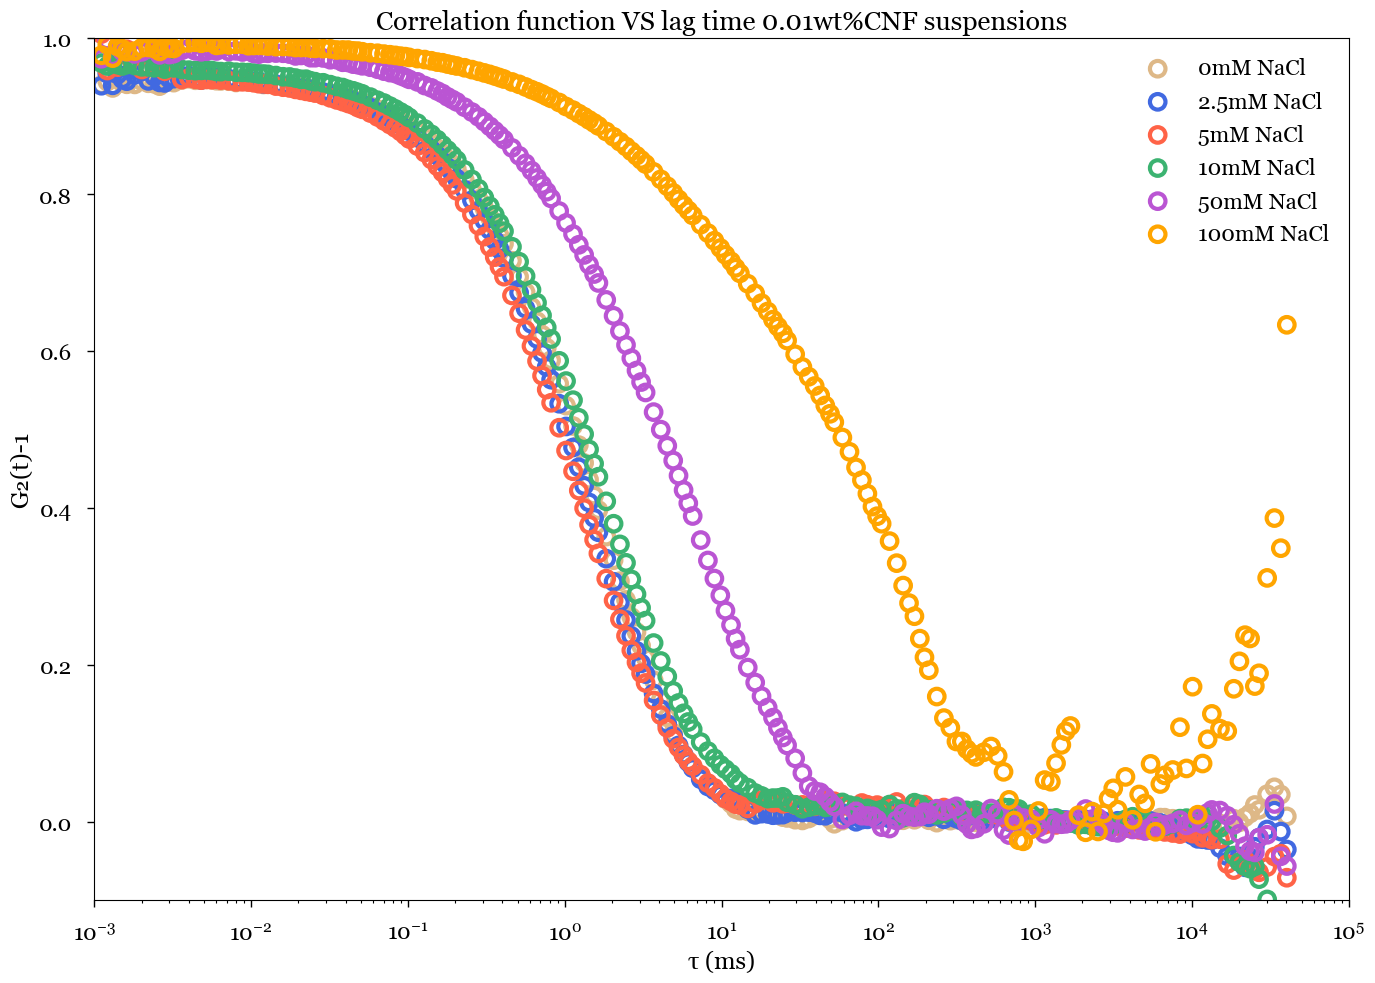

In [524]:
# Import Correlation Function data 

cnf001_025nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.01CNF2.5NaCl/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_050nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.01CNF5NaCl/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_100nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.01CNF10NaCl/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_500nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.01CNF50NaCl/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_1000nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.01CNF100NaCl/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])

lagtime_cnf001_0nacl = cnf001.iloc[28:,0]
lagtime_cnf001_0nacl_ms = lagtime_cnf001_0nacl*1000
corrfx_cnf001_0nacl = cnf001.iloc[28:,1]

lagtime_cnf001_025nacl = cnf001_025nacl.iloc[28:,0]
lagtime_cnf001_025nacl_ms = lagtime_cnf001_025nacl*1000
corrfx_cnf001_025nacl = cnf001_025nacl.iloc[28:,1]

lagtime_cnf001_050nacl = cnf001_050nacl.iloc[28:,0]
lagtime_cnf001_050nacl_ms = lagtime_cnf001_050nacl*1000
corrfx_cnf001_050nacl = cnf001_050nacl.iloc[28:,1]

lagtime_cnf001_100nacl = cnf001_100nacl.iloc[28:,0]
lagtime_cnf001_100nacl_ms = lagtime_cnf001_100nacl*1000
corrfx_cnf001_100nacl = cnf001_100nacl.iloc[28:,1]

lagtime_cnf001_500nacl = cnf001_500nacl.iloc[28:,0]
lagtime_cnf001_500nacl_ms = lagtime_cnf001_500nacl*1000
corrfx_cnf001_500nacl = cnf001_500nacl.iloc[28:,1]

lagtime_cnf001_1000nacl = cnf001_1000nacl.iloc[28:,0]
lagtime_cnf001_1000nacl_ms = lagtime_cnf001_1000nacl*1000
corrfx_cnf001_1000nacl = cnf001_1000nacl.iloc[28:,1]

plt.style.use('seaborn-poster')

plt.scatter(lagtime_cnf001_0nacl_ms ,corrfx_cnf001_0nacl, marker='o', facecolors='none', linewidths=3, edgecolors='burlywood', label = '0mM NaCl')
plt.scatter(lagtime_cnf001_025nacl_ms ,corrfx_cnf001_025nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='royalblue', label = '2.5mM NaCl')
plt.scatter(lagtime_cnf001_050nacl_ms ,corrfx_cnf001_050nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='tomato', label = '5mM NaCl')
plt.scatter(lagtime_cnf001_100nacl_ms ,corrfx_cnf001_100nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='mediumseagreen', label = '10mM NaCl')
plt.scatter(lagtime_cnf001_500nacl_ms ,corrfx_cnf001_500nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='mediumorchid', label = '50mM NaCl')
plt.scatter(lagtime_cnf001_1000nacl_ms ,corrfx_cnf001_1000nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='orange', label = '100mM NaCl')

plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')
plt.xscale("log")
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time 0.01wt%CNF suspensions')
plt.savefig("Correlation function VS Scattering angle of 0.01CNFNaCl at 65.1deg.png", dpi=1500, bbox_inches='tight')
plt.show()

In [525]:
# Fitting to 𝑔(𝑡)=𝐴𝑒𝑥𝑝[−(𝑡/𝜏)^𝛽]

def g(t, A, tau, beta):
    return A * np.exp(-(t/tau)**beta)

t_cnf001_0nacl = lagtime_cnf001_0nacl_ms
g_t_cnf001_0nacl = corrfx_cnf001_0nacl
t_cnf001_025nacl = lagtime_cnf001_025nacl_ms
g_t_cnf001_025nacl = corrfx_cnf001_025nacl
t_cnf001_050nacl = lagtime_cnf001_050nacl_ms
g_t_cnf001_050nacl = corrfx_cnf001_050nacl
t_cnf001_100nacl = lagtime_cnf001_100nacl_ms
g_t_cnf001_100nacl = corrfx_cnf001_100nacl
t_cnf001_500nacl = lagtime_cnf001_500nacl_ms
g_t_cnf001_500nacl = corrfx_cnf001_500nacl
t_cnf001_1000nacl = lagtime_cnf001_1000nacl_ms
g_t_cnf001_1000nacl = corrfx_cnf001_1000nacl

p0 = [1, 1, 1]
# Set the parameter bounds
bounds = ([0, 0.0001, 0], [1, 10000, 1])

params_cnf001_0nacl, cov_cnf001_0nacl = curve_fit(g, t_cnf001_0nacl, g_t_cnf001_0nacl, p0, bounds=bounds)
A_fit_cnf001_0nacl, tau_fit_cnf001_0nacl, beta_fit_cnf001_0nacl = params_cnf001_0nacl

params_cnf001_025nacl, cov_cnf001_025nacl = curve_fit(g, t_cnf001_025nacl, g_t_cnf001_025nacl, p0, bounds=bounds)
A_fit_cnf001_025nacl, tau_fit_cnf001_025nacl, beta_fit_cnf001_025nacl = params_cnf001_025nacl

params_cnf001_050nacl, cov_cnf001_050nacl = curve_fit(g, t_cnf001_050nacl, g_t_cnf001_050nacl, p0, bounds=bounds)
A_fit_cnf001_050nacl, tau_fit_cnf001_050nacl, beta_fit_cnf001_050nacl = params_cnf001_050nacl

params_cnf001_100nacl, cov_cnf001_100nacl = curve_fit(g, t_cnf001_100nacl, g_t_cnf001_100nacl, p0, bounds=bounds)
A_fit_cnf001_100nacl, tau_fit_cnf001_100nacl, beta_fit_cnf001_100nacl = params_cnf001_100nacl

params_cnf001_500nacl, cov_cnf001_500nacl = curve_fit(g, t_cnf001_500nacl, g_t_cnf001_500nacl, p0, bounds=bounds)
A_fit_cnf001_500nacl, tau_fit_cnf001_500nacl, beta_fit_cnf001_500nacl = params_cnf001_500nacl

params_cnf001_1000nacl, cov_cnf001_1000nacl = curve_fit(g, t_cnf001_1000nacl, g_t_cnf001_1000nacl, p0, bounds=bounds)
A_fit_cnf001_1000nacl, tau_fit_cnf001_1000nacl, beta_fit_cnf001_1000nacl = params_cnf001_1000nacl


# Table using DataFrame
samples_001CNF_NaCl = ['0mM NaCl','2.5mM NaCl', '5mM NaCl', '10mM NaCl', '50mM NaCl', '100mM NaCl']
A_fitted_001CNF_NaCl = [A_fit_cnf001_0nacl, A_fit_cnf001_025nacl, A_fit_cnf001_050nacl, A_fit_cnf001_100nacl, A_fit_cnf001_500nacl, A_fit_cnf001_1000nacl]
t_fitted_001CNF_NaCl = [tau_fit_cnf001_0nacl, tau_fit_cnf001_025nacl, tau_fit_cnf001_050nacl, tau_fit_cnf001_100nacl, tau_fit_cnf001_500nacl, tau_fit_cnf001_1000nacl]
beta_fitted_001CNF_NaCl =  [beta_fit_cnf001_0nacl, beta_fit_cnf001_025nacl, beta_fit_cnf001_050nacl, beta_fit_cnf001_100nacl, beta_fit_cnf001_500nacl, beta_fit_cnf001_1000nacl]
table_Parameters_001CNF_NaCl = {
    '0.01wt.%CNF with': samples_001CNF_NaCl ,
    'A' : A_fitted_001CNF_NaCl,
    '\u03C4 (ms)': t_fitted_001CNF_NaCl,
    '\u03B2': beta_fitted_001CNF_NaCl,
}

table_Parameters_001CNF_NaCl_draw = pd.DataFrame(table_Parameters_001CNF_NaCl)

styled_table_Parameters_001CNF_NaCl_draw = table_Parameters_001CNF_NaCl_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='Reds') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.3f}', '\u03B2': '{:.3f}'})\
    .hide(axis='index')

styled_table_Parameters_001CNF_NaCl_draw           

In [526]:
# Save the styled table method 1
# Convert styled DataFrame to HTML table
html_styled_table_Parameters_001CNF_NaCl = styled_table_Parameters_001CNF_NaCl_draw.to_html()

# Save the HTML table to a temporary file
with open('temp.html', 'w') as f:
    f.write(html_styled_table_Parameters_001CNF_NaCl)
    
# Save the HTML table as a PNG image
imgkit.from_file('temp.html', 'Table of Fitted Parameters for 0.01wt.%CNF with NaCl.png', options=options)

True

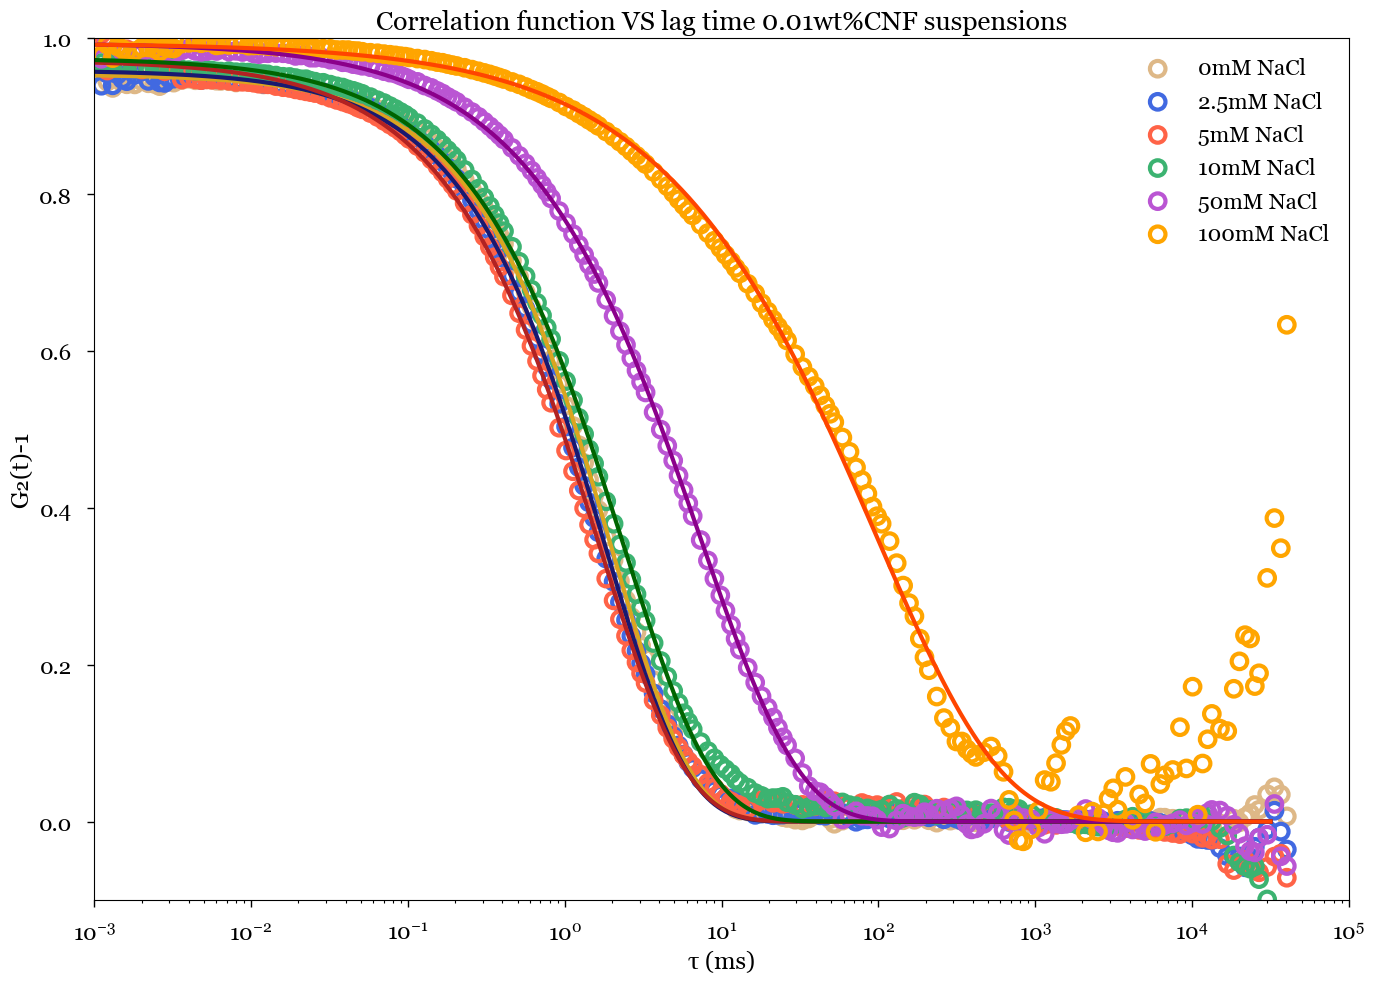

In [527]:
# Plot the fitting

t_fit_cnf001_0nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_0nacl = g(t_fit_cnf001_0nacl, A_fit_cnf001_0nacl, tau_fit_cnf001_0nacl, beta_fit_cnf001_0nacl)
t_fit_cnf001_025nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_025nacl = g(t_fit_cnf001_025nacl, A_fit_cnf001_025nacl, tau_fit_cnf001_025nacl, beta_fit_cnf001_025nacl)
t_fit_cnf001_050nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_050nacl = g(t_fit_cnf001_050nacl, A_fit_cnf001_050nacl, tau_fit_cnf001_050nacl, beta_fit_cnf001_050nacl)
t_fit_cnf001_100nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_100nacl = g(t_fit_cnf001_100nacl, A_fit_cnf001_100nacl, tau_fit_cnf001_100nacl, beta_fit_cnf001_100nacl)
t_fit_cnf001_500nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_500nacl = g(t_fit_cnf001_500nacl, A_fit_cnf001_500nacl, tau_fit_cnf001_500nacl, beta_fit_cnf001_500nacl)
t_fit_cnf001_1000nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_1000nacl = g(t_fit_cnf001_1000nacl, A_fit_cnf001_1000nacl, tau_fit_cnf001_1000nacl, beta_fit_cnf001_1000nacl)

plt.scatter(t_cnf001_0nacl, g_t_cnf001_0nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='burlywood', label='0mM NaCl')
plt.semilogx(t_fit_cnf001_0nacl, g_fit_cnf001_0nacl, linestyle='solid', color = 'goldenrod', linewidth = 3)#, label='0mM NaCl fit')
plt.scatter(t_cnf001_025nacl, g_t_cnf001_025nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='royalblue', label = '2.5mM NaCl')
plt.semilogx(t_fit_cnf001_025nacl, g_fit_cnf001_025nacl,  linestyle='solid', color = 'midnightblue', linewidth = 3)# label='2.5mM NaCl fit')
plt.scatter(t_cnf001_050nacl, g_t_cnf001_050nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='tomato', label = '5mM NaCl')
plt.semilogx(t_fit_cnf001_050nacl, g_fit_cnf001_050nacl,  linestyle='solid', color = 'firebrick', linewidth = 3)# label='5mM NaCl')
plt.scatter(t_cnf001_100nacl, g_t_cnf001_100nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='mediumseagreen', label = '10mM NaCl')
plt.semilogx(t_fit_cnf001_100nacl, g_fit_cnf001_100nacl,  linestyle='solid', color = 'darkgreen', linewidth = 3)# label='10mM NaCl fit')
plt.scatter(t_cnf001_500nacl, g_t_cnf001_500nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='mediumorchid', label = '50mM NaCl')
plt.semilogx(t_fit_cnf001_500nacl, g_fit_cnf001_500nacl,  linestyle='solid', color = 'darkmagenta', linewidth = 3)# label='50mM NaCl fit')
plt.scatter(t_cnf001_1000nacl, g_t_cnf001_1000nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='orange', label = '100mM NaCl')
plt.semilogx(t_fit_cnf001_1000nacl, g_fit_cnf001_1000nacl,  linestyle='solid', color = 'orangered', linewidth = 3)# label='100mM NaCl fit')

plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')
plt.xscale("log")
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time 0.01wt%CNF suspensions') 
plt.savefig("Correlation function VS Scattering angle_0.01CNFNaCl at 65.1deg fit.png", dpi=1500, bbox_inches='tight')
plt.show()

[0.85165948 0.82582158 0.77022893 0.76108218 0.68607028 0.5487545 ]


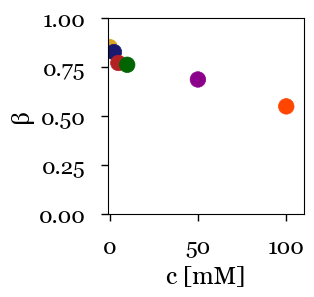

In [528]:
# Plot fitted Beta

salt_conc = [0, 2.5, 5, 10, 50, 100]
beta_cnf001_NaCl = np.array([beta_fit_cnf001_0nacl, beta_fit_cnf001_025nacl, beta_fit_cnf001_050nacl, beta_fit_cnf001_100nacl, beta_fit_cnf001_500nacl, beta_fit_cnf001_1000nacl])
print(beta_cnf001_NaCl)

colors = ['goldenrod', 'midnightblue', 'firebrick', 'darkgreen', 'darkmagenta', 'orangered']
plt.style.use('_mpl-gallery-nogrid')
plt.scatter(salt_conc, beta_cnf001_NaCl, c=colors)
plt.xlabel('c [mM]')
plt.ylabel('\u03B2')
plt.xlim(-0.9,110)
plt.ylim(0,1)
plt.xticks([0,50,100])
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.savefig("Stretched exponential function vs NaCl concentrations 0.01wt.%CNF.png", dpi=1500, bbox_inches='tight')
plt.show()

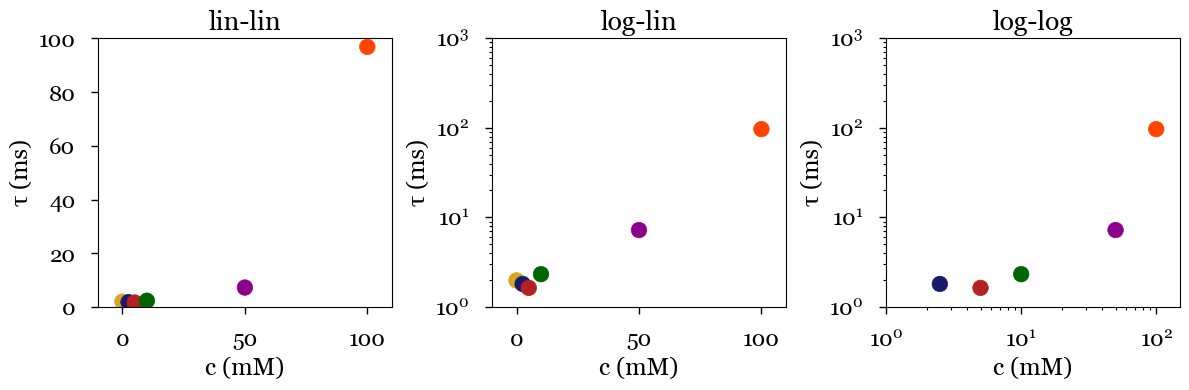

In [529]:
# Plot tau 

salt_conc = [0, 2.5, 5, 10, 50, 100]
taucnf001nacl = np.array([tau_fit_cnf001_0nacl, tau_fit_cnf001_025nacl, tau_fit_cnf001_050nacl, tau_fit_cnf001_100nacl, tau_fit_cnf001_500nacl, tau_fit_cnf001_1000nacl])
colors = ['goldenrod', 'midnightblue', 'firebrick', 'darkgreen', 'darkmagenta', 'orangered']
plt.style.use('_mpl-gallery-nogrid')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

#fig.subtitle('Lag time as a function of NaCl concentrations with 0.01wt.%CNF at 65.1\u00b0 2D Auto')
axes[0].scatter(salt_conc, taucnf001nacl, c=colors)
axes[0].set_title('lin-lin')
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_ylim(0,100)
axes[0].set_xlim(-10,110)
axes[0].set_xticks([0,50,100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

axes[1].scatter(salt_conc, taucnf001nacl, c=colors)
axes[1].set_title('log-lin')
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03C4 (ms)')
axes[1].set_ylim(1,1000)
axes[1].set_xlim(-10,110)
axes[1].set_xticks([0,50,100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")

axes[2].scatter(salt_conc, taucnf001nacl, c=colors)
axes[2].set_title('log-log')
axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('\u03C4 (ms)')
axes[2].set_ylim(1,1000)
axes[2].set_xlim(1,150)
#axes[2].set_xticks([0,50,100])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
plt.savefig("Lag time as a function of NaCl concentrations with 0.01wt.%CNF at 65.1\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

# 0.20CNF/NaCl Suspensions at 65.1 degree, 20C, 2D Autocorrelation

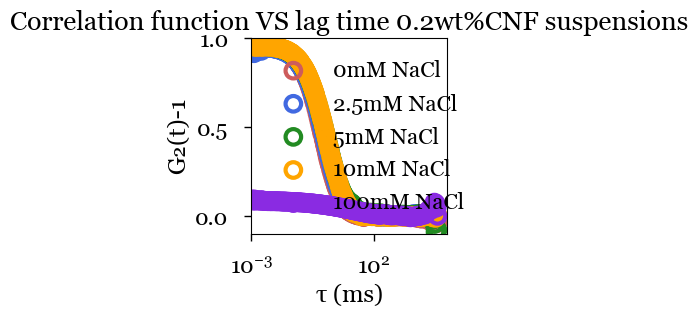

In [530]:
# Import Correlation Function data 

cnf02_025nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.2CNF2.5NaCl/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf02_050nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.2CNF5NaCl/Measurement 1/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf02_100nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.2CNF10NaCl/Measurement 1/Repetition2/Correlation Function.csv', header= None, skiprows=[0,1,2])
#cnf02_500nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.2CNF50NaCl/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf02_1000nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.2CNF100NaCl/Measurement 1/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])

lagtime_cnf02_0nacl = cnf02.iloc[28:,0]
lagtime_cnf02_0nacl_ms = lagtime_cnf02_0nacl*1000
corrfx_cnf02_0nacl = cnf02.iloc[28:,1]

lagtime_cnf02_025nacl = cnf02_025nacl.iloc[28:,0]
lagtime_cnf02_025nacl_ms = lagtime_cnf02_025nacl*1000
corrfx_cnf02_025nacl = cnf02_025nacl.iloc[28:,1]

lagtime_cnf02_050nacl = cnf02_050nacl.iloc[28:,0]
lagtime_cnf02_050nacl_ms = lagtime_cnf02_050nacl*1000
corrfx_cnf02_050nacl = cnf02_050nacl.iloc[28:,1]

lagtime_cnf02_100nacl = cnf02_100nacl.iloc[28:,0]
lagtime_cnf02_100nacl_ms = lagtime_cnf02_100nacl*1000
corrfx_cnf02_100nacl = cnf02_100nacl.iloc[28:,1]

#lagtime_cnf02_500nacl = cnf02_500nacl.iloc[28:,0]
#lagtime_cnf02_500nacl_ms = lagtime_cnf02_500nacl*1000
#corrfx_cnf02_500nacl = cnf02_500nacl.iloc[28:,1]

lagtime_cnf02_1000nacl = cnf02_1000nacl.iloc[28:,0]
lagtime_cnf02_1000nacl_ms = lagtime_cnf02_1000nacl*1000
corrfx_cnf02_1000nacl = cnf02_1000nacl.iloc[28:,1]

# Plot
plt.scatter(lagtime_cnf02_0nacl_ms,corrfx_cnf02_0nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='indianred', label = '0mM NaCl')
plt.scatter(lagtime_cnf02_025nacl_ms,corrfx_cnf02_025nacl, marker='o', facecolors='none', linewidths=3, edgecolors='royalblue', label = '2.5mM NaCl')
plt.scatter(lagtime_cnf02_050nacl_ms,corrfx_cnf02_050nacl, marker='o', facecolors='none', linewidths=3, edgecolors='forestgreen', label = '5mM NaCl')
plt.scatter(lagtime_cnf02_100nacl_ms,corrfx_cnf02_100nacl, marker='o', facecolors='none', linewidths=3, edgecolors='orange', label = '10mM NaCl')
#plt.scatter(lagtime_cnf02_500nacl_ms,corrfx_cnf02_500nacl, marker='o', facecolors='none', linewidths=3, edgecolors='teal', label = '50mM NaCl')
plt.scatter(lagtime_cnf02_1000nacl_ms,corrfx_cnf02_1000nacl, marker='o', facecolors='none', linewidths=3, edgecolors='blueviolet', label = '100mM NaCl')

plt.style.use('seaborn-poster')
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')
plt.xscale("log")
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time 0.2wt%CNF suspensions')
plt.savefig("Correlation function VS Scattering angle_0.2CNFNaCl at 65.1deg.png", dpi=1500, bbox_inches='tight')
plt.show()

In [531]:
# Fitting to 𝑔(𝑡)=𝐴𝑒𝑥𝑝[−(𝑡/𝜏)^𝛽]

def g(t, A, tau, beta):
    return A * np.exp(-(t/tau)**beta)

t_cnf02_0nacl = lagtime_cnf02_0nacl_ms
g_t_cnf02_0nacl = corrfx_cnf02_0nacl
t_cnf02_025nacl = lagtime_cnf02_025nacl_ms
g_t_cnf02_025nacl = corrfx_cnf02_025nacl
t_cnf02_050nacl = lagtime_cnf02_050nacl_ms
g_t_cnf02_050nacl = corrfx_cnf02_050nacl
t_cnf02_100nacl = lagtime_cnf02_100nacl_ms
g_t_cnf02_100nacl = corrfx_cnf02_100nacl
#t_cnf02_500nacl = lagtime_cnf02_500nacl_ms
#g_t_cnf02_500nacl = corrfx_cnf02_500nacl
t_cnf02_1000nacl = lagtime_cnf02_1000nacl_ms
g_t_cnf02_1000nacl = corrfx_cnf02_1000nacl

p0 = [1, 1, 1]

# Set the parameter bounds
bounds = ([0, 0.001, 0], [1, 1000, 1])

params_cnf02_0nacl, cov_cnf02_0nacl = curve_fit(g, t_cnf02_0nacl, g_t_cnf02_0nacl, p0, bounds=bounds)
A_fit_cnf02_0nacl, tau_fit_cnf02_0nacl, beta_fit_cnf02_0nacl = params_cnf02_0nacl

params_cnf02_025nacl, cov_cnf02_025nacl = curve_fit(g, t_cnf02_025nacl, g_t_cnf02_025nacl, p0, bounds=bounds)
A_fit_cnf02_025nacl, tau_fit_cnf02_025nacl, beta_fit_cnf02_025nacl = params_cnf02_025nacl

params_cnf02_050nacl, cov_cnf02_050nacl = curve_fit(g, t_cnf02_050nacl, g_t_cnf02_050nacl, p0, bounds=bounds)
A_fit_cnf02_050nacl, tau_fit_cnf02_050nacl, beta_fit_cnf02_050nacl = params_cnf02_050nacl

params_cnf02_100nacl, cov_cnf02_100nacl = curve_fit(g, t_cnf02_100nacl, g_t_cnf02_100nacl, p0, bounds=bounds)
A_fit_cnf02_100nacl, tau_fit_cnf02_100nacl, beta_fit_cnf02_100nacl = params_cnf02_100nacl

#params_cnf02_500nacl, cov_cnf02_500nacl = curve_fit(g, t_cnf02_500nacl, g_t_cnf02_500nacl, p0, bounds=bounds)
#A_fit_cnf02_500nacl, tau_fit_cnf02_500nacl, beta_fit_cnf02_500nacl = params_cnf02_500nacl

params_cnf02_1000nacl, cov_cnf02_1000nacl = curve_fit(g, t_cnf02_1000nacl, g_t_cnf02_1000nacl, p0, bounds=bounds)
A_fit_cnf02_1000nacl, tau_fit_cnf02_1000nacl, beta_fit_cnf02_1000nacl = params_cnf02_1000nacl

# Table using DataFrame
samples_02CNF_NaCl = ['0mM NaCl','2.5mM NaCl', '5mM NaCl', '10mM NaCl', '100mM NaCl']
A_fitted_02CNF_NaCl = [A_fit_cnf02_0nacl, A_fit_cnf02_025nacl, A_fit_cnf02_050nacl, A_fit_cnf02_100nacl, A_fit_cnf02_1000nacl]
t_fitted_02CNF_NaCl = [tau_fit_cnf02_0nacl, tau_fit_cnf02_025nacl, tau_fit_cnf02_050nacl, tau_fit_cnf02_100nacl, tau_fit_cnf02_1000nacl]
beta_fitted_02CNF_NaCl =  [beta_fit_cnf02_0nacl, beta_fit_cnf02_025nacl, beta_fit_cnf02_050nacl, beta_fit_cnf02_100nacl, beta_fit_cnf02_1000nacl]
table_Parameters_02CNF_NaCl = {
    '0.2wt.%CNF with': samples_02CNF_NaCl ,
    'A' : A_fitted_02CNF_NaCl,
    '\u03C4 (ms)': t_fitted_02CNF_NaCl,
    '\u03B2': beta_fitted_02CNF_NaCl,
}

table_Parameters_02CNF_NaCl_draw = pd.DataFrame(table_Parameters_02CNF_NaCl)

styled_table_Parameters_02CNF_NaCl_draw = table_Parameters_02CNF_NaCl_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='Reds') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.3f}', '\u03B2': '{:.3f}'})\
    .hide(axis='index')

styled_table_Parameters_02CNF_NaCl_draw           

In [532]:
# Save the styled table method 1
# Convert styled DataFrame to HTML table
html_styled_table_Parameters_02CNF_NaCl = styled_table_Parameters_02CNF_NaCl_draw.to_html()

# Save the HTML table to a temporary file
with open('temp.html', 'w') as f:
    f.write(html_styled_table_Parameters_02CNF_NaCl)
    
# Save the HTML table as a PNG image
imgkit.from_file('temp.html', 'Table of Fitted Parameters for 0.2wt.%CNF with NaCl.png', options=options)

True

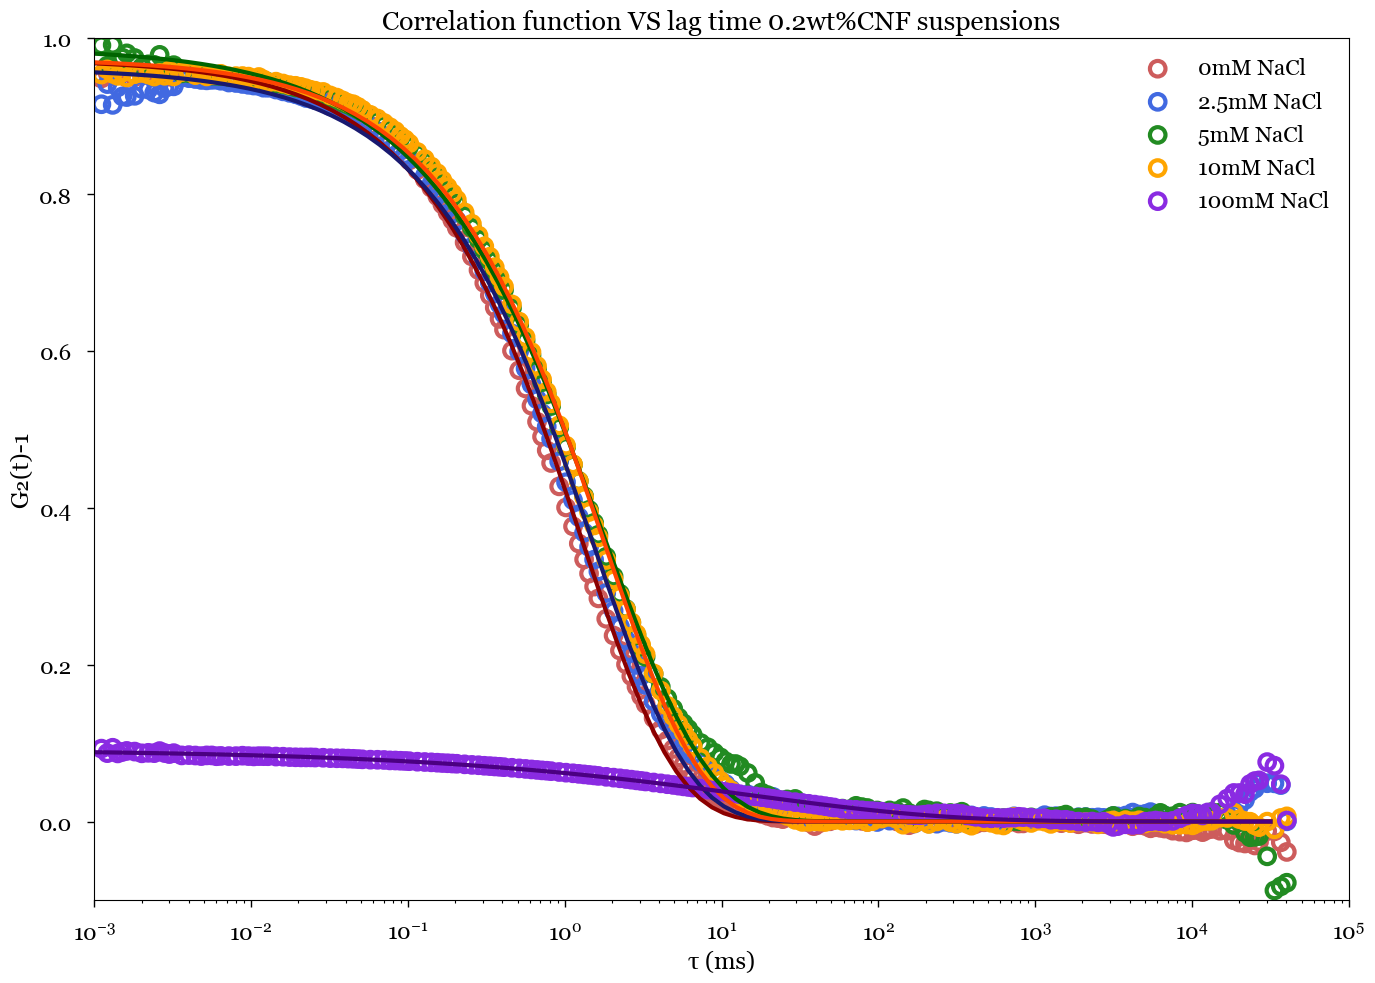

In [533]:
# Plot the fitting

t_fit_cnf02_0nacl = np.logspace(-3, 4.5, 100)
g_fit_cnf02_0nacl = g(t_fit_cnf02_0nacl, A_fit_cnf02_0nacl, tau_fit_cnf02_0nacl, beta_fit_cnf02_0nacl)
t_fit_cnf02_025nacl = np.logspace(-3, 4.5, 100)
g_fit_cnf02_025nacl = g(t_fit_cnf02_025nacl, A_fit_cnf02_025nacl, tau_fit_cnf02_025nacl, beta_fit_cnf02_025nacl)
t_fit_cnf02_050nacl = np.logspace(-3, 4.5, 100)
g_fit_cnf02_050nacl = g(t_fit_cnf02_050nacl, A_fit_cnf02_050nacl, tau_fit_cnf02_050nacl, beta_fit_cnf02_050nacl)
t_fit_cnf02_100nacl = np.logspace(-3, 4.5, 100)
g_fit_cnf02_100nacl = g(t_fit_cnf02_100nacl, A_fit_cnf02_100nacl, tau_fit_cnf02_100nacl, beta_fit_cnf02_100nacl)
#t_fit_cnf02_500nacl = np.logspace(-3, 4.5, 100)
#g_fit_cnf02_500nacl = g(t_fit_cnf02_500nacl, A_fit_cnf02_500nacl, tau_fit_cnf02_500nacl, beta_fit_cnf02_500nacl)
t_fit_cnf02_1000nacl = np.logspace(-3, 4.5, 100)
g_fit_cnf02_1000nacl = g(t_fit_cnf02_1000nacl, A_fit_cnf02_1000nacl, tau_fit_cnf02_1000nacl, beta_fit_cnf02_1000nacl)

plt.scatter(t_cnf02_0nacl, g_t_cnf02_0nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='indianred', label='0mM NaCl')
plt.semilogx(t_fit_cnf02_0nacl, g_fit_cnf02_0nacl, linestyle='solid', color = 'darkred' , linewidth = 3)#,  label='0mM NaCl')
plt.scatter(t_cnf02_025nacl, g_t_cnf02_025nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='royalblue', label = '2.5mM NaCl')
plt.semilogx(t_fit_cnf02_025nacl, g_fit_cnf02_025nacl, linestyle='solid', color = 'midnightblue', linewidth = 3)#,  label='2.5mM NaCl')
plt.scatter(t_cnf02_050nacl, g_t_cnf02_050nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='forestgreen', label = '5mM NaCl')
plt.semilogx(t_fit_cnf02_050nacl, g_fit_cnf02_050nacl, linestyle='solid', color = 'darkgreen', linewidth = 3)#,   label='5mM NaCl')
plt.scatter(t_cnf02_100nacl, g_t_cnf02_100nacl, marker='o', facecolors='none', linewidths=3, edgecolors='orange', label = '10mM NaCl')
plt.semilogx(t_fit_cnf02_100nacl, g_fit_cnf02_100nacl, linestyle='solid', color = 'orangered', linewidth = 3)#,   label='10mM NaCl')
#plt.scatter(t_cnf02_500nacl, g_t_cnf02_500nacl, marker='o', facecolors='none', linewidths=3, edgecolors='teal', label = '50mM NaCl')
#plt.semilogx(t_fit_cnf02_500nacl, g_fit_cnf02_500nacl, linestyle='solid', color = 'darkslategray', linewidth = 3)#,   label='50mM NaCl')
plt.scatter(t_cnf02_1000nacl, g_t_cnf02_1000nacl, marker='o', facecolors='none', linewidths=3, edgecolors='blueviolet', label = '100mM NaCl')
plt.semilogx(t_fit_cnf02_1000nacl, g_fit_cnf02_1000nacl, linestyle='solid', color = 'indigo', linewidth = 3)#,   label='100mM NaCl')

plt.style.use('seaborn-poster')
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')
plt.xscale("log")
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time 0.2wt%CNF suspensions') 
plt.savefig("Correlation function VS Scattering angle_0.2CNFNaCl at 65.1deg fit.png", dpi=1500, bbox_inches='tight')
plt.show()

[0.72565287 0.71139548 0.65337258 0.70715465 0.34236896]


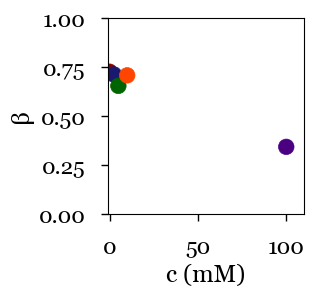

In [534]:
# Plot fitted Beta

#salt_conc = [0, 2.5, 5, 10, 50, 100]
salt_conc = [0, 2.5, 5, 10, 100]
#beta_cnf02_NaCl = np.array([beta_fit_cnf02_0nacl, beta_fit_cnf02_025nacl, beta_fit_cnf02_050nacl, beta_fit_cnf02_100nacl, beta_fit_cnf02_500nacl, beta_fit_cnf02_1000nacl])
beta_cnf02_NaCl = np.array([beta_fit_cnf02_0nacl, beta_fit_cnf02_025nacl, beta_fit_cnf02_050nacl, beta_fit_cnf02_100nacl, beta_fit_cnf02_1000nacl])
print(beta_cnf02_NaCl)

#colors = ['darkred', 'midnightblue', 'darkgreen', 'orangered', 'darkslategray', 'indigo']
colors = ['darkred', 'midnightblue', 'darkgreen', 'orangered', 'indigo']
#colors = ['indianred', 'royalblue', 'forestgreen', 'forestgreen', 'teal', 'blueviolet']
#colors = ['indianred', 'royalblue', 'forestgreen', 'orange', 'blueviolet']
plt.style.use('_mpl-gallery-nogrid')
# plot
plt.scatter(salt_conc, beta_cnf02_NaCl, c=colors)
plt.xlabel('c (mM)')
plt.ylabel('\u03B2')
plt.xlim(-0.9,110)
plt.ylim(0,1)
plt.xticks([0,50,100])
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.savefig("Stretched exponential function vs NaCl concentrations 0.2wt.%CNF.png", dpi=1500, bbox_inches='tight')
plt.show()

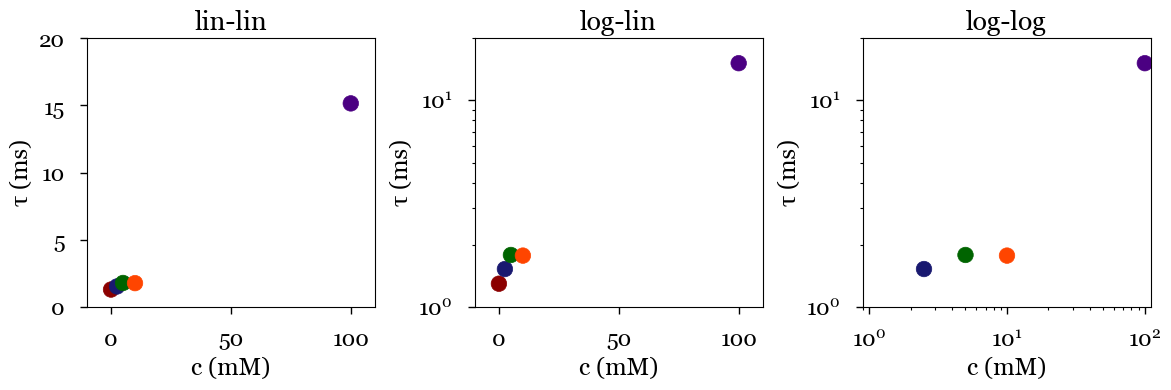

In [535]:
#salt_conc = [0, 2.5, 5, 10, 50, 100]
salt_conc = [0, 2.5, 5, 10, 100]
#taucnf02nacl = np.array([tau_fit_cnf02_0nacl, tau_fit_cnf02_025nacl, tau_fit_cnf02_050nacl, tau_fit_cnf02_100nacl, tau_fit_cnf001_500nacl, tau_fit_cnf02_1000nacl])
taucnf02nacl = np.array([tau_fit_cnf02_0nacl, tau_fit_cnf02_025nacl, tau_fit_cnf02_050nacl, tau_fit_cnf02_100nacl, tau_fit_cnf02_1000nacl])
#colors = ['darkred', 'midnightblue', 'darkgreen', 'orangered', 'darkslategray', 'indigo']
colors = ['darkred', 'midnightblue', 'darkgreen', 'orangered', 'indigo']
plt.style.use('_mpl-gallery-nogrid')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

#fig.subtitle('Lag time as a function of NaCl concentrations with 0.01wt.%CNF at 65.1\u00b0 2D Auto')
axes[0].scatter(salt_conc, taucnf02nacl, c=colors)
axes[0].set_title('lin-lin')
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_ylim(0,20)
axes[0].set_xlim(-10,110)
axes[0].set_xticks([0,50,100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')


axes[1].scatter(salt_conc, taucnf02nacl, c=colors)
axes[1].set_title('log-lin')
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03C4 (ms)')
axes[1].set_ylim(1,20)
axes[1].set_xlim(-10,110)
axes[1].set_xticks([0,50,100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")

axes[2].scatter(salt_conc, taucnf02nacl, c=colors)
axes[2].set_title('log-log')
axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('\u03C4 (ms)')
axes[2].set_ylim(1,20)
axes[2].set_xlim(0.9,110)
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
plt.savefig("Lag time as a function of NaCl concentrations with 0.2wt.%CNF at 65.1\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

# 0.55CNF/NaCl Suspensions at 65.1 degree, 20C, 2D Autocorrelation

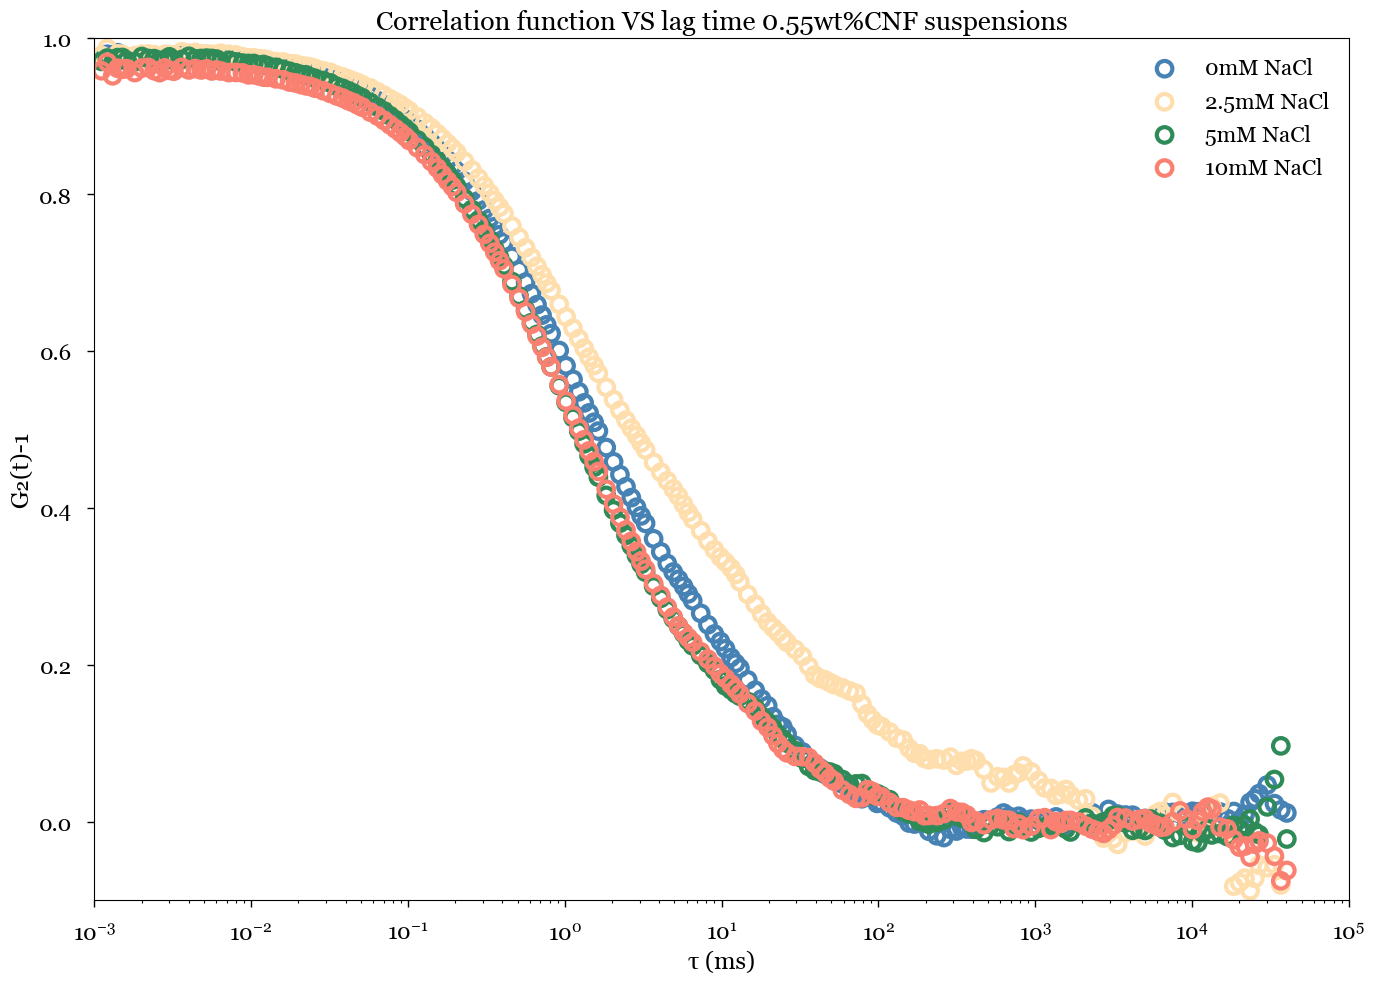

In [537]:
# Import Correlation Function data 

cnf055_025nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.55CNF2.5NaCl/Measurement 1/Repetition2/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf055_050nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.55CNF5NaCl/Measurement 1/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf055_100nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.55CNF10NaCl/Measurement 1/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])

lagtime_cnf055_0nacl = cnf055.iloc[28:,0]
lagtime_cnf055_0nacl_ms = lagtime_cnf055_0nacl*1000
corrfx_cnf055_0nacl = cnf055.iloc[28:,1]

lagtime_cnf055_025nacl = cnf055_025nacl.iloc[28:,0]
lagtime_cnf055_025nacl_ms = lagtime_cnf055_025nacl*1000
corrfx_cnf055_025nacl = cnf055_025nacl.iloc[28:,1]

lagtime_cnf055_050nacl = cnf055_050nacl.iloc[28:,0]
lagtime_cnf055_050nacl_ms = lagtime_cnf055_050nacl*1000
corrfx_cnf055_050nacl = cnf055_050nacl.iloc[28:,1]

lagtime_cnf055_100nacl = cnf055_100nacl.iloc[28:,0]
lagtime_cnf055_100nacl_ms = lagtime_cnf055_100nacl*1000
corrfx_cnf055_100nacl = cnf055_100nacl.iloc[28:,1]

plt.scatter(lagtime_cnf055_0nacl_ms ,corrfx_cnf055_0nacl, marker='o', facecolors='none', linewidths=3, edgecolors='steelblue', label = '0mM NaCl')
plt.scatter(lagtime_cnf055_025nacl_ms ,corrfx_cnf055_025nacl, marker='o', facecolors='none', linewidths=3, edgecolors='navajowhite', label = '2.5mM NaCl')
plt.scatter(lagtime_cnf055_050nacl_ms ,corrfx_cnf055_050nacl, marker='o', facecolors='none', linewidths=3, edgecolors='seagreen', label = '5mM NaCl')
plt.scatter(lagtime_cnf055_100nacl_ms ,corrfx_cnf055_100nacl, marker='o', facecolors='none', linewidths=3, edgecolors='salmon', label = '10mM NaCl')

plt.style.use('seaborn-poster')
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')  
plt.xscale("log")
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time 0.55wt%CNF suspensions')
plt.savefig("Correlation function VS Scattering angle_0.55CNFNaCl at 65.1deg.png", dpi=1500, bbox_inches='tight')
plt.show()

In [538]:
# Fitting to 𝑔(𝑡)=𝐴𝑒𝑥𝑝[−(𝑡/𝜏)^𝛽]

def g(t, A, tau, beta):
    return A * np.exp(-(t/tau)**beta)

t_cnf055_0nacl = lagtime_cnf055_0nacl_ms
g_t_cnf055_0nacl = corrfx_cnf055_0nacl
t_cnf055_025nacl = lagtime_cnf055_025nacl_ms
g_t_cnf055_025nacl = corrfx_cnf055_025nacl
t_cnf055_050nacl = lagtime_cnf055_050nacl_ms
g_t_cnf055_050nacl = corrfx_cnf055_050nacl
t_cnf055_100nacl = lagtime_cnf055_100nacl_ms
g_t_cnf055_100nacl = corrfx_cnf055_100nacl

p0 = [1, 1, 1]

# Set the parameter bounds
bounds = ([0, 0.001, 0], [1, 100000, 1.1])

params_cnf055_0nacl, cov_cnf055_0nacl = curve_fit(g, t_cnf055_0nacl, g_t_cnf055_0nacl, p0, bounds=bounds)
A_fit_cnf055_0nacl, tau_fit_cnf055_0nacl, beta_fit_cnf055_0nacl = params_cnf055_0nacl

params_cnf055_025nacl, cov_cnf055_025nacl = curve_fit(g, t_cnf055_025nacl, g_t_cnf055_025nacl, p0, bounds=bounds)
A_fit_cnf055_025nacl, tau_fit_cnf055_025nacl, beta_fit_cnf055_025nacl = params_cnf055_025nacl

params_cnf055_050nacl, cov_cnf055_050nacl = curve_fit(g, t_cnf055_050nacl, g_t_cnf055_050nacl, p0, bounds=bounds)
A_fit_cnf055_050nacl, tau_fit_cnf055_050nacl, beta_fit_cnf055_050nacl = params_cnf055_050nacl

params_cnf055_100nacl, cov_cnf055_100nacl = curve_fit(g, t_cnf055_100nacl, g_t_cnf055_100nacl, p0, bounds=bounds)
A_fit_cnf055_100nacl, tau_fit_cnf055_100nacl, beta_fit_cnf055_100nacl = params_cnf055_100nacl

# Table using DataFrame
samples_055CNF_NaCl = ['0mM NaCl','2.5mM NaCl', '5mM NaCl', '10mM NaCl']
A_fitted_055CNF_NaCl = [A_fit_cnf055_0nacl, A_fit_cnf055_025nacl, A_fit_cnf055_050nacl, A_fit_cnf055_100nacl]
t_fitted_055CNF_NaCl = [tau_fit_cnf055_0nacl, tau_fit_cnf055_025nacl, tau_fit_cnf055_050nacl, tau_fit_cnf055_100nacl]
beta_fitted_055CNF_NaCl =  [beta_fit_cnf055_0nacl, beta_fit_cnf055_025nacl, beta_fit_cnf055_050nacl, beta_fit_cnf055_100nacl]
table_Parameters_055CNF_NaCl = {
    '0.55wt.%CNF with': samples_055CNF_NaCl ,
    'A' : A_fitted_055CNF_NaCl,
    '\u03C4 (ms)': t_fitted_055CNF_NaCl,
    '\u03B2': beta_fitted_055CNF_NaCl,
}

table_Parameters_055CNF_NaCl_draw = pd.DataFrame(table_Parameters_055CNF_NaCl)

styled_table_Parameters_055CNF_NaCl_draw = table_Parameters_055CNF_NaCl_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='Reds') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.3f}', '\u03B2': '{:.3f}'})\
    .hide(axis='index')

styled_table_Parameters_055CNF_NaCl_draw    

In [539]:
# Save the styled table method 1
# Convert styled DataFrame to HTML table
html_styled_table_Parameters_055CNF_NaCl = styled_table_Parameters_055CNF_NaCl_draw.to_html()

# Save the HTML table to a temporary file
with open('temp.html', 'w') as f:
    f.write(html_styled_table_Parameters_055CNF_NaCl)
    
# Save the HTML table as a PNG image
imgkit.from_file('temp.html', 'Table of Fitted Parameters for 0.55wt.%CNF with NaCl.png', options=options)

True

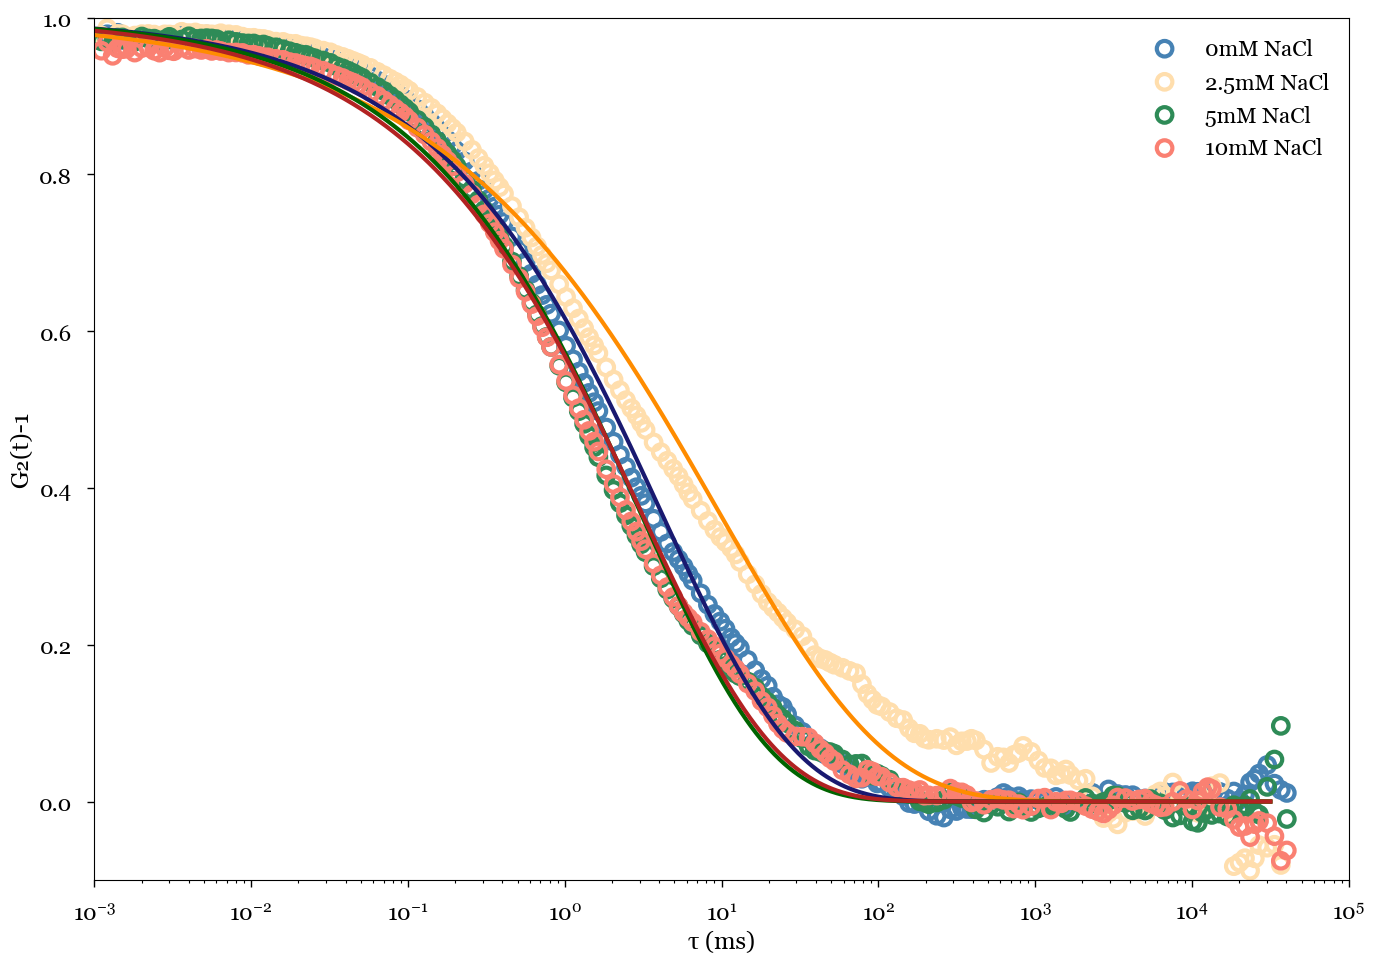

In [540]:
# Plot the fitting

t_fit_cnf055_0nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf055_0nacl = g(t_fit_cnf055_0nacl, A_fit_cnf055_0nacl, tau_fit_cnf055_0nacl, beta_fit_cnf055_0nacl)
t_fit_cnf055_025nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf055_025nacl = g(t_fit_cnf055_025nacl, A_fit_cnf055_025nacl, tau_fit_cnf055_025nacl, beta_fit_cnf055_025nacl)
t_fit_cnf055_050nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf055_050nacl = g(t_fit_cnf055_050nacl, A_fit_cnf055_050nacl, tau_fit_cnf055_050nacl, beta_fit_cnf055_050nacl)
t_fit_cnf055_100nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf055_100nacl = g(t_fit_cnf055_100nacl, A_fit_cnf055_100nacl, tau_fit_cnf055_100nacl, beta_fit_cnf055_100nacl)

plt.scatter(t_cnf055_0nacl, g_t_cnf055_0nacl, marker='o', facecolors='none', linewidths=3, edgecolors='steelblue', label='0mM NaCl')
plt.semilogx(t_fit_cnf055_0nacl, g_fit_cnf055_0nacl, linestyle='solid', color = 'midnightblue', linewidth = 3)#,   label='0mM NaCl')
plt.scatter(t_cnf055_025nacl, g_t_cnf055_025nacl, marker='o', facecolors='none', linewidths=3, edgecolors='navajowhite', label = '2.5mM NaCl')
plt.semilogx(t_fit_cnf055_025nacl, g_fit_cnf055_025nacl, linestyle='solid', color = 'darkorange', linewidth = 3)#,  label='2.5mM NaCl')
plt.scatter(t_cnf055_050nacl, g_t_cnf055_050nacl, marker='o', facecolors='none', linewidths=3, edgecolors='seagreen', label = '5mM NaCl')
plt.semilogx(t_fit_cnf055_050nacl, g_fit_cnf055_050nacl, linestyle='solid', color = 'darkgreen', linewidth = 3)#,  label='5mM NaCl')
plt.scatter(t_cnf055_100nacl, g_t_cnf055_100nacl, marker='o', facecolors='none', linewidths=3, edgecolors='salmon', label = '10mM NaCl')
plt.semilogx(t_fit_cnf055_100nacl, g_fit_cnf055_100nacl, linestyle='solid', color = 'firebrick', linewidth = 3)#,  label='10mM NaCl')

plt.style.use('seaborn-poster')
plt.xscale("log")
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.savefig("Correlation function VS Scattering angle_0.55CNFNaCl at 65.1deg fit.png", dpi=1500, bbox_inches='tight')
plt.show()

[0.51109097 0.41294539 0.5258926  0.50662374]


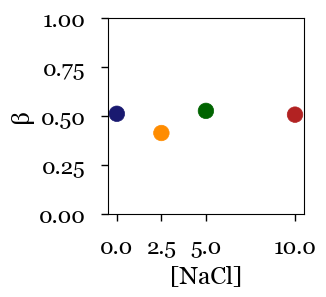

In [541]:
# Plot fitted Beta

salt_conc = [0, 2.5, 5, 10]
beta_cnf055_NaCl = np.array([beta_fit_cnf055_0nacl, beta_fit_cnf055_025nacl, beta_fit_cnf055_050nacl, beta_fit_cnf055_100nacl])
print(beta_cnf055_NaCl)

colors = ['midnightblue', 'darkorange', 'darkgreen', 'firebrick']
plt.style.use('_mpl-gallery-nogrid')
# plot
plt.scatter(salt_conc, beta_cnf055_NaCl, c=colors)
plt.xlabel('[NaCl]')
plt.ylabel('\u03B2')
plt.ylim(0,1)
plt.xticks([0,2.5,5,10])
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.savefig("Stretched exponential function vs NaCl concentrations 0.55wt.%CNF.png", dpi=1500, bbox_inches='tight')
plt.show()

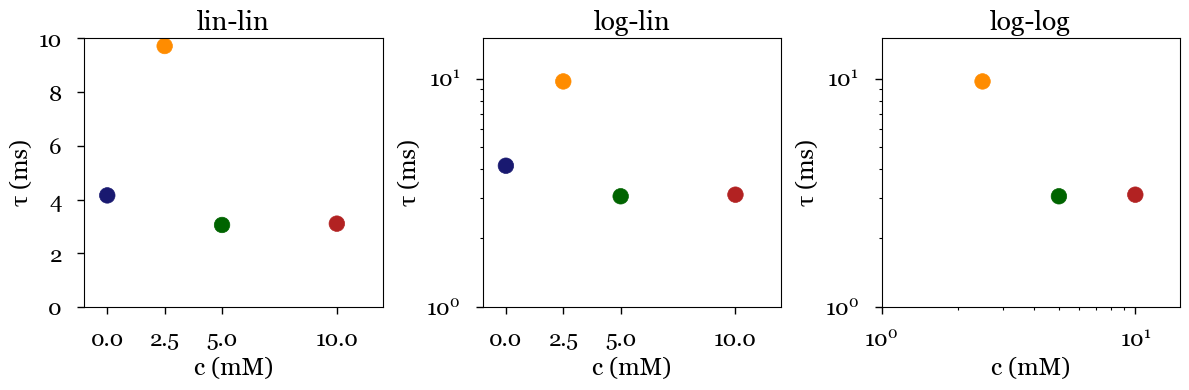

In [542]:
# Plot tau 

salt_conc = [0, 2.5, 5, 10]
taucnf055nacl = np.array([tau_fit_cnf055_0nacl, tau_fit_cnf055_025nacl, tau_fit_cnf055_050nacl,  tau_fit_cnf055_100nacl])
colors = ['midnightblue', 'darkorange', 'darkgreen', 'firebrick']
plt.style.use('_mpl-gallery-nogrid')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

#fig.subtitle('Lag time as a function of NaCl concentrations with 0.01wt.%CNF at 65.1\u00b0 2D Auto')
axes[0].scatter(salt_conc, taucnf055nacl, c=colors)
axes[0].set_title('lin-lin')
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_ylim(0,10)
axes[0].set_xlim(-1,12)
axes[0].set_xticks([0,2.5,5,10])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

axes[1].scatter(salt_conc, taucnf055nacl, c=colors)
axes[1].set_title('log-lin')
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03C4 (ms)')
axes[1].set_ylim(1,15)
axes[1].set_xlim(-1,12)
axes[1].set_xticks([0,2.5,5,10])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")

axes[2].scatter(salt_conc, taucnf055nacl, c=colors)
axes[2].set_title('log-log')
axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('\u03C4 (ms)')
axes[2].set_ylim(1,15)
axes[2].set_xlim(1,15)
#axes[2].set_xticks([0,2.5,5,10])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
plt.savefig("Lag time as a function of NaCl concentrations with 0.55wt.%CNF at 65.1\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

# 0.01CNF/ 2.5mM Cations Suspensions at 65.1 degree, 20C, 2D Autocorrelation


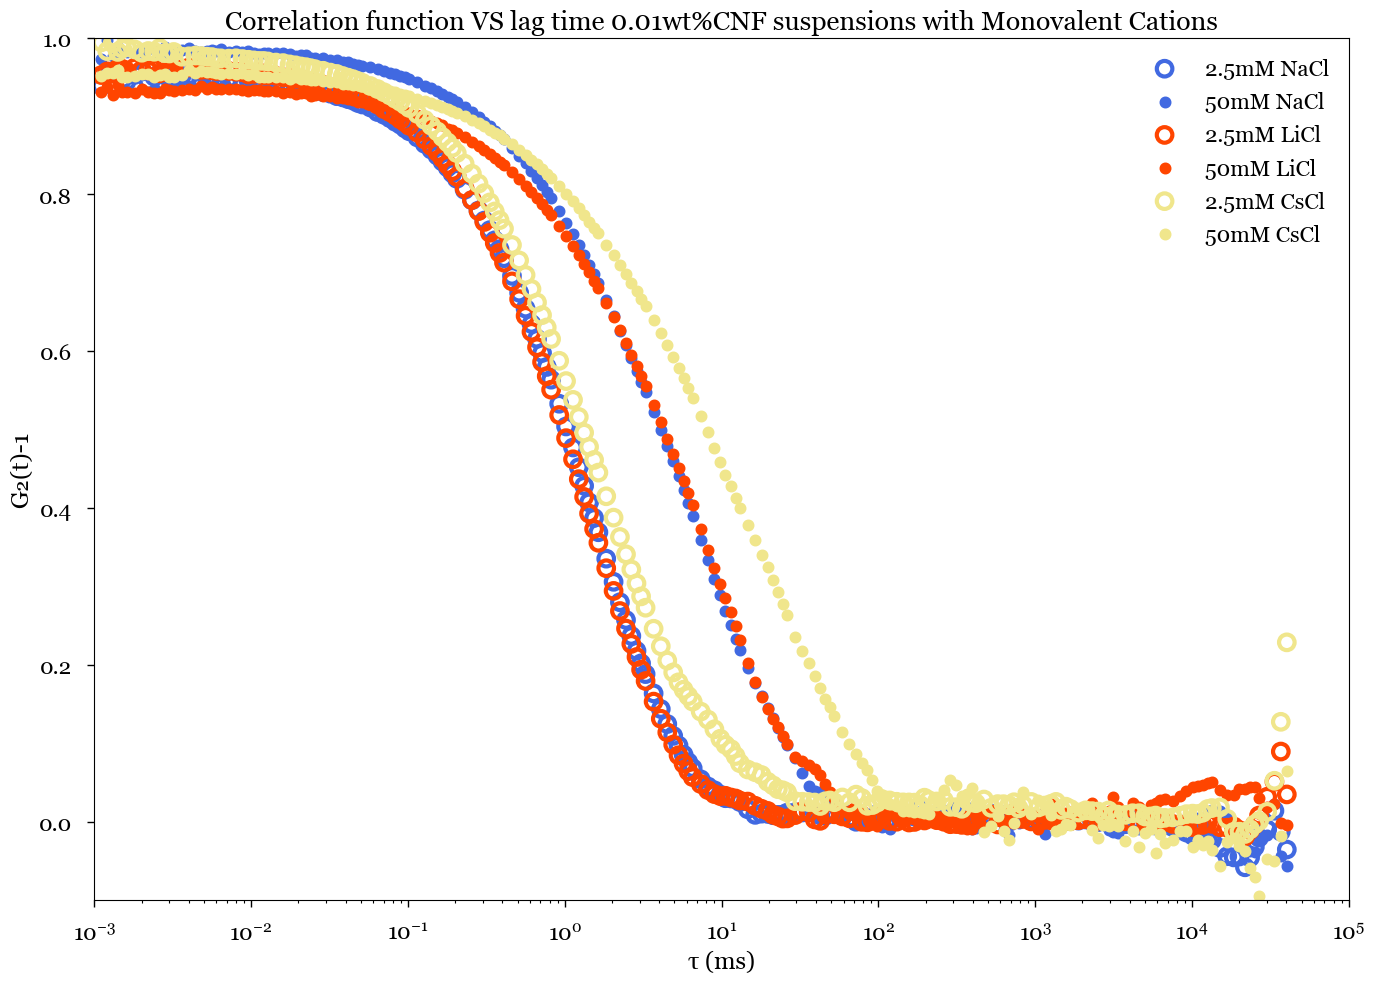

In [545]:
# Import Correlation Function data 

cnf001_025nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.01CNF2.5NaCl/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_500nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaCl/0.01CNF50NaCl/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_025licl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFLiCl/0.01CNF2.5LiCl/Measurement 1/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_500licl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFLiCl/0.01CNF50LiCl/Measurement 1/Repetition2/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_025cscl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFCsCl/0.01CNF2.5CsCl/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_500cscl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFCsCl/0.01CNF50CsCl/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])

lagtime_cnf001_025nacl = cnf001_025nacl.iloc[28:,0]
lagtime_cnf001_025nacl_ms = lagtime_cnf001_025nacl*1000
corrfx_cnf001_025nacl = cnf001_025nacl.iloc[28:,1]

lagtime_cnf001_500nacl = cnf001_500nacl.iloc[28:,0]
lagtime_cnf001_500nacl_ms = lagtime_cnf001_500nacl*1000
corrfx_cnf001_500nacl = cnf001_500nacl.iloc[28:,1]

lagtime_cnf001_025licl = cnf001_025licl.iloc[28:,0]
lagtime_cnf001_025licl_ms = lagtime_cnf001_025licl*1000
corrfx_cnf001_025licl = cnf001_025licl.iloc[28:,1]

lagtime_cnf001_500licl = cnf001_500licl.iloc[28:,0]
lagtime_cnf001_500licl_ms = lagtime_cnf001_500licl*1000
corrfx_cnf001_500licl = cnf001_500licl.iloc[28:,1]

lagtime_cnf001_025cscl = cnf001_025cscl.iloc[28:,0]
lagtime_cnf001_025cscl_ms = lagtime_cnf001_025cscl*1000
corrfx_cnf001_025cscl = cnf001_025cscl.iloc[28:,1]

lagtime_cnf001_500cscl = cnf001_500cscl.iloc[28:,0]
lagtime_cnf001_500cscl_ms = lagtime_cnf001_500cscl*1000
corrfx_cnf001_500cscl = cnf001_500cscl.iloc[28:,1]

plt.scatter(lagtime_cnf001_025nacl_ms ,corrfx_cnf001_025nacl, marker='o', facecolors='none', linewidths=3, edgecolors='royalblue', label = '2.5mM NaCl')
plt.scatter(lagtime_cnf001_500nacl_ms  ,corrfx_cnf001_500nacl, marker='.', facecolors='royalblue', linewidths=3, edgecolors='royalblue', label = '50mM NaCl')

plt.scatter(lagtime_cnf001_025licl_ms  ,corrfx_cnf001_025licl, marker='o', facecolors='none', linewidths=3, edgecolors='orangered', label = '2.5mM LiCl')
plt.scatter(lagtime_cnf001_500licl_ms  ,corrfx_cnf001_500licl, marker='.', facecolors='orangered', linewidths=3, edgecolors='orangered', label = '50mM LiCl')

plt.scatter(lagtime_cnf001_025cscl_ms  ,corrfx_cnf001_025cscl, marker='o', facecolors='none', linewidths=3, edgecolors='khaki', label = '2.5mM CsCl')
plt.scatter(lagtime_cnf001_500cscl_ms  ,corrfx_cnf001_500cscl, marker='.', facecolors='khaki', linewidths=3, edgecolors='khaki', label = '50mM CsCl')

plt.style.use('seaborn-poster')
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.xscale("log")
plt.title('Correlation function VS lag time 0.01wt%CNF suspensions with Monovalent Cations')
plt.savefig("Correlation function VS lag time 0.01wt%CNF suspensions with Monovalent Cations at 65.1deg.png", dpi=1500, bbox_inches='tight')
plt.show()

In [544]:
# Fitting to 𝑔(𝑡)=𝐴𝑒𝑥𝑝[−(𝑡/𝜏)^𝛽]

def g(t, A, tau, beta):
    return A * np.exp(-(t/tau)**beta)

t_cnf001_025nacl = lagtime_cnf001_025nacl_ms
g_t_cnf001_025nacl = corrfx_cnf001_025nacl
t_cnf001_500nacl = lagtime_cnf001_500nacl_ms
g_t_cnf001_500nacl = corrfx_cnf001_500nacl

t_cnf001_025licl = lagtime_cnf001_025licl_ms
g_t_cnf001_025licl = corrfx_cnf001_025licl
t_cnf001_500licl = lagtime_cnf001_500licl_ms
g_t_cnf001_500licl = corrfx_cnf001_500licl

t_cnf001_025cscl = lagtime_cnf001_025cscl_ms
g_t_cnf001_025cscl = corrfx_cnf001_025cscl
t_cnf001_500cscl = lagtime_cnf001_500cscl_ms
g_t_cnf001_500cscl = corrfx_cnf001_500cscl

p0 = [1, 1,1]

# Set the parameter bounds
bounds = ([0, 0.001, 0], [1, 100000, 1])

params_cnf001_025nacl, cov_cnf001_025nacl = curve_fit(g, t_cnf001_025nacl, g_t_cnf001_025nacl, p0, bounds=bounds)
A_fit_cnf001_025nacl, tau_fit_cnf001_025nacl, beta_fit_cnf001_025nacl = params_cnf001_025nacl

params_cnf001_500nacl, cov_cnf001_500nacl = curve_fit(g, t_cnf001_500nacl, g_t_cnf001_500nacl, p0, bounds=bounds)
A_fit_cnf001_500nacl, tau_fit_cnf001_500nacl, beta_fit_cnf001_500nacl = params_cnf001_500nacl

params_cnf001_025licl, cov_cnf001_025licl = curve_fit(g, t_cnf001_025licl, g_t_cnf001_025licl, p0, bounds=bounds)
A_fit_cnf001_025licl, tau_fit_cnf001_025licl, beta_fit_cnf001_025licl = params_cnf001_025licl

params_cnf001_500licl, cov_cnf001_500licl = curve_fit(g, t_cnf001_500licl, g_t_cnf001_500licl, p0, bounds=bounds)
A_fit_cnf001_500licl, tau_fit_cnf001_500licl, beta_fit_cnf001_500licl = params_cnf001_500licl

params_cnf001_025cscl, cov_cnf001_025cscl = curve_fit(g, t_cnf001_025cscl, g_t_cnf001_025cscl, p0, bounds=bounds)
A_fit_cnf001_025cscl, tau_fit_cnf001_025cscl, beta_fit_cnf001_025cscl = params_cnf001_025cscl

params_cnf001_500cscl, cov_cnf001_500cscl = curve_fit(g, t_cnf001_500cscl, g_t_cnf001_500cscl, p0, bounds=bounds)
A_fit_cnf001_500cscl, tau_fit_cnf001_500cscl, beta_fit_cnf001_500cscl = params_cnf001_500cscl


# Table using DataFrame
samples_001CNF_cations = ['0mM salt','NaCl','2.5mM', '50mM','LiCl','2.5mM', '50mM', 'CsCl','2.5mM', '50mM ']
A_fitted_001CNF_cations = [A_fit_cnf001_0nacl, None, A_fit_cnf001_025nacl, A_fit_cnf001_500nacl, None, A_fit_cnf001_025licl, A_fit_cnf001_500licl, None, A_fit_cnf001_025cscl, A_fit_cnf001_500cscl]
t_fitted_001CNF_cations = [tau_fit_cnf001_0nacl, None, tau_fit_cnf001_025nacl, tau_fit_cnf001_500nacl, None, tau_fit_cnf001_025licl, tau_fit_cnf001_500licl, None, tau_fit_cnf001_025cscl, tau_fit_cnf001_500cscl]
beta_fitted_001CNF_cations =  [beta_fit_cnf001_0nacl, None, beta_fit_cnf001_025nacl, beta_fit_cnf001_500nacl, None, beta_fit_cnf001_025licl, beta_fit_cnf001_500licl, None, beta_fit_cnf001_025cscl, beta_fit_cnf001_500cscl]
#samples_001CNF_cations = ['0mM salt','2.5mM NaCl', '50mM NaCl','2.5mM LiCl', '50mM LiCl','2.5mM CsCl', '50mM CsCl']
#A_fitted_001CNF_cations = [A_fit_cnf001_0nacl, A_fit_cnf001_025nacl, A_fit_cnf001_500nacl, A_fit_cnf001_025licl, A_fit_cnf001_500licl, A_fit_cnf001_025cscl, A_fit_cnf001_500cscl]
#t_fitted_001CNF_cations = [tau_fit_cnf001_0nacl, tau_fit_cnf001_025nacl, tau_fit_cnf001_500nacl, tau_fit_cnf001_025licl, tau_fit_cnf001_500licl, tau_fit_cnf001_025cscl, tau_fit_cnf001_500cscl]
#beta_fitted_001CNF_cations =  [beta_fit_cnf001_0nacl, beta_fit_cnf001_025nacl, beta_fit_cnf001_500nacl,  beta_fit_cnf001_025licl, beta_fit_cnf001_500licl, beta_fit_cnf001_025cscl, beta_fit_cnf001_500cscl]

table_Parameters_001CNF_cations = {
    '0.01wt.%CNF with': samples_001CNF_cations ,
    'A' : A_fitted_001CNF_cations,
    '\u03C4 (ms)': t_fitted_001CNF_cations,
    '\u03B2': beta_fitted_001CNF_cations,
}

table_Parameters_001CNF_cations_draw = pd.DataFrame(table_Parameters_001CNF_cations)

styled_table_Parameters_001CNF_cations_draw = table_Parameters_001CNF_cations_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='Reds') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.3f}', '\u03B2': '{:.3f}'})\
    .hide(axis='index') \
    .format(na_rep='')

styled_table_Parameters_001CNF_cations_draw           

In [546]:
# Save the styled table method 1
# Convert styled DataFrame to HTML table
html_styled_table_Parameters_001CNF_cations = styled_table_Parameters_001CNF_cations_draw.to_html()

# Save the HTML table to a temporary file
with open('temp.html', 'w') as f:
    f.write(html_styled_table_Parameters_001CNF_cations)
    
# Save the HTML table as a PNG image
imgkit.from_file('temp.html', 'Table of Fitted Parameters for 0.01wt.%CNF with Cations.png', options=options)

True

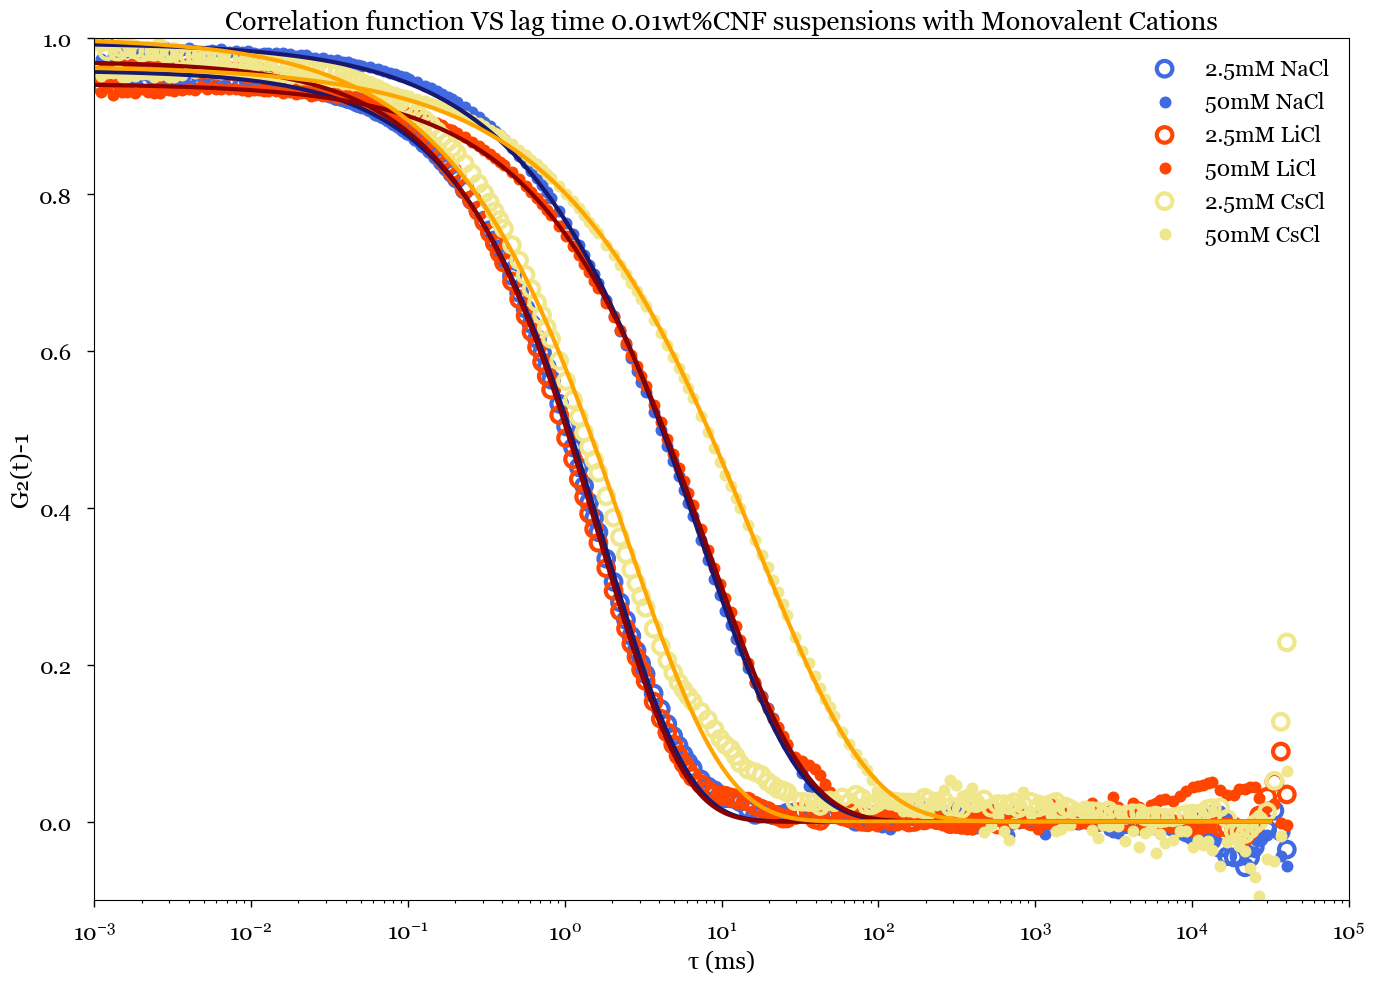

In [547]:
t_fit_cnf001_025nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_025nacl = g(t_fit_cnf001_025nacl, A_fit_cnf001_025nacl, tau_fit_cnf001_025nacl, beta_fit_cnf001_025nacl)
t_fit_cnf001_500nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_500nacl = g(t_fit_cnf001_500nacl, A_fit_cnf001_500nacl, tau_fit_cnf001_500nacl, beta_fit_cnf001_500nacl)

t_fit_cnf001_025licl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_025licl = g(t_fit_cnf001_025licl, A_fit_cnf001_025licl, tau_fit_cnf001_025licl, beta_fit_cnf001_025licl)
t_fit_cnf001_500licl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_500licl = g(t_fit_cnf001_500licl, A_fit_cnf001_500licl, tau_fit_cnf001_500licl, beta_fit_cnf001_500licl)

t_fit_cnf001_025cscl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_025cscl = g(t_fit_cnf001_025cscl, A_fit_cnf001_025cscl, tau_fit_cnf001_025cscl, beta_fit_cnf001_025cscl)
t_fit_cnf001_500cscl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_500cscl = g(t_fit_cnf001_500cscl, A_fit_cnf001_500cscl, tau_fit_cnf001_500cscl, beta_fit_cnf001_500cscl)

plt.style.use('seaborn-poster')
plt.scatter(t_cnf001_025nacl ,corrfx_cnf001_025nacl, marker='o', facecolors='none', linewidths=3, edgecolors='royalblue', label = '2.5mM NaCl')
plt.semilogx(t_fit_cnf001_025nacl, g_fit_cnf001_025nacl, linestyle='solid', color = 'midnightblue', linewidth = 3) #, label='2.5mM NaCl fit')

plt.scatter(t_cnf001_500nacl ,corrfx_cnf001_500nacl, marker='.', facecolors='royalblue', linewidths=3, edgecolors='royalblue', label = '50mM NaCl')
plt.semilogx(t_fit_cnf001_500nacl, g_fit_cnf001_500nacl, linestyle='solid', color = 'midnightblue', linewidth = 3) #,  label='50mM NaCl fit')

plt.scatter(t_cnf001_025licl ,corrfx_cnf001_025licl, marker='o', facecolors='none', linewidths=3, edgecolors='orangered', label = '2.5mM LiCl')
plt.semilogx(t_fit_cnf001_025licl, g_fit_cnf001_025licl, linestyle='solid', color = 'darkred', linewidth = 3) #,  label='2.5mM LiCl fit')

plt.scatter(t_cnf001_500licl ,corrfx_cnf001_500licl, marker='.', facecolors='orangered', linewidths=3, edgecolors='orangered', label = '50mM LiCl')
plt.semilogx(t_fit_cnf001_500licl, g_fit_cnf001_500licl, linestyle='solid', color = 'darkred', linewidth = 3) #,  label='50mM LiCl fit')

plt.scatter(t_cnf001_025cscl ,corrfx_cnf001_025cscl, marker='o', facecolors='none', linewidths=3, edgecolors='khaki', label = '2.5mM CsCl')
plt.semilogx(t_fit_cnf001_025cscl, g_fit_cnf001_025cscl, linestyle='solid', color = 'orange', linewidth = 3) #,  label='2.5mM CsCl fit')

plt.scatter(t_cnf001_500cscl,corrfx_cnf001_500cscl, marker='.', facecolors='khaki', linewidths=3, edgecolors='khaki', label = '50mM CsCl')
plt.semilogx(t_fit_cnf001_500cscl, g_fit_cnf001_500cscl, linestyle='solid', color = 'orange', linewidth = 3) #, label='50mM CsCl fit')

plt.style.use('seaborn-poster')
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time 0.01wt%CNF suspensions with Monovalent Cations')
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.xscale("log")
plt.savefig("Correlation function VS lag time 0.01wt%CNF suspensions with Monovalent Cations at 65.1deg fit.png", dpi=1500, bbox_inches='tight')
plt.show()

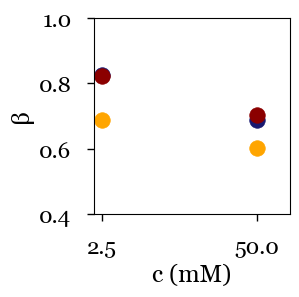

In [548]:
# Plot fitted Beta

salt_conc = [2.5, 50]
betacnf001nacl = np.array([beta_fit_cnf001_025nacl, beta_fit_cnf001_500nacl])
betacnf001licl = np.array([beta_fit_cnf001_025licl, beta_fit_cnf001_500licl])
betacnf001cscl = np.array([beta_fit_cnf001_025cscl, beta_fit_cnf001_500cscl])

plt.style.use('_mpl-gallery-nogrid')
# plot
plt.scatter(salt_conc, betacnf001nacl, c='midnightblue')
plt.scatter(salt_conc, betacnf001licl, c='darkred')
plt.scatter(salt_conc, betacnf001cscl, c='orange')

plt.xlabel('c (mM)')
plt.ylabel('\u03B2')
plt.xlim(0,60)
plt.ylim(0.4,1)
plt.xticks([2.5,50])
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.savefig("Stretched exponential function vs salt concentrations 0.01wt.%CNF Monovalent Cations.png", dpi=1500, bbox_inches='tight')
plt.show()

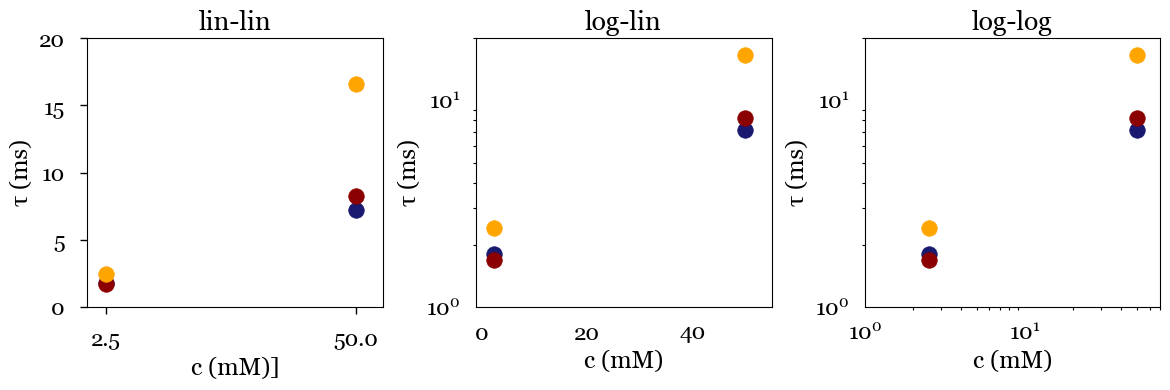

In [549]:
# Plot tau 

salt_conc = [2.5, 50]
taucnf001nacl = np.array([tau_fit_cnf001_025nacl, tau_fit_cnf001_500nacl])
taucnf001licl = np.array([tau_fit_cnf001_025licl, tau_fit_cnf001_500licl])
taucnf001cscl = np.array([tau_fit_cnf001_025cscl, tau_fit_cnf001_500cscl])

plt.style.use('_mpl-gallery-nogrid')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axes[0].scatter(salt_conc, taucnf001nacl, c='midnightblue')
axes[0].scatter(salt_conc, taucnf001licl, c='darkred')
axes[0].scatter(salt_conc, taucnf001cscl, c='orange')
axes[0].set_title('lin-lin')
axes[0].set_xlabel('c (mM)]')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_ylim(0,20)
axes[0].set_xlim(-1,55)
axes[0].set_xticks([2.5,50])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

axes[1].scatter(salt_conc, taucnf001nacl, c='midnightblue')
axes[1].scatter(salt_conc, taucnf001licl, c='darkred')
axes[1].scatter(salt_conc, taucnf001cscl, c='orange')
axes[1].set_title('log-lin')
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03C4 (ms)')
axes[1].set_ylim(1,20)
axes[1].set_xlim(-1,55)
axes[0].set_xticks([2.5,50])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")

axes[2].scatter(salt_conc, taucnf001nacl, c='midnightblue')
axes[2].scatter(salt_conc, taucnf001licl, c='darkred')
axes[2].scatter(salt_conc, taucnf001cscl, c='orange')
axes[2].set_title('log-log')
axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('\u03C4 (ms)')
axes[2].set_ylim(1,20)
axes[2].set_xlim(1,70)
#axes[0].set_xticks([2.5,50])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
plt.savefig("Lag time as a function of salt concentrations with 0.01wt.%CNF Monovalent Cations at 65.1\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

# 0.01CNF/ 2.5mM Anion Suspensions at 65.1 degree, 20C, 2D Autocorrelation

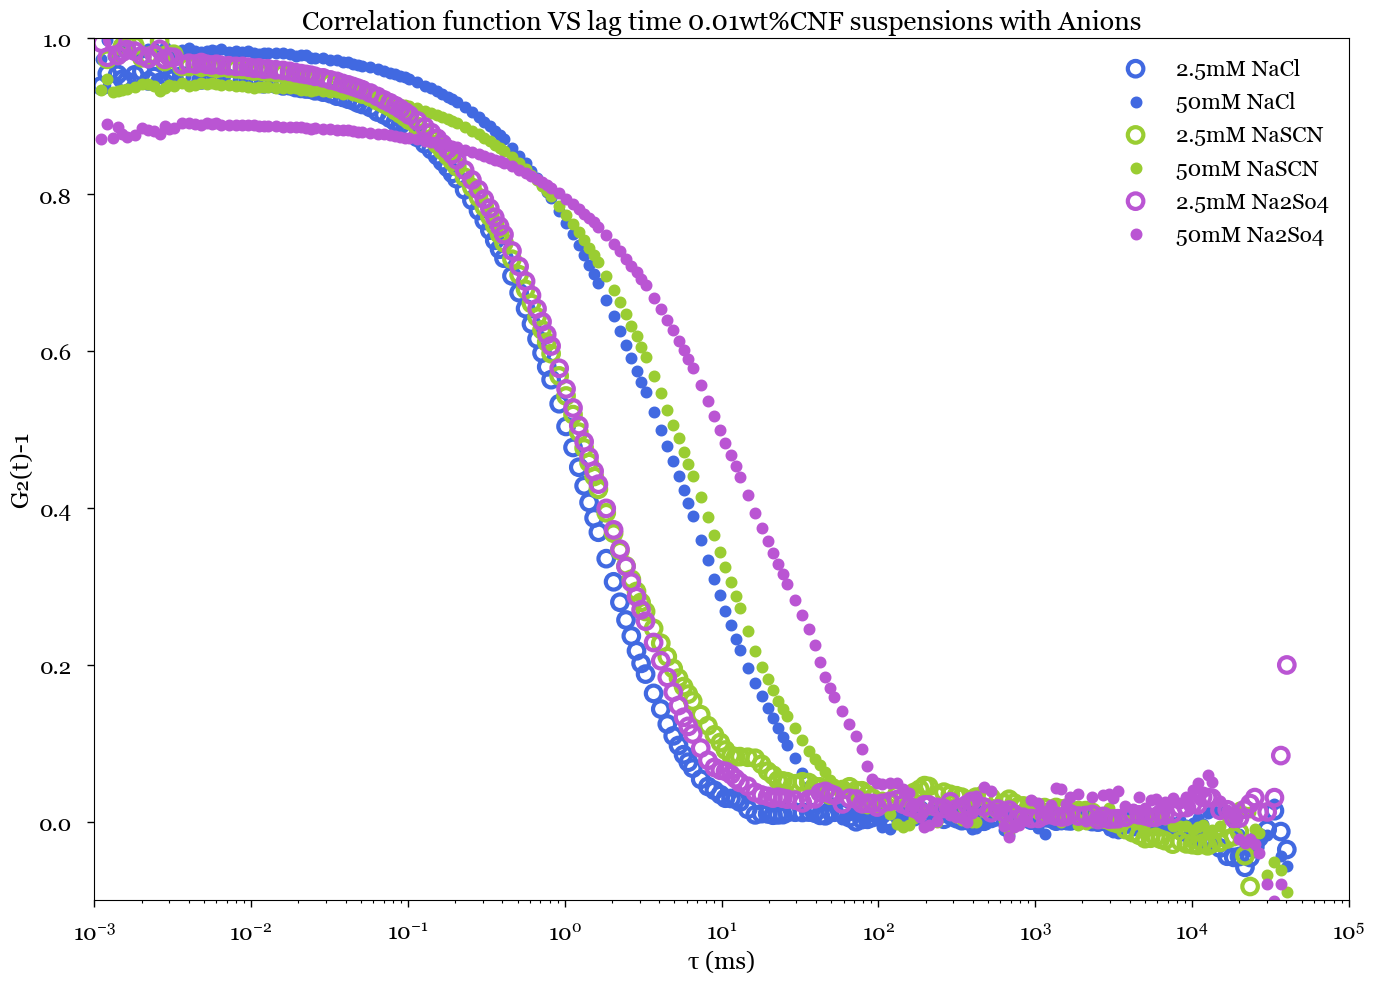

In [553]:
# Import Correlation Function data 
cnf001_025nascn = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaSCN/0.01CNF2.5NaSCN/Measurement 1/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_500nascn = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNaSCN/0.01CNF50NaSCN/Measurement 1/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_025na2so4 = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNa2SO4/0.01CNF2.5Na2SO4/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_500na2so4 = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/CNFNa2SO4/0.01CNF50Na2SO4/Measurement 1/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])

lagtime_cnf001_025nascn = cnf001_025nascn.iloc[28:,0]
lagtime_cnf001_025nascn_ms = lagtime_cnf001_025nascn*1000
corrfx_cnf001_025nascn = cnf001_025nascn.iloc[28:,1]

lagtime_cnf001_500nascn = cnf001_500nascn.iloc[28:,0]
lagtime_cnf001_500nascn_ms = lagtime_cnf001_500nascn*1000
corrfx_cnf001_500nascn = cnf001_500nascn.iloc[28:,1]

lagtime_cnf001_025na2so4 = cnf001_025na2so4.iloc[28:,0]
lagtime_cnf001_025na2so4_ms = lagtime_cnf001_025na2so4*1000
corrfx_cnf001_025na2so4 = cnf001_025na2so4.iloc[28:,1]

lagtime_cnf001_500na2so4 = cnf001_500na2so4.iloc[28:,0]
lagtime_cnf001_500na2so4_ms = lagtime_cnf001_500na2so4*1000
corrfx_cnf001_500na2so4 = cnf001_500na2so4.iloc[28:,1]

plt.scatter(lagtime_cnf001_025nacl_ms ,corrfx_cnf001_025nacl, marker='o', facecolors='none', linewidths=3, edgecolors='royalblue', label = '2.5mM NaCl')
plt.scatter(lagtime_cnf001_500nacl_ms ,corrfx_cnf001_500nacl, marker='.', facecolors='royalblue', linewidths=3, edgecolors='royalblue', label = '50mM NaCl')

plt.scatter(lagtime_cnf001_025nascn_ms ,corrfx_cnf001_025nascn, marker='o', facecolors='none', linewidths=3, edgecolors='yellowgreen', label = '2.5mM NaSCN')
plt.scatter(lagtime_cnf001_500nascn_ms ,corrfx_cnf001_500nascn, marker='.', facecolors='yellowgreen', linewidths=3, edgecolors='yellowgreen', label = '50mM NaSCN')

plt.scatter(lagtime_cnf001_025na2so4_ms ,corrfx_cnf001_025na2so4, marker='o', facecolors='none', linewidths=3, edgecolors='mediumorchid', label = '2.5mM Na2So4')
plt.scatter(lagtime_cnf001_500na2so4_ms ,corrfx_cnf001_500na2so4, marker='.', facecolors='mediumorchid', linewidths=3, edgecolors='mediumorchid', label = '50mM Na2So4')

plt.style.use('seaborn-poster')
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time 0.01wt%CNF suspensions with Monovalent Cations')
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.xscale("log")
plt.title('Correlation function VS lag time 0.01wt%CNF suspensions with Anions')
plt.savefig("Correlation function VS Scattering angle_0.01CNF Salts Anions at 65.1deg.png", dpi=1500, bbox_inches='tight')
plt.show()

In [554]:
# Fitting to 𝑔(𝑡)=𝐴𝑒𝑥𝑝[−(𝑡/𝜏)^𝛽]

def g(t, A, tau, beta):
    return A * np.exp(-(t/tau)**beta)

t_cnf001_025nascn = lagtime_cnf001_025nascn_ms
g_t_cnf001_025nascn = corrfx_cnf001_025nascn
t_cnf001_500nascn = lagtime_cnf001_500nascn_ms
g_t_cnf001_500nascn = corrfx_cnf001_500nascn

t_cnf001_025na2so4 = lagtime_cnf001_025na2so4_ms
g_t_cnf001_025na2so4 = corrfx_cnf001_025na2so4
t_cnf001_500na2so4 = lagtime_cnf001_500na2so4_ms
g_t_cnf001_500na2so4 = corrfx_cnf001_500na2so4

p0 = [1, 1,1]

# Set the parameter bounds
bounds = ([0, 0.001, 0], [1, 100000, 1])

params_cnf001_025nascn, cov_cnf001_025nascn = curve_fit(g, t_cnf001_025nascn, g_t_cnf001_025nascn, p0, bounds=bounds)
A_fit_cnf001_025nascn, tau_fit_cnf001_025nascn, beta_fit_cnf001_025nascn = params_cnf001_025nascn

params_cnf001_500nascn, cov_cnf001_500nascn = curve_fit(g, t_cnf001_500nascn, g_t_cnf001_500nascn, p0, bounds=bounds)
A_fit_cnf001_500nascn, tau_fit_cnf001_500nascn, beta_fit_cnf001_500nascn = params_cnf001_500nascn

params_cnf001_025na2so4, cov_cnf001_025na2so4 = curve_fit(g, t_cnf001_025na2so4, g_t_cnf001_025na2so4, p0, bounds=bounds)
A_fit_cnf001_025na2so4, tau_fit_cnf001_025na2so4, beta_fit_cnf001_025na2so4 = params_cnf001_025na2so4

params_cnf001_500na2so4, cov_cnf001_500na2so4 = curve_fit(g, t_cnf001_500na2so4, g_t_cnf001_500na2so4, p0, bounds=bounds)
A_fit_cnf001_500na2so4, tau_fit_cnf001_500na2so4, beta_fit_cnf001_500na2so4 = params_cnf001_500na2so4

# Table using DataFrame

samples_001CNF_anions = ['0mM salt','NaCl','2.5mM', '50mM','NaSCN','2.5mM', '50mM', 'Nasub>2</sub>SOsub>4</sub>','2.5mM', '50mM ']
A_fitted_001CNF_anions = [A_fit_cnf001_0nacl, None, A_fit_cnf001_025nacl, A_fit_cnf001_500nacl, None, A_fit_cnf001_025nascn, A_fit_cnf001_500nascn, None, A_fit_cnf001_025cscl, A_fit_cnf001_500nascn]
t_fitted_001CNF_anions = [tau_fit_cnf001_0nacl, None, tau_fit_cnf001_025nacl, tau_fit_cnf001_500nacl, None, tau_fit_cnf001_025nascn, tau_fit_cnf001_500nascn, None, tau_fit_cnf001_025cscl, tau_fit_cnf001_500nascn]
beta_fitted_001CNF_anions =  [beta_fit_cnf001_0nacl, None, beta_fit_cnf001_025nacl, beta_fit_cnf001_500nacl, None, beta_fit_cnf001_025nascn, beta_fit_cnf001_500nascn, None, beta_fit_cnf001_025cscl, beta_fit_cnf001_500nascn]

table_Parameters_001CNF_anions = {
    '0.01wt.%CNF with': samples_001CNF_anions ,
    'A' : A_fitted_001CNF_anions,
    '\u03C4 (ms)': t_fitted_001CNF_anions,
    '\u03B2': beta_fitted_001CNF_anions,
}

table_Parameters_001CNF_anions_draw = pd.DataFrame(table_Parameters_001CNF_anions)

styled_table_Parameters_001CNF_anions_draw = table_Parameters_001CNF_anions_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='Reds') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.3f}', '\u03B2': '{:.3f}'})\
    .hide(axis='index') \
    .format(na_rep='')

styled_table_Parameters_001CNF_anions_draw      


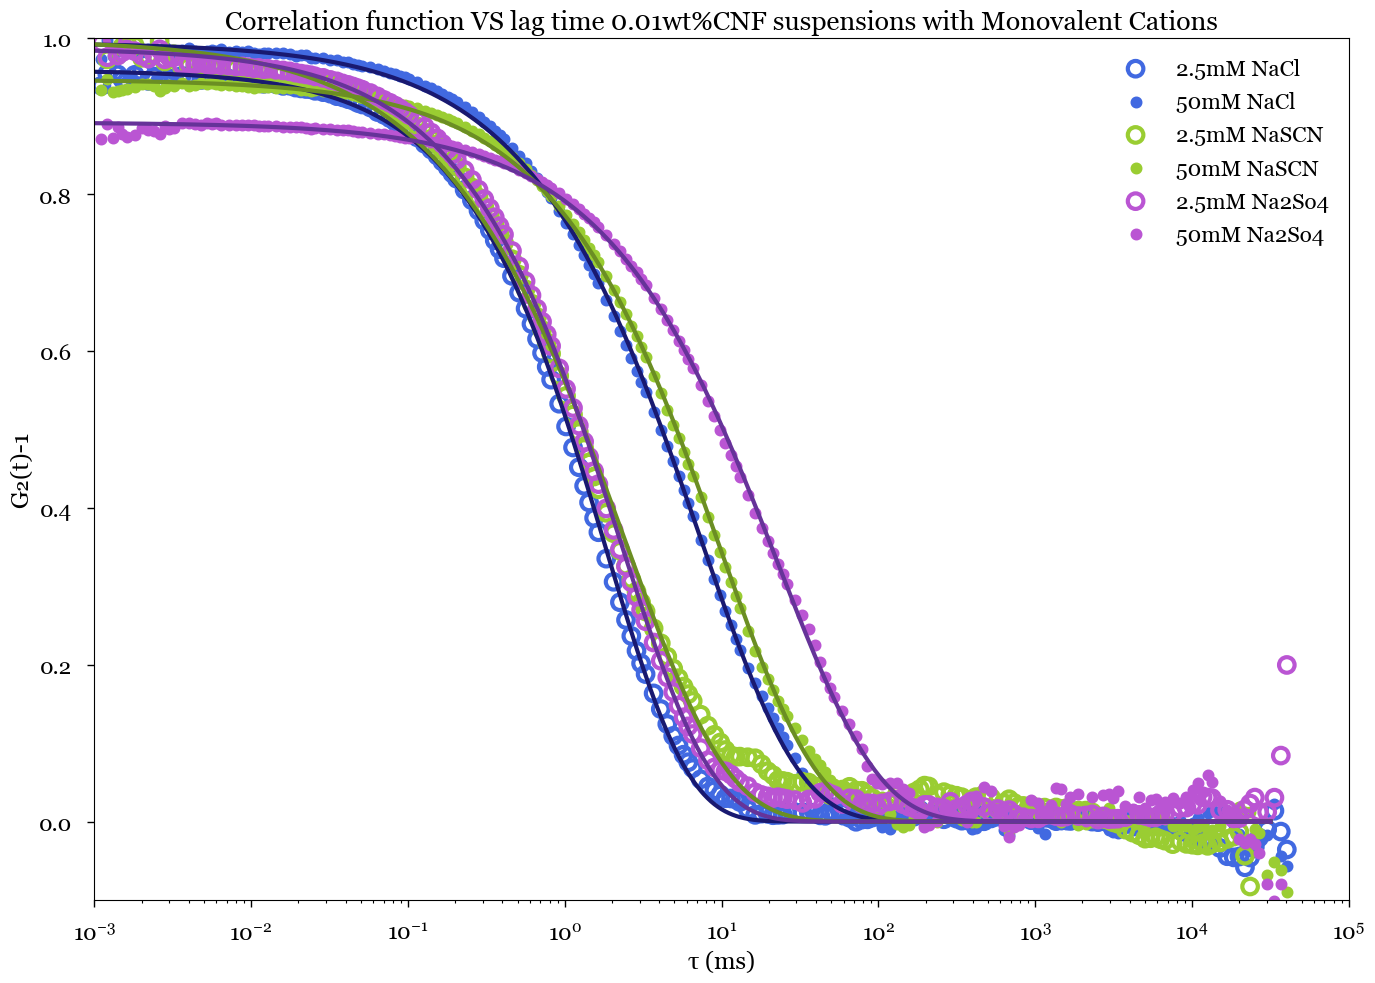

In [555]:
# Plot the fitting

t_fit_cnf001_025nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_025nacl = g(t_fit_cnf001_025nacl, A_fit_cnf001_025nacl, tau_fit_cnf001_025nacl, beta_fit_cnf001_025nacl)
t_fit_cnf001_500nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_500nacl = g(t_fit_cnf001_500nacl, A_fit_cnf001_500nacl, tau_fit_cnf001_500nacl, beta_fit_cnf001_500nacl)

t_fit_cnf001_025nascn = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_025nascn = g(t_fit_cnf001_025nascn, A_fit_cnf001_025nascn, tau_fit_cnf001_025nascn, beta_fit_cnf001_025nascn)
t_fit_cnf001_500nascn = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_500nascn = g(t_fit_cnf001_500nascn, A_fit_cnf001_500nascn, tau_fit_cnf001_500nascn, beta_fit_cnf001_500nascn)

t_fit_cnf001_025na2so4 = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_025na2so4 = g(t_fit_cnf001_025na2so4, A_fit_cnf001_025na2so4, tau_fit_cnf001_025na2so4, beta_fit_cnf001_025na2so4)
t_fit_cnf001_500na2so4 = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_500na2so4 = g(t_fit_cnf001_500na2so4, A_fit_cnf001_500na2so4, tau_fit_cnf001_500na2so4, beta_fit_cnf001_500na2so4)

plt.style.use('seaborn-poster')
plt.scatter(t_cnf001_025nacl ,corrfx_cnf001_025nacl, marker='o', facecolors='none', linewidths=3, edgecolors='royalblue', label = '2.5mM NaCl')
plt.semilogx(t_fit_cnf001_025nacl, g_fit_cnf001_025nacl, linestyle='solid', color = 'midnightblue', linewidth = 3)#4, label='2.5mM NaCl fit')

plt.scatter(t_cnf001_500nacl ,corrfx_cnf001_500nacl, marker='.', facecolors='royalblue', linewidths=3, edgecolors='royalblue', label = '50mM NaCl')
plt.semilogx(t_fit_cnf001_500nacl, g_fit_cnf001_500nacl, linestyle='solid', color = 'midnightblue', linewidth = 3)#4, label='50mM NaCl fit')

plt.scatter(t_cnf001_025nascn ,corrfx_cnf001_025nascn, marker='o', facecolors='none', linewidths=3, edgecolors='yellowgreen', label = '2.5mM NaSCN')
plt.semilogx(t_fit_cnf001_025nascn, g_fit_cnf001_025nascn, linestyle='solid', color = 'olivedrab', linewidth = 3)#4, label='2.5mM NaSCN fit')

plt.scatter(t_cnf001_500nascn ,corrfx_cnf001_500nascn, marker='.', facecolors='yellowgreen', linewidths=3, edgecolors='yellowgreen', label = '50mM NaSCN')
plt.semilogx(t_fit_cnf001_500nascn, g_fit_cnf001_500nascn, linestyle='solid', color = 'olivedrab', linewidth = 3)#4, label='50mM NaSCN fit')

plt.scatter(t_cnf001_025na2so4,corrfx_cnf001_025na2so4, marker='o', facecolors='none', linewidths=3, edgecolors='mediumorchid', label = '2.5mM Na2So4')
plt.semilogx(t_fit_cnf001_025na2so4, g_fit_cnf001_025na2so4, linestyle='solid', color = 'rebeccapurple', linewidth = 3)#4, label='2.5mM Na2So4 fit')

plt.scatter(t_cnf001_500na2so4,corrfx_cnf001_500na2so4, marker='.', facecolors='mediumorchid', linewidths=3, edgecolors='mediumorchid', label = '50mM Na2So4')
plt.semilogx(t_fit_cnf001_500na2so4, g_fit_cnf001_500na2so4, linestyle='solid', color = 'rebeccapurple', linewidth = 3)#4, label='50mM Na2So4 fit')

plt.style.use('seaborn-poster')
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time 0.01wt%CNF suspensions with Monovalent Cations')
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.xscale("log")
plt.savefig("Correlation function VS Scattering angle_0.01CNF Monovalent Salts Anions at 65.1deg fit.png", dpi=1500, bbox_inches='tight')
plt.show()

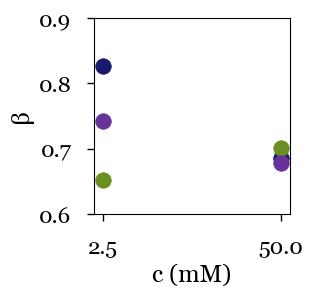

In [556]:
# Plot the fitted beta

salt_conc = [2.5, 50]
betacnf001nacl = np.array([beta_fit_cnf001_025nacl, beta_fit_cnf001_500nacl])
betacnf001nascn = np.array([beta_fit_cnf001_025nascn, beta_fit_cnf001_500nascn])
betacnf001na2so4 = np.array([beta_fit_cnf001_025na2so4, beta_fit_cnf001_500na2so4])

plt.style.use('_mpl-gallery-nogrid')
# plot
plt.scatter(salt_conc, betacnf001nacl, c='midnightblue')
plt.scatter(salt_conc, betacnf001nascn, c='olivedrab')
plt.scatter(salt_conc, betacnf001na2so4, c='rebeccapurple')

plt.xlabel('c (mM)')
plt.ylabel('\u03B2')
plt.ylim(0.6,0.9)
plt.xticks([2.5,50])
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.savefig("Stretched exponential function vs salt concentrations 0.01wt.%CNF Anions.png", dpi=1500, bbox_inches='tight')
plt.show()

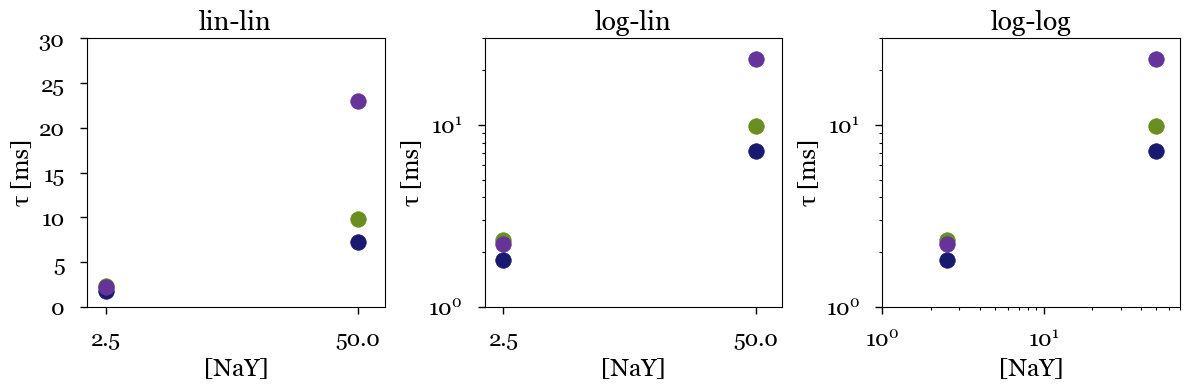

In [557]:
salt_conc = [2.5, 50]
taucnf001nacl = np.array([tau_fit_cnf001_025nacl, tau_fit_cnf001_500nacl])
taucnf001nascn = np.array([tau_fit_cnf001_025nascn, tau_fit_cnf001_500nascn])
taucnf001na2so4 = np.array([tau_fit_cnf001_025na2so4, tau_fit_cnf001_500na2so4])

plt.style.use('_mpl-gallery-nogrid')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axes[0].scatter(salt_conc, taucnf001nacl, c='midnightblue')
axes[0].scatter(salt_conc, taucnf001nascn, c='olivedrab')
axes[0].scatter(salt_conc, taucnf001na2so4, c='rebeccapurple')
axes[0].set_title('lin-lin')
axes[0].set_xlabel('[NaY]')
axes[0].set_ylabel('\u03C4 [ms]')
axes[0].set_ylim(0,30)
axes[0].set_xlim(-1,55)
axes[0].set_xticks([2.5,50])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

axes[1].scatter(salt_conc, taucnf001nacl, c='midnightblue')
axes[1].scatter(salt_conc, taucnf001nascn, c='olivedrab')
axes[1].scatter(salt_conc, taucnf001na2so4, c='rebeccapurple')
axes[1].set_title('log-lin')
axes[1].set_xlabel('[NaY]')
axes[1].set_ylabel('\u03C4 [ms]')
axes[1].set_ylim(1,30)
axes[1].set_xlim(-1,55)
axes[1].set_xticks([2.5,50])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")

axes[2].scatter(salt_conc, taucnf001nacl, c='midnightblue')
axes[2].scatter(salt_conc, taucnf001nascn, c='olivedrab')
axes[2].scatter(salt_conc, taucnf001na2so4, c='rebeccapurple')
axes[2].set_title('log-log')
axes[2].set_xlabel('[NaY]')
axes[2].set_ylabel('\u03C4 [ms]')
axes[2].set_ylim(1,30)
axes[2].set_xlim(1,70)
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
plt.savefig("Lag time as a function of salt concentrations with 0.01wt.%CNF Anions at 65.1\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

# Gathering parameters

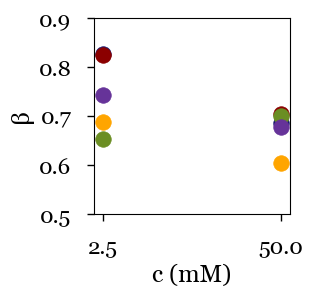

In [558]:
salt_conc = [2.5, 50]
betacnf001nacl = np.array([beta_fit_cnf001_025nacl, beta_fit_cnf001_500nacl])
betacnf001licl = np.array([beta_fit_cnf001_025licl, beta_fit_cnf001_500licl])
betacnf001cscl = np.array([beta_fit_cnf001_025cscl, beta_fit_cnf001_500cscl])
betacnf001nascn = np.array([beta_fit_cnf001_025nascn, beta_fit_cnf001_500nascn])
betacnf001na2so4 = np.array([beta_fit_cnf001_025na2so4, beta_fit_cnf001_500na2so4])

plt.style.use('_mpl-gallery-nogrid')
plt.rcParams['font.family'] = 'Georgia'
# plot
plt.scatter(salt_conc, betacnf001nacl, c='midnightblue')
plt.scatter(salt_conc, betacnf001licl, c='darkred')
plt.scatter(salt_conc, betacnf001cscl, c='orange')
plt.scatter(salt_conc, betacnf001nascn, c='olivedrab')
plt.scatter(salt_conc, betacnf001na2so4, c='rebeccapurple')

plt.xlabel('c (mM)')
plt.ylabel('\u03B2')
plt.ylim(0.5,0.9)
plt.xticks([2.5,50])
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.savefig("Stretched exponential function vs salt concentrations 0.01wt.%CNF All.png", dpi=1500, bbox_inches='tight')
plt.show()

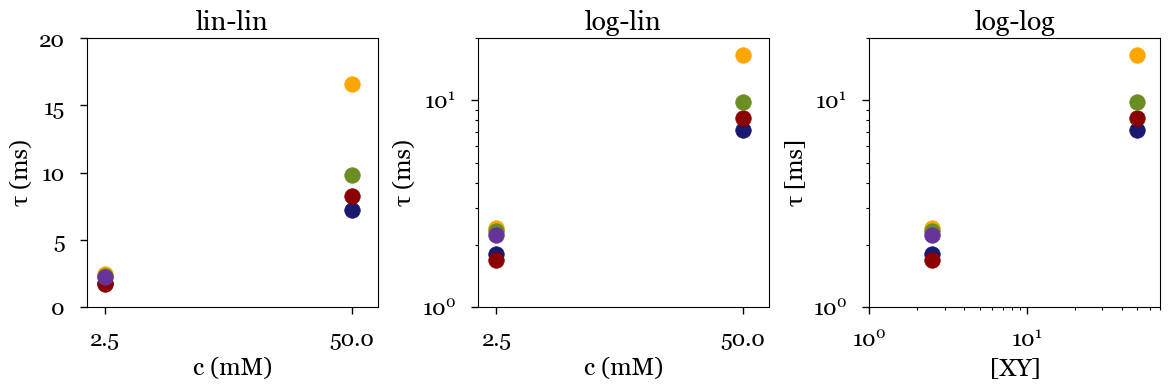

In [559]:
salt_conc = [2.5, 50]
taucnf001nacl = np.array([tau_fit_cnf001_025nacl, tau_fit_cnf001_500nacl])
taucnf001licl = np.array([tau_fit_cnf001_025licl, tau_fit_cnf001_500licl])
taucnf001cscl = np.array([tau_fit_cnf001_025cscl, tau_fit_cnf001_500cscl])
taucnf001nacl = np.array([tau_fit_cnf001_025nacl, tau_fit_cnf001_500nacl])
taucnf001nascn = np.array([tau_fit_cnf001_025nascn, tau_fit_cnf001_500nascn])
taucnf001na2so4 = np.array([tau_fit_cnf001_025na2so4, tau_fit_cnf001_500na2so4])

plt.style.use('_mpl-gallery-nogrid')
plt.rcParams['font.family'] = 'Georgia'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axes[0].scatter(salt_conc, taucnf001nacl, c='midnightblue')
axes[0].scatter(salt_conc, taucnf001licl, c='darkred')
axes[0].scatter(salt_conc, taucnf001cscl, c='orange')
axes[0].scatter(salt_conc, taucnf001nascn, c='olivedrab')
axes[0].scatter(salt_conc, taucnf001na2so4, c='rebeccapurple')
axes[0].set_title('lin-lin')
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_ylim(0,20)
axes[0].set_xlim(-1,55)
axes[0].set_xticks([2.5,50])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

axes[1].scatter(salt_conc, taucnf001nacl, c='midnightblue')
axes[1].scatter(salt_conc, taucnf001licl, c='darkred')
axes[1].scatter(salt_conc, taucnf001cscl, c='orange')
axes[1].scatter(salt_conc, taucnf001nascn, c='olivedrab')
axes[1].scatter(salt_conc, taucnf001na2so4, c='rebeccapurple')
axes[1].set_title('log-lin')
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03C4 (ms)')
axes[1].set_ylim(1,20)
axes[1].set_xlim(-1,55)
axes[1].set_xticks([2.5,50])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")

axes[2].scatter(salt_conc, taucnf001nacl, c='midnightblue')
axes[2].scatter(salt_conc, taucnf001licl, c='darkred')
axes[2].scatter(salt_conc, taucnf001cscl, c='orange')
axes[2].scatter(salt_conc, taucnf001nascn, c='olivedrab')
axes[2].scatter(salt_conc, taucnf001na2so4, c='rebeccapurple')
axes[2].set_title('log-log')
axes[2].set_xlabel('[XY]')
axes[2].set_ylabel('\u03C4 [ms]')
axes[2].set_ylim(1,20)
axes[2].set_xlim(1,70)
axes[2].set_xticks([2.5,50])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
plt.savefig("Lag time as a function of salt concentrations with 0.01wt.%CNF All salts at 65.1\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

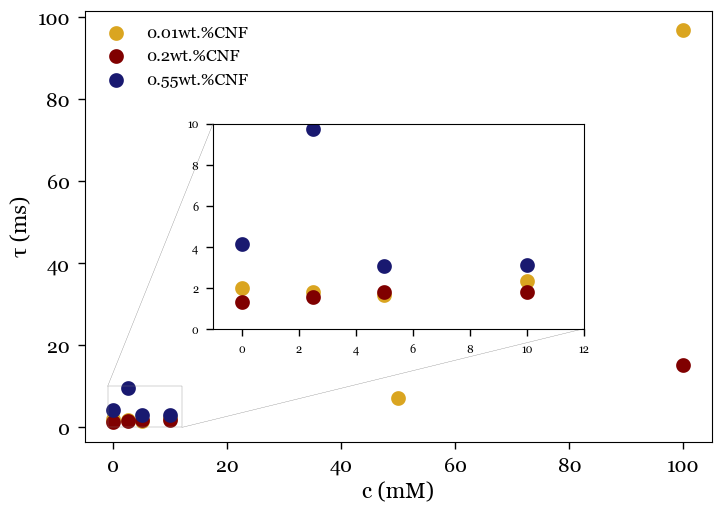

In [560]:
salt_conc001 = [0, 2.5, 5, 10, 50, 100]
tau_cnf001_NaCl = np.array([tau_fit_cnf001_0nacl, tau_fit_cnf001_025nacl, tau_fit_cnf001_050nacl, tau_fit_cnf001_100nacl, tau_fit_cnf001_500nacl, tau_fit_cnf001_1000nacl])

#salt_conc02 = [0, 2.5, 5, 10, 50, 100]
salt_conc02 = [0, 2.5, 5, 10, 100]
#tau_cnf02_NaCl = np.array([tau_fit_cnf02_0nacl, tau_fit_cnf02_025nacl, tau_fit_cnf02_050nacl, tau_fit_cnf02_100nacl, tau_fit_cnf02_500nacl, tau_fit_cnf02_1000nacl])
tau_cnf02_NaCl = np.array([tau_fit_cnf02_0nacl, tau_fit_cnf02_025nacl, tau_fit_cnf02_050nacl, tau_fit_cnf02_100nacl, tau_fit_cnf02_1000nacl])

salt_conc055 = [0, 2.5, 5, 10]
tau_cnf055_NaCl = np.array([tau_fit_cnf055_0nacl, tau_fit_cnf055_025nacl, tau_fit_cnf055_050nacl, tau_fit_cnf055_100nacl])


colors001 = ['goldenrod', 'midnightblue', 'firebrick', 'darkgreen', 'darkmagenta', 'orangered']
#colors02 = ['darkred', 'midnightblue', 'darkgreen', 'orangered', 'darkslategray', 'indigo']
colors02 = ['darkred', 'midnightblue', 'darkgreen', 'orangered', 'indigo']
colors055 = ['midnightblue', 'darkorange', 'darkgreen', 'firebrick']

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

plt.style.use('seaborn-paper')
plt.rcParams['font.family'] = 'Georgia'
# plot
fig, ax = plt.subplots()

ax.scatter(salt_conc001, tau_cnf001_NaCl, marker='o', facecolors='goldenrod', linewidths=5, edgecolors='goldenrod', label = '0.01wt.%CNF')
ax.scatter(salt_conc02, tau_cnf02_NaCl, marker='o', facecolors='maroon', linewidths=5, edgecolors='maroon', label = '0.2wt.%CNF')
ax.scatter(salt_conc055, tau_cnf055_NaCl, marker='o', facecolors='midnightblue', linewidths=5, edgecolors='midnightblue', label = '0.55wt.%CNF')

# Create the zoomed-inset axes with a different location
ax_zoom = zoomed_inset_axes(ax, zoom=5, loc='center')

# Plot the zoomed-in region
ax_zoom.scatter(salt_conc001, tau_cnf001_NaCl, marker='o', facecolors='goldenrod', linewidths=5, edgecolors='goldenrod', label = '0.01wt.%CNF')
ax_zoom.scatter(salt_conc02, tau_cnf02_NaCl, marker='o', facecolors='maroon', linewidths=5, edgecolors='maroon', label = '0.2wt.%CNF')
ax_zoom.scatter(salt_conc055, tau_cnf055_NaCl, marker='o', facecolors='midnightblue', linewidths=5, edgecolors='midnightblue', label = '0.55wt.%CNF')

# Specify the limits of the zoomed-in region
x1, x2, y1, y2 = -1, 12, 0, 10
ax_zoom.set_xlim(x1, x2)
ax_zoom.set_ylim(y1, y2)
ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out')


# Create a mark for the zoomed-in region
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
ax.legend(frameon=False, fontsize=12, loc='upper left')

ax.set_xlabel('c (mM)', fontsize=16)
ax.set_ylabel('\u03C4 (ms)', fontsize=16)
#for ax in axs.flat:
    #ax.tick_params(axis='both', labelsize=12, which='both', width=2)
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)

plt.savefig("Realaxation time vs NaCl concentrations All_Zoom.png", dpi=1500, bbox_inches='tight')
plt.show()

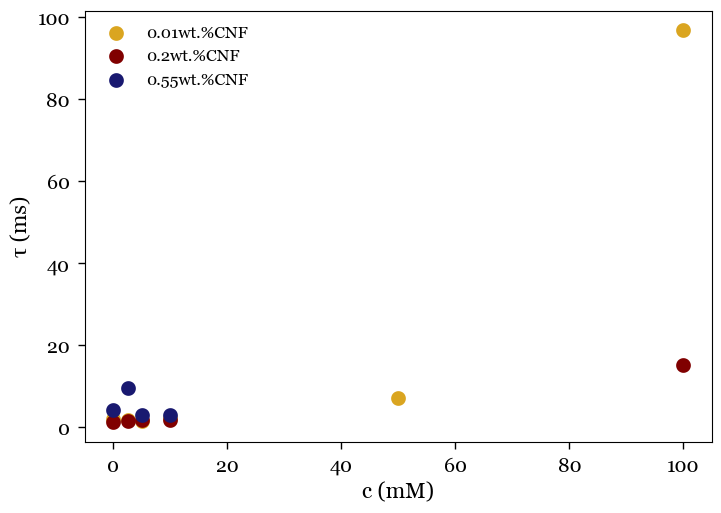

In [561]:
plt.style.use('seaborn-paper')
plt.rcParams['font.family'] = 'Georgia'
# plot

plt.scatter(salt_conc001, tau_cnf001_NaCl, marker='o', facecolors='goldenrod', linewidths=5, edgecolors='goldenrod', label = '0.01wt.%CNF')
plt.scatter(salt_conc02, tau_cnf02_NaCl, marker='o', facecolors='maroon', linewidths=5, edgecolors='maroon', label = '0.2wt.%CNF')
plt.scatter(salt_conc055, tau_cnf055_NaCl, marker='o', facecolors='midnightblue', linewidths=5, edgecolors='midnightblue', label = '0.55wt.%CNF')
plt.xlabel('c (mM)', fontsize=16)
plt.ylabel('\u03C4 (ms)', fontsize=16)
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)
plt.legend(frameon=False, fontsize=12)
#plt.xlim(-10,110)
#plt.yscale("log")
plt.savefig("Realaxation time vs NaCl concentrations All.png", dpi=1500, bbox_inches='tight')
plt.show()

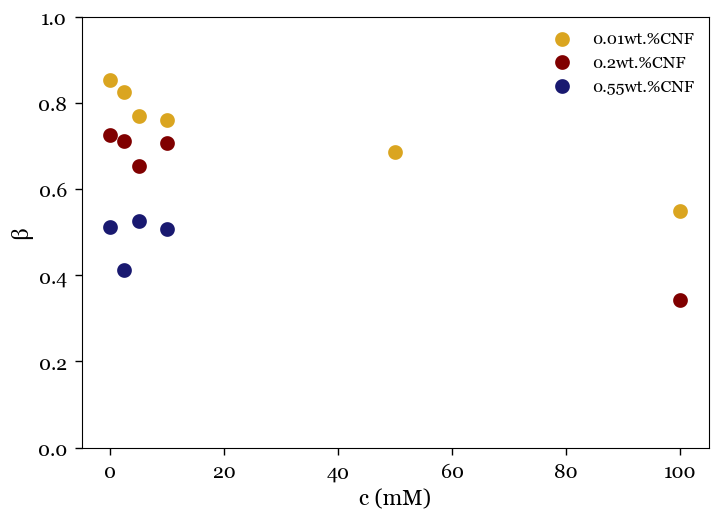

In [562]:
salt_conc001 = [0, 2.5, 5, 10, 50, 100]
beta_cnf001_NaCl = np.array([beta_fit_cnf001_0nacl, beta_fit_cnf001_025nacl, beta_fit_cnf001_050nacl, beta_fit_cnf001_100nacl, beta_fit_cnf001_500nacl, beta_fit_cnf001_1000nacl])

#salt_conc02 = [0, 2.5, 5, 10, 50, 100]
salt_conc02 = [0, 2.5, 5, 10, 100]
#beta_cnf02_NaCl = np.array([beta_fit_cnf02_0nacl, beta_fit_cnf02_025nacl, beta_fit_cnf02_050nacl, beta_fit_cnf02_100nacl, beta_fit_cnf02_500nacl, beta_fit_cnf02_1000nacl])
beta_cnf02_NaCl = np.array([beta_fit_cnf02_0nacl, beta_fit_cnf02_025nacl, beta_fit_cnf02_050nacl, beta_fit_cnf02_100nacl, beta_fit_cnf02_1000nacl])

salt_conc055 = [0, 2.5, 5, 10]
beta_cnf055_NaCl = np.array([beta_fit_cnf055_0nacl, beta_fit_cnf055_025nacl, beta_fit_cnf055_050nacl, beta_fit_cnf055_100nacl])


colors001 = ['goldenrod', 'midnightblue', 'firebrick', 'darkgreen', 'darkmagenta', 'orangered']
#colors02 = ['darkred', 'midnightblue', 'darkgreen', 'orangered', 'darkslategray', 'indigo']
colors02 = ['darkred', 'midnightblue', 'darkgreen', 'orangered', 'indigo']
colors055 = ['midnightblue', 'darkorange', 'darkgreen', 'firebrick']


# plot
plt.style.use('seaborn-paper')
plt.scatter(salt_conc001, beta_cnf001_NaCl, marker='o', facecolors='goldenrod', linewidths=5, edgecolors='goldenrod', label = '0.01wt.%CNF')
plt.scatter(salt_conc02, beta_cnf02_NaCl, marker='o', facecolors='maroon', linewidths=5, edgecolors='maroon', label = '0.2wt.%CNF')
plt.scatter(salt_conc055, beta_cnf055_NaCl, marker='o', facecolors='midnightblue', linewidths=5, edgecolors='midnightblue', label = '0.55wt.%CNF')
plt.xlabel('c (mM)', fontsize=16)
plt.ylabel('\u03B2', fontsize=16)
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)
plt.ylim(0,1)
plt.legend(frameon=False, fontsize=12)
plt.savefig("Stretched exponential function vs NaCl concentrations All.png", dpi=1500, bbox_inches='tight')
plt.show()

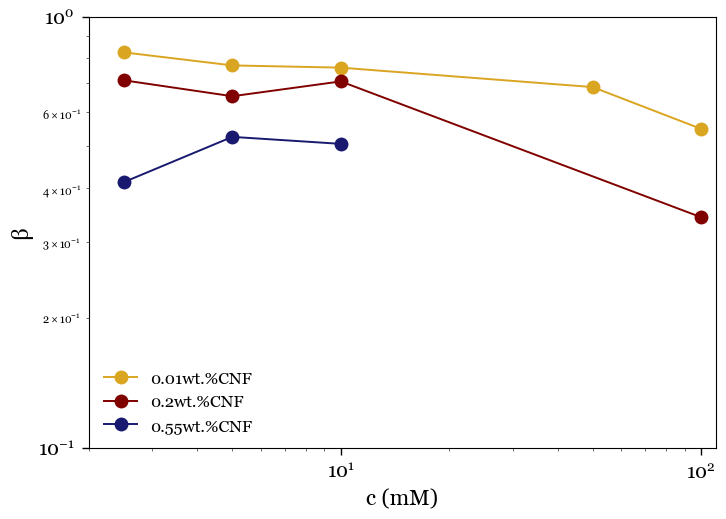

In [563]:
salt_conc001 = [2.5, 5, 10, 50, 100]
beta_cnf001_NaCl = np.array([ beta_fit_cnf001_025nacl, beta_fit_cnf001_050nacl, beta_fit_cnf001_100nacl, beta_fit_cnf001_500nacl, beta_fit_cnf001_1000nacl])
#salt_conc02 = [0, 2.5, 5, 10, 50, 100]
salt_conc02 = [2.5, 5, 10, 100]
#beta_cnf02_NaCl = np.array([beta_fit_cnf02_0nacl, beta_fit_cnf02_025nacl, beta_fit_cnf02_050nacl, beta_fit_cnf02_100nacl, beta_fit_cnf02_500nacl, beta_fit_cnf02_1000nacl])
beta_cnf02_NaCl = np.array([beta_fit_cnf02_025nacl, beta_fit_cnf02_050nacl, beta_fit_cnf02_100nacl, beta_fit_cnf02_1000nacl])
#print(beta_cnf02_NaCl)
salt_conc055 = [2.5, 5, 10]
beta_cnf055_NaCl = np.array([beta_fit_cnf055_025nacl, beta_fit_cnf055_050nacl, beta_fit_cnf055_100nacl])
#print(beta_cnf055_NaCl)

colors001 = ['goldenrod', 'midnightblue', 'firebrick', 'darkgreen', 'darkmagenta', 'orangered']
#colors02 = ['darkred', 'midnightblue', 'darkgreen', 'orangered', 'darkslategray', 'indigo']
colors02 = ['darkred', 'midnightblue', 'darkgreen', 'orangered', 'indigo']
colors055 = ['midnightblue', 'darkorange', 'darkgreen', 'firebrick']

plt.style.use('seaborn-paper')

# plot
plt.plot(salt_conc001, beta_cnf001_NaCl, linestyle="-", marker="o", markersize = 10, c='goldenrod', label = '0.01wt.%CNF')
plt.plot(salt_conc02, beta_cnf02_NaCl, linestyle="-", marker="o", markersize = 10, c='maroon', label = '0.2wt.%CNF')
plt.plot(salt_conc055, beta_cnf055_NaCl, linestyle="-", marker="o", markersize = 10, c='midnightblue', label = '0.55wt.%CNF')

#plt.scatter(salt_conc001, beta_cnf001_NaCl, marker='o', facecolors='goldenrod', linewidths=5, edgecolors='goldenrod', label = '0.01wt.%CNF')
#plt.scatter(salt_conc02, beta_cnf02_NaCl, marker='o', facecolors='maroon', linewidths=5, edgecolors='maroon', label = '0.2wt.%CNF')
#plt.scatter(salt_conc055, beta_cnf055_NaCl, marker='o', facecolors='midnightblue', linewidths=5, edgecolors='midnightblue', label = '0.55wt.%CNF')
plt.xlabel('c (mM)', fontsize=16)
plt.ylabel('\u03B2', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)
plt.ylim(0.1,1)
plt.xlim(2,110)
plt.legend(frameon=False, fontsize=12)
plt.savefig("Stretched exponential function vs NaCl concentrations All Lined.png", dpi=1500, bbox_inches='tight')
plt.show()

In [44]:
print('\u03B2 of Neat CNF =', beta_neatCNF)
print('\u03B2 of 0.01wt.%CNF with NaCl =', beta_cnf001_NaCl)
print('\u03B2 of 0.2wt.%CNF with NaCl =', beta_cnf02_NaCl)
print('\u03B2 of 0.55wt.%CNF with NaCl =', beta_cnf055_NaCl)
print('\u03B2 of 0.01wt.%CNF with NaCl =', betacnf001nacl)
print('\u03B2 of 0.01wt.%CNF with LiCl =', betacnf001licl)
print('\u03B2 of 0.01wt.%CNF with CsCl =', betacnf001cscl)
print('\u03B2 of 0.01wt.%CNF with NaSCN =', betacnf001nascn)
print('\u03B2 of 0.01wt.%CNF with Na2SO4 =', betacnf001na2so4)

β of Neat CNF = [0.85165946 0.72565273 0.47532218]
β of 0.01wt.%CNF with NaCl = [0.85165946 0.82582138 0.77022708 0.76108222 0.68607025 0.54875453]
β of 0.2wt.%CNF with NaCl = [0.72565273 0.7113939  0.65336966 0.70715464 0.34236802]
β of 0.55wt.%CNF with NaCl = [0.47532218 0.34337519 0.483794   0.48755985]
β of 0.01wt.%CNF with NaCl = [0.82582138 0.68607025]
β of 0.01wt.%CNF with LiCl = [0.82356331 0.70310161]
β of 0.01wt.%CNF with CsCl = [0.68623756 0.60331694]
β of 0.01wt.%CNF with NaSCN = [0.65231385 0.70042848]
β of 0.01wt.%CNF with Na2SO4 = [0.74261278 0.67809091]


In [45]:
print('\u03C4 of Neat CNF =', tau)
print('\u03C4 of 0.01wt.%CNF with NaCl =', taucnf001nacl)
print('\u03C4 of 0.2wt.%CNF with NaCl =', taucnf02nacl)
print('\u03C4 of 0.55wt.%CNF with NaCl =', taucnf055nacl)
print('\u03C4 of 0.01wt.%CNF with NaCl =', taucnf001nacl)
print('\u03C4 of 0.01wt.%CNF with LiCl =', taucnf001licl)
print('\u03C4 of 0.01wt.%CNF with CsCl =', taucnf001cscl)
print('\u03C4 of 0.01wt.%CNF with NaSCN =', taucnf001nascn)
print('\u03C4 of 0.01wt.%CNF with Na2SO4 =', taucnf001na2so4)

τ of Neat CNF = [0.00197822 0.00129586 0.00388595]
τ of 0.01wt.%CNF with NaCl = [0.0018065  0.00722548]
τ of 0.2wt.%CNF with NaCl = [0.00129586 0.00152628 0.00178543 0.00177286 0.01515613]
τ of 0.55wt.%CNF with NaCl = [0.00388595 0.00777456 0.00285965 0.00300651]
τ of 0.01wt.%CNF with NaCl = [0.0018065  0.00722548]
τ of 0.01wt.%CNF with LiCl = [0.00169362 0.00824141]
τ of 0.01wt.%CNF with CsCl = [0.00242112 0.01657443]
τ of 0.01wt.%CNF with NaSCN = [0.00234061 0.00982981]
τ of 0.01wt.%CNF with Na2SO4 = [0.00221951 0.02303813]


# Plot by varying CNF Concentrations

# 2.5mM NaCl

In [282]:
# Table using DataFrame

samples_CNF_025NaCl = ['0.01wt.%CNF', '0.2wt.%CNF', '0.55wt.%CNF']
A_fitted_CNF_025NaCl = [A_fit_cnf001_025nacl, A_fit_cnf02_025nacl, A_fit_cnf055_025nacl,]
t_fitted_CNF_025NaCl = [tau_fit_cnf001_025nacl, tau_fit_cnf02_025nacl, tau_fit_cnf055_025nacl]
beta_fitted_CNF_025NaCl =  [beta_fit_cnf001_025nacl, beta_fit_cnf02_025nacl, beta_fit_cnf055_025nacl,]
table_Parameters_CNF_025NaCl = {
    '2.5mM NaCl with': samples_CNF_025NaCl ,
    'A' : A_fitted_CNF_025NaCl,
    '\u03C4 (ms)': t_fitted_CNF_025NaCl,
    '\u03B2': beta_fitted_CNF_025NaCl,
}

table_Parameters_CNF_025NaCl_draw = pd.DataFrame(table_Parameters_CNF_025NaCl)

styled_table_Parameters_CNF_025NaCl_draw = table_Parameters_CNF_025NaCl_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='Reds') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.3f}', '\u03B2': '{:.3f}'})\
    .hide(axis='index')

styled_table_Parameters_CNF_025NaCl_draw           


In [564]:
# Save the styled table method 1
# Convert styled DataFrame to HTML table
html_styled_table_Parameters_CNF_025NaCl = styled_table_Parameters_CNF_025NaCl_draw.to_html()

# Save the HTML table to a temporary file
with open('temp.html', 'w') as f:
    f.write(html_styled_table_Parameters_CNF_025NaCl)
    
# Save the HTML table as a PNG image
imgkit.from_file('temp.html', 'Table of Fitted Parameters for 2.5mM NaCl with CNF.png', options=options)

True

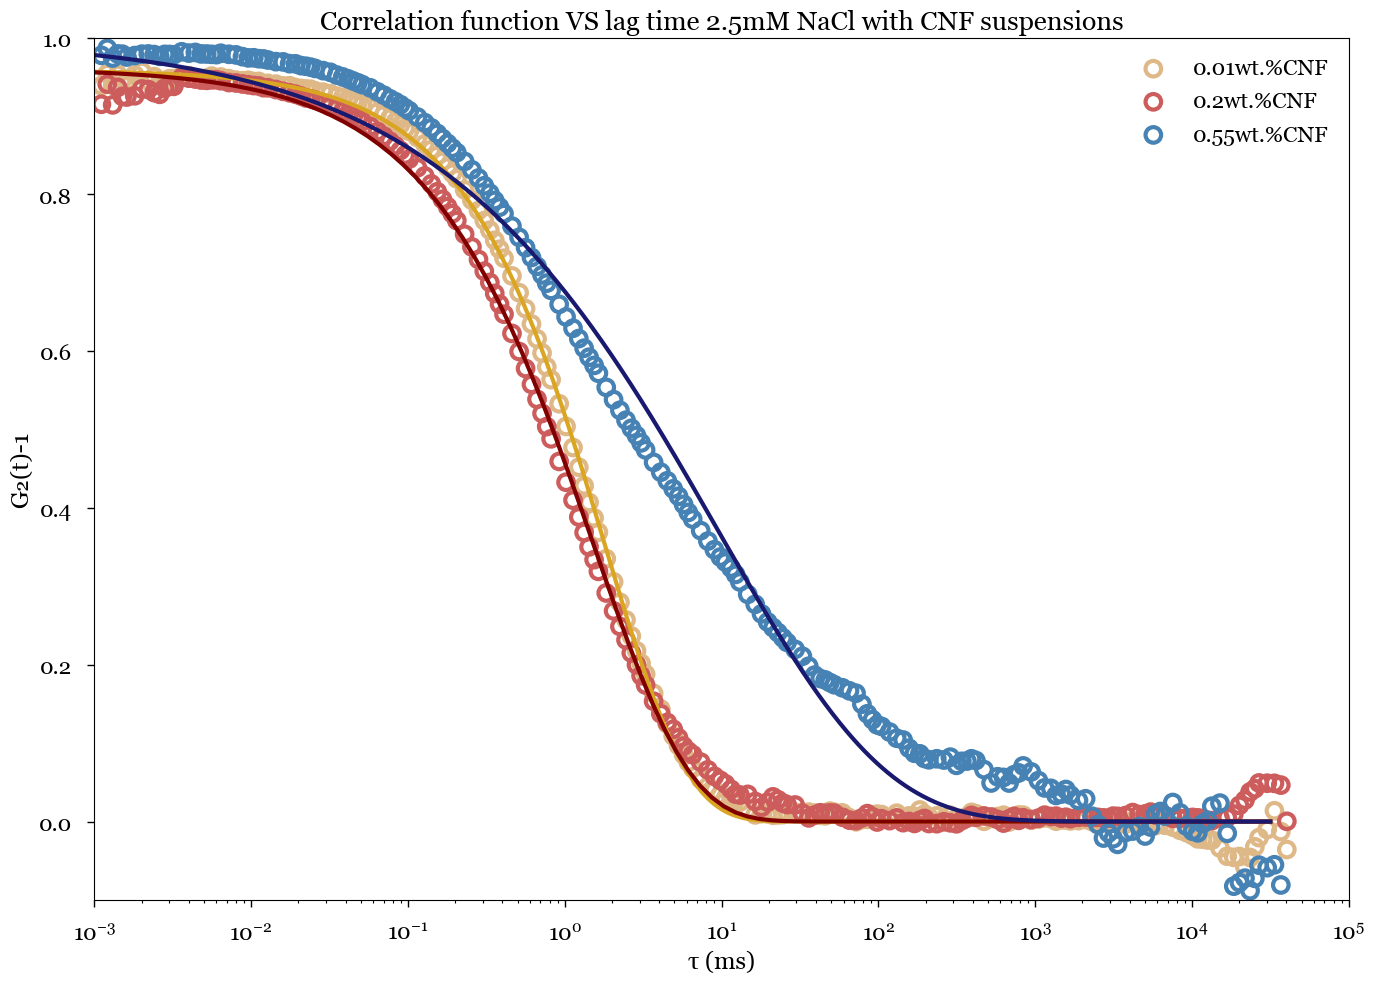

In [565]:
# Plot the fitting 

plt.style.use('seaborn-poster')
plt.scatter(t_cnf001_025nacl, g_t_cnf001_025nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='burlywood', label = '0.01wt.%CNF')
plt.semilogx(t_fit_cnf001_025nacl, g_fit_cnf001_025nacl,  linestyle='solid', color = 'goldenrod', linewidth = 3)# 4, label='0.01wt.%CNF fit')
plt.scatter(t_cnf02_025nacl, g_t_cnf02_025nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='indianred', label = '0.2wt.%CNF')
plt.semilogx(t_fit_cnf02_025nacl, g_fit_cnf02_025nacl, linestyle='solid', color = 'maroon', linewidth = 3)# label='0.2wt.%CNF fit')
plt.scatter(t_cnf055_025nacl, g_t_cnf055_025nacl, marker='o', facecolors='none', linewidths=3, edgecolors='steelblue', label = '0.55wt.%CNF')
plt.semilogx(t_fit_cnf055_025nacl, g_fit_cnf055_025nacl, linestyle='solid', color = 'midnightblue', linewidth = 3)# label='0.55wt.%CNF fit')

plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')
plt.xscale("log")
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time 2.5mM NaCl with CNF suspensions') 
plt.savefig("Correlation function VS Scattering angle_2.5mMNaCl at 65.1deg fit.png", dpi=1500, bbox_inches='tight')
plt.show()

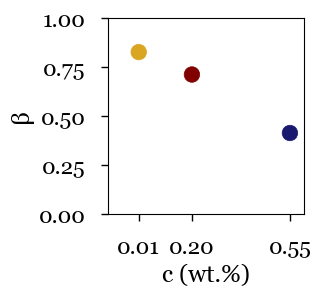

In [566]:
cnf_conc = [0.01, 0.2, 0.55]
beta_025nacl = np.array([beta_fit_cnf001_025nacl,beta_fit_cnf02_025nacl,beta_fit_cnf055_025nacl])

colors = ['goldenrod', 'maroon', 'midnightblue']
plt.style.use('_mpl-gallery-nogrid')
# plot
plt.scatter(cnf_conc, beta_025nacl, c=colors)
plt.xlabel('c (wt.%)')
plt.ylabel('\u03B2')
plt.xlim(-0.1,0.6)
plt.ylim(0,1)
plt.xticks([0.01,0.2,0.55])
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
#plt.title('Stretched exponential function vs CNF concentrations')
plt.savefig("Stretched exponential function vs CNF concentrations 2.5mMNaCl.png", dpi=1500, bbox_inches='tight')
plt.show()

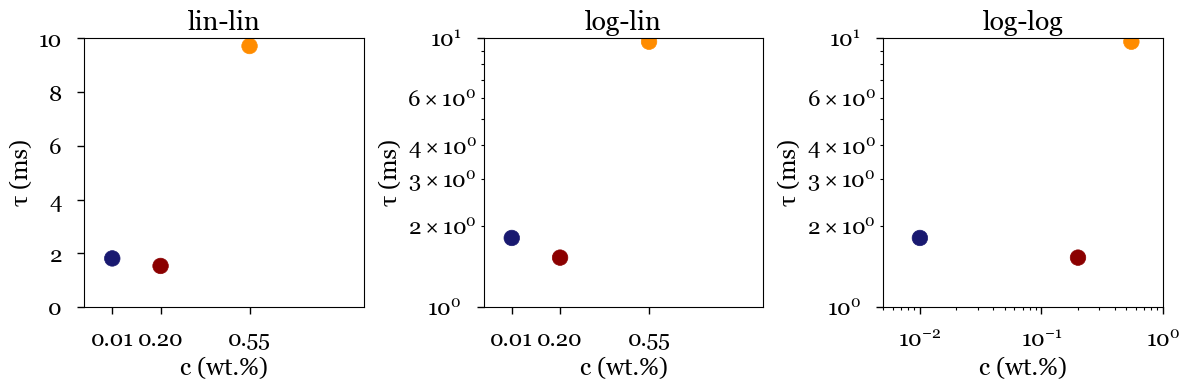

In [567]:
# Plot tau 

tau_CNF_025NaCl = np.array([tau_fit_cnf001_025nacl, tau_fit_cnf02_025nacl, tau_fit_cnf055_025nacl])
colors = ['midnightblue', 'darkred', 'darkorange']
plt.style.use('_mpl-gallery-nogrid')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

#fig.subtitle('Lag time as a function of NaCl concentrations with 0.01wt.%CNF at 65.1\u00b0 2D Auto')
axes[0].scatter(cnf_conc, tau_CNF_025NaCl , c=colors)
axes[0].set_title('lin-lin')
axes[0].set_xlabel('c (wt.%)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_ylim(0,10)
axes[0].set_xlim(-0.1, 1)
axes[0].set_xticks([0.01,0.2,0.55])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

axes[1].scatter(cnf_conc, tau_CNF_025NaCl , c=colors)
axes[1].set_title('log-lin')
axes[1].set_xlabel('c (wt.%)')
axes[1].set_ylabel('\u03C4 (ms)')
axes[1].set_ylim(1,10)
axes[1].set_xlim(-0.1,1)
axes[1].set_xticks([0.01,0.2,0.55])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")

axes[2].scatter(cnf_conc, tau_CNF_025NaCl , c=colors)
axes[2].set_title('log-log')
axes[2].set_xlabel('c (wt.%)')
axes[2].set_ylabel('\u03C4 (ms)')
axes[2].set_ylim(1,10)
axes[2].set_xlim(0.005,1)
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
plt.savefig("Lag time as a function of CNF concentrations with 2.5mM NaCl at 65.1\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

# 5mM NaCl

In [281]:
# Table using DataFrame

samples_CNF_050NaCl = ['0.01wt.%CNF', '0.2wt.%CNF', '0.55wt.%CNF']
A_fitted_CNF_050NaCl = [A_fit_cnf001_050nacl, A_fit_cnf02_050nacl, A_fit_cnf055_050nacl,]
t_fitted_CNF_050NaCl = [tau_fit_cnf001_050nacl, tau_fit_cnf02_050nacl, tau_fit_cnf055_050nacl]
beta_fitted_CNF_050NaCl =  [beta_fit_cnf001_050nacl, beta_fit_cnf02_050nacl, beta_fit_cnf055_050nacl,]
table_Parameters_CNF_050NaCl = {
    '5.0mM NaCl with': samples_CNF_050NaCl ,
    'A' : A_fitted_CNF_050NaCl,
    '\u03C4 (ms)': t_fitted_CNF_050NaCl,
    '\u03B2': beta_fitted_CNF_050NaCl,
}

table_Parameters_CNF_050NaCl_draw = pd.DataFrame(table_Parameters_CNF_050NaCl)

styled_table_Parameters_CNF_050NaCl_draw = table_Parameters_CNF_050NaCl_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='Reds') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.3f}', '\u03B2': '{:.3f}'})\
    .hide(axis='index')

styled_table_Parameters_CNF_050NaCl_draw        

In [568]:
# Save the styled table method 1
# Convert styled DataFrame to HTML table
html_styled_table_Parameters_CNF_050NaCl = styled_table_Parameters_CNF_050NaCl_draw.to_html()

# Save the HTML table to a temporary file
with open('temp.html', 'w') as f:
    f.write(html_styled_table_Parameters_CNF_050NaCl)
    
# Save the HTML table as a PNG image
imgkit.from_file('temp.html', 'Table of Fitted Parameters for 5.0mM NaCl with CNF.png', options=options)

True

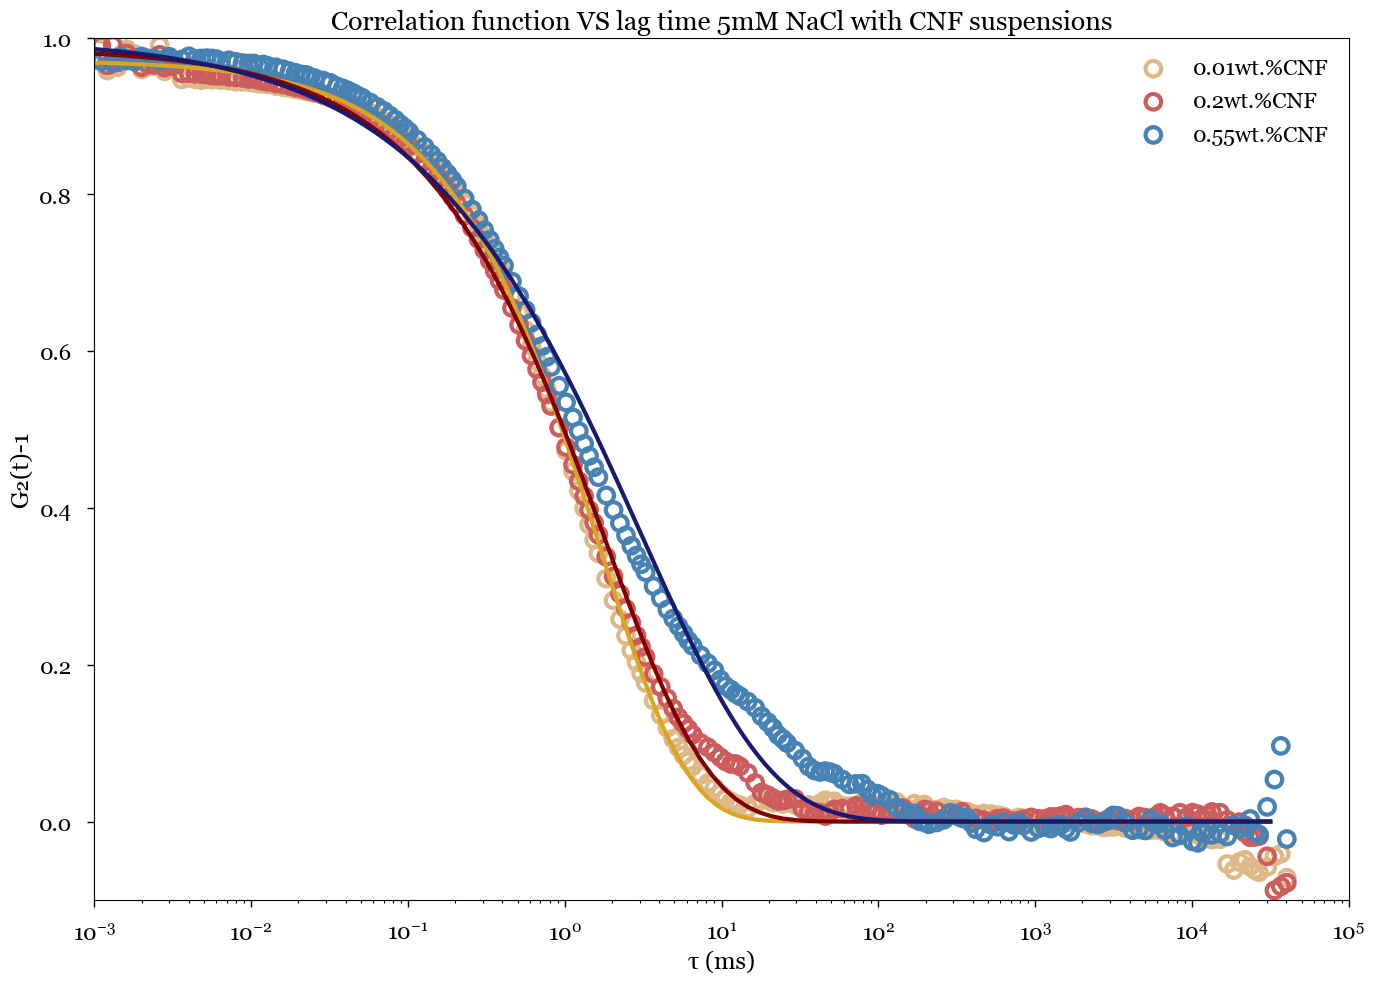

In [569]:
# Plot the fitting 

plt.style.use('seaborn-poster')
plt.scatter(t_cnf001_050nacl, g_t_cnf001_050nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='burlywood', label = '0.01wt.%CNF')
plt.semilogx(t_fit_cnf001_050nacl, g_fit_cnf001_050nacl,  linestyle='solid', color = 'goldenrod', linewidth = 3)# 4, label='0.01wt.%CNF fit')
plt.scatter(t_cnf02_050nacl, g_t_cnf02_050nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='indianred', label = '0.2wt.%CNF')
plt.semilogx(t_fit_cnf02_050nacl, g_fit_cnf02_050nacl, linestyle='solid', color = 'maroon', linewidth = 3)# label='0.2wt.%CNF fit')
plt.scatter(t_cnf055_050nacl, g_t_cnf055_050nacl, marker='o', facecolors='none', linewidths=3, edgecolors='steelblue', label = '0.55wt.%CNF')
plt.semilogx(t_fit_cnf055_050nacl, g_fit_cnf055_050nacl, linestyle='solid', color = 'midnightblue', linewidth = 3)# label='0.55wt.%CNF fit')

plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')
plt.xscale("log")
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time 5mM NaCl with CNF suspensions') 
plt.savefig("Correlation function VS Scattering angle_5mMNaCl at 65.1deg fit.png", dpi=1500, bbox_inches='tight')
plt.show()

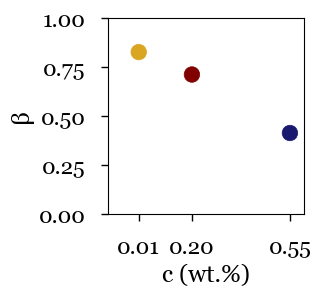

In [570]:
cnf_conc = [0.01, 0.2, 0.55]
beta_050nacl = np.array([beta_fit_cnf001_050nacl,beta_fit_cnf02_050nacl,beta_fit_cnf055_050nacl])

colors = ['goldenrod', 'maroon', 'midnightblue']
plt.style.use('_mpl-gallery-nogrid')
# plot
plt.scatter(cnf_conc, beta_025nacl, c=colors)
plt.xlabel('c (wt.%)')
plt.ylabel('\u03B2')
plt.xlim(-0.1,0.6)
plt.ylim(0,1)
plt.xticks([0.01,0.2,0.55])
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
#plt.title('Stretched exponential function vs CNF concentrations')
plt.savefig("Stretched exponential function vs CNF concentrations 5mMNaCl.png", dpi=1500, bbox_inches='tight')
plt.show()

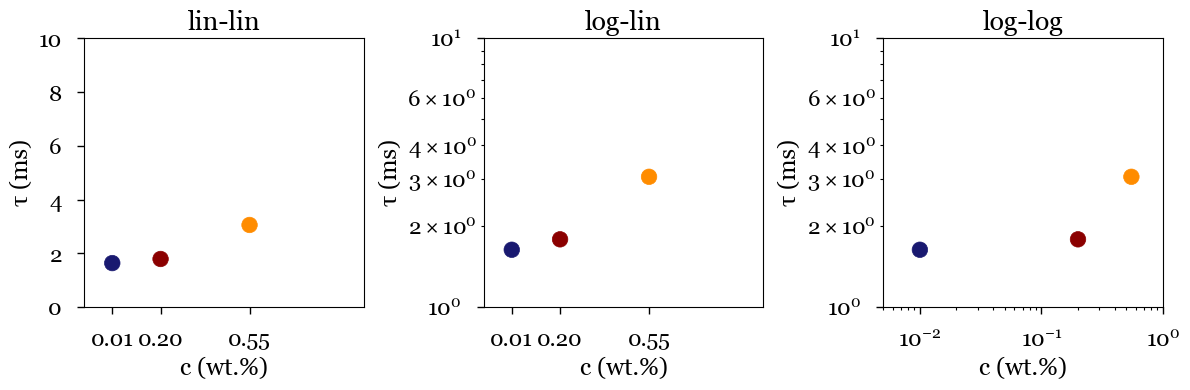

In [571]:
# Plot tau 

tau_CNF_050NaCl = np.array([tau_fit_cnf001_050nacl, tau_fit_cnf02_050nacl, tau_fit_cnf055_050nacl])
colors = ['midnightblue', 'darkred', 'darkorange']
plt.style.use('_mpl-gallery-nogrid')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

#fig.subtitle('Lag time as a function of NaCl concentrations with 0.01wt.%CNF at 65.1\u00b0 2D Auto')
axes[0].scatter(cnf_conc, tau_CNF_050NaCl , c=colors)
axes[0].set_title('lin-lin')
axes[0].set_xlabel('c (wt.%)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_ylim(0,10)
axes[0].set_xlim(-0.1, 1)
axes[0].set_xticks([0.01,0.2,0.55])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

axes[1].scatter(cnf_conc, tau_CNF_050NaCl , c=colors)
axes[1].set_title('log-lin')
axes[1].set_xlabel('c (wt.%)')
axes[1].set_ylabel('\u03C4 (ms)')
axes[1].set_ylim(1,10)
axes[1].set_xlim(-0.1,1)
axes[1].set_xticks([0.01,0.2,0.55])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")

axes[2].scatter(cnf_conc, tau_CNF_050NaCl , c=colors)
axes[2].set_title('log-log')
axes[2].set_xlabel('c (wt.%)')
axes[2].set_ylabel('\u03C4 (ms)')
axes[2].set_ylim(1,10)
axes[2].set_xlim(0.005,1)
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
plt.savefig("Lag time as a function of CNF concentrations with 5mM NaCl at 65.1\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

# 10mM NaCl

In [291]:
# Table using DataFrame

samples_CNF_100NaCl = ['0.01wt.%CNF', '0.2wt.%CNF', '0.55wt.%CNF']
A_fitted_CNF_100NaCl = [A_fit_cnf001_100nacl, A_fit_cnf02_100nacl, A_fit_cnf055_100nacl,]
t_fitted_CNF_100NaCl = [tau_fit_cnf001_100nacl, tau_fit_cnf02_100nacl, tau_fit_cnf055_100nacl]
beta_fitted_CNF_100NaCl =  [beta_fit_cnf001_100nacl, beta_fit_cnf02_100nacl, beta_fit_cnf055_100nacl,]
table_Parameters_CNF_100NaCl = {
    '10.0mM NaCl with': samples_CNF_100NaCl ,
    'A' : A_fitted_CNF_100NaCl,
    '\u03C4 (ms)': t_fitted_CNF_100NaCl,
    '\u03B2': beta_fitted_CNF_100NaCl,
}

table_Parameters_CNF_100NaCl_draw = pd.DataFrame(table_Parameters_CNF_100NaCl)

styled_table_Parameters_CNF_100NaCl_draw = table_Parameters_CNF_100NaCl_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='Reds') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.3f}', '\u03B2': '{:.3f}'})\
    .hide(axis='index')

styled_table_Parameters_CNF_100NaCl_draw        

In [572]:
# Save the styled table method 1
# Convert styled DataFrame to HTML table
html_styled_table_Parameters_CNF_100NaCl = styled_table_Parameters_CNF_100NaCl_draw.to_html()

# Save the HTML table to a temporary file
with open('temp.html', 'w') as f:
    f.write(html_styled_table_Parameters_CNF_100NaCl)
    
# Save the HTML table as a PNG image
imgkit.from_file('temp.html', 'Table of Fitted Parameters for 10mM NaCl with CNF.png', options=options)

True

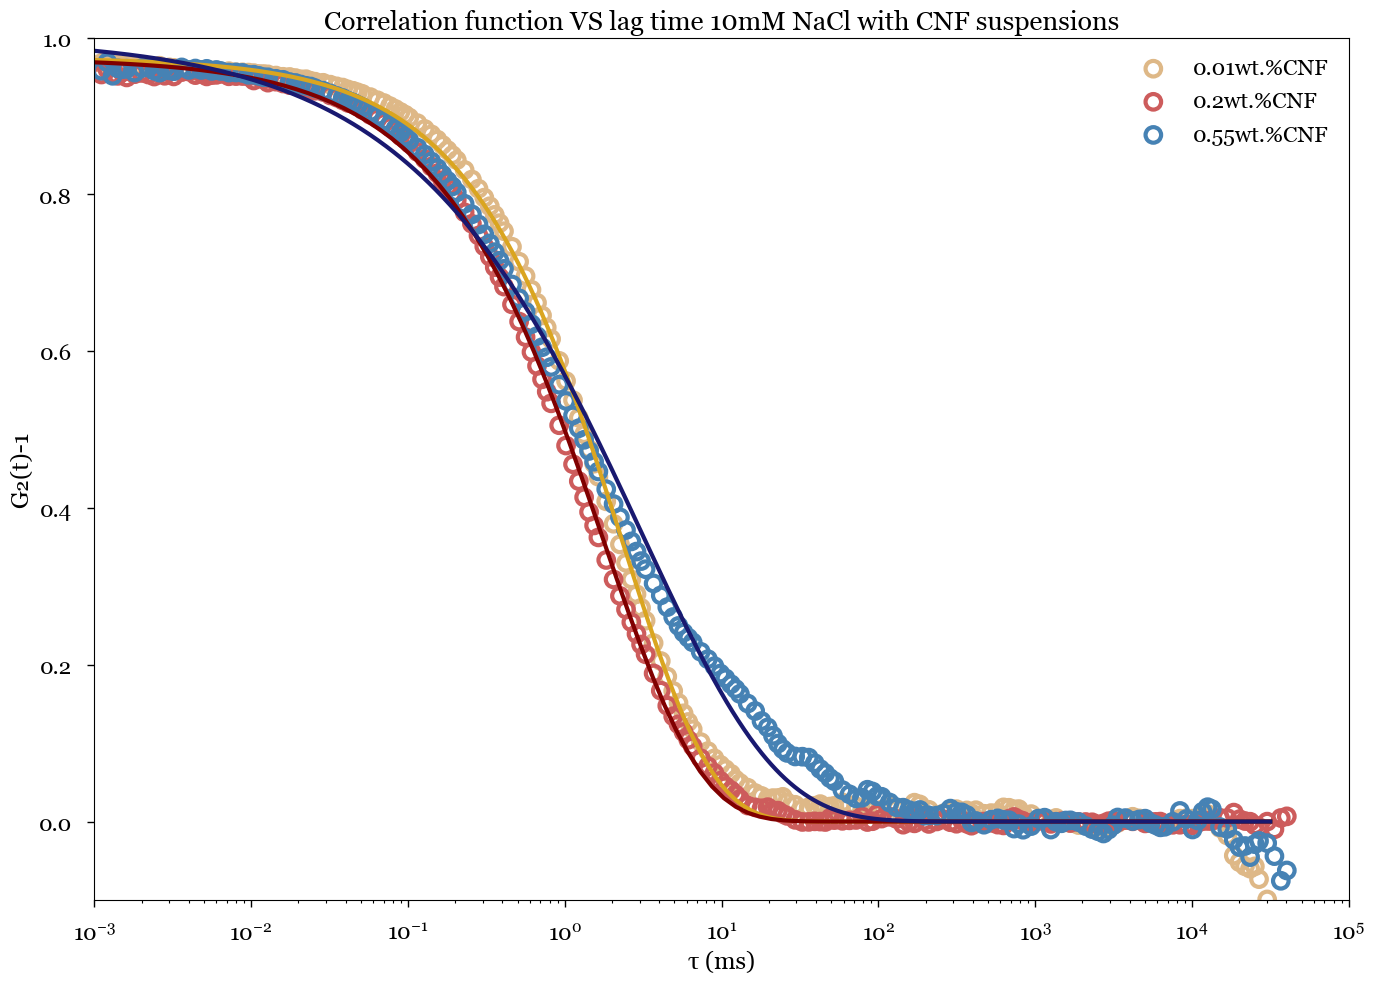

In [573]:
# Plot the fitting 

plt.style.use('seaborn-poster')
plt.scatter(t_cnf001_100nacl, g_t_cnf001_100nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='burlywood', label = '0.01wt.%CNF')
plt.semilogx(t_fit_cnf001_100nacl, g_fit_cnf001_100nacl,  linestyle='solid', color = 'goldenrod', linewidth = 3)# 4, label='0.01wt.%CNF fit')
plt.scatter(t_cnf02_100nacl, g_t_cnf02_100nacl,  marker='o', facecolors='none', linewidths=3, edgecolors='indianred', label = '0.2wt.%CNF')
plt.semilogx(t_fit_cnf02_100nacl, g_fit_cnf02_100nacl, linestyle='solid', color = 'maroon', linewidth = 3)# label='0.2wt.%CNF fit')
plt.scatter(t_cnf055_100nacl, g_t_cnf055_100nacl, marker='o', facecolors='none', linewidths=3, edgecolors='steelblue', label = '0.55wt.%CNF')
plt.semilogx(t_fit_cnf055_100nacl, g_fit_cnf055_100nacl, linestyle='solid', color = 'midnightblue', linewidth = 3)# label='0.55wt.%CNF fit')

plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')
plt.xscale("log")
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time 10mM NaCl with CNF suspensions') 
plt.savefig("Correlation function VS Scattering angle_10mMNaCl at 65.1deg fit.png", dpi=1500, bbox_inches='tight')
plt.show()

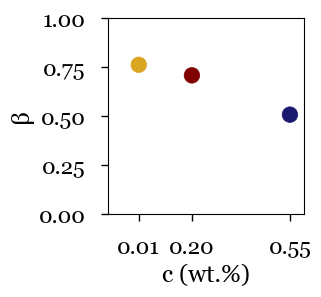

In [574]:
cnf_conc = [0.01, 0.2, 0.55]
beta_100nacl = np.array([beta_fit_cnf001_100nacl,beta_fit_cnf02_100nacl,beta_fit_cnf055_100nacl])

colors = ['goldenrod', 'maroon', 'midnightblue']
plt.style.use('_mpl-gallery-nogrid')
# plot
plt.scatter(cnf_conc, beta_100nacl, c=colors)
plt.xlabel('c (wt.%)')
plt.ylabel('\u03B2')
plt.xlim(-0.1,0.6)
plt.ylim(0,1)
plt.xticks([0.01,0.2,0.55])
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
#plt.title('Stretched exponential function vs CNF concentrations')
plt.savefig("Stretched exponential function vs CNF concentrations 10mMNaCl.png", dpi=1500, bbox_inches='tight')
plt.show()

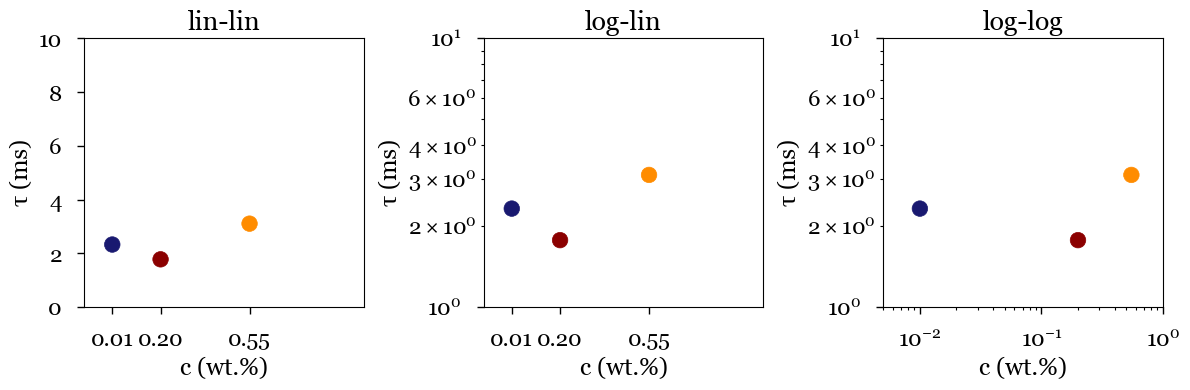

In [575]:
# Plot tau 

tau_CNF_100NaCl = np.array([tau_fit_cnf001_100nacl, tau_fit_cnf02_100nacl, tau_fit_cnf055_100nacl])
colors = ['midnightblue', 'darkred', 'darkorange']
plt.style.use('_mpl-gallery-nogrid')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

#fig.subtitle('Lag time as a function of NaCl concentrations with 0.01wt.%CNF at 65.1\u00b0 2D Auto')
axes[0].scatter(cnf_conc, tau_CNF_100NaCl , c=colors)
axes[0].set_title('lin-lin')
axes[0].set_xlabel('c (wt.%)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_ylim(0,10)
axes[0].set_xlim(-0.1, 1)
axes[0].set_xticks([0.01,0.2,0.55])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

axes[1].scatter(cnf_conc, tau_CNF_100NaCl , c=colors)
axes[1].set_title('log-lin')
axes[1].set_xlabel('c (wt.%)')
axes[1].set_ylabel('\u03C4 (ms)')
axes[1].set_ylim(1,10)
axes[1].set_xlim(-0.1,1)
axes[1].set_xticks([0.01,0.2,0.55])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")

axes[2].scatter(cnf_conc, tau_CNF_100NaCl , c=colors)
axes[2].set_title('log-log')
axes[2].set_xlabel('c (wt.%)')
axes[2].set_ylabel('\u03C4 (ms)')
axes[2].set_ylim(1,10)
axes[2].set_xlim(0.005,1)
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
plt.savefig("Lag time as a function of CNF concentrations with 10mM NaCl at 65.1\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

# Plot Overall against [CNF]

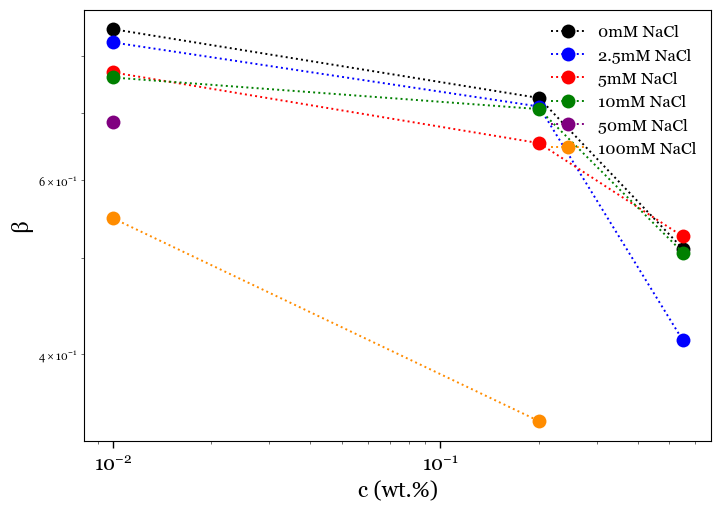

In [576]:
cnf_conc = [0.01, 0.2, 0.55]
beta_neatCNF = np.array([beta_fit_cnf001, beta_fit_cnf02, beta_fit_cnf055])
beta_025nacl = np.array([beta_fit_cnf001_025nacl, beta_fit_cnf02_025nacl, beta_fit_cnf055_025nacl])
beta_050nacl = np.array([beta_fit_cnf001_050nacl, beta_fit_cnf02_050nacl, beta_fit_cnf055_050nacl])
beta_100nacl = np.array([beta_fit_cnf001_100nacl, beta_fit_cnf02_100nacl, beta_fit_cnf055_100nacl])
cnf_conc_500nacl = [0.01]
beta_500nacl = [beta_fit_cnf001_500nacl]
cnf_conc_1000nacl = [0.01, 0.2]
beta_1000nacl = np.array([beta_fit_cnf001_1000nacl, beta_fit_cnf02_1000nacl])

plt.style.use('seaborn-paper')
plt.plot(cnf_conc, beta_neatCNF, linestyle=":", marker="o", c='black', markersize=10, label = '0mM NaCl')
plt.plot(cnf_conc, beta_025nacl, linestyle=":", marker="o", c='blue', markersize=10, label = '2.5mM NaCl')
plt.plot(cnf_conc, beta_050nacl, linestyle=":", marker="o", c='red', markersize=10, label = '5mM NaCl')
plt.plot(cnf_conc, beta_100nacl, linestyle=":", marker="o", c='green', markersize=10, label = '10mM NaCl')
plt.plot(cnf_conc_500nacl, beta_500nacl, linestyle=":", marker="o", c='purple', markersize=10,label = '50mM NaCl')
plt.plot(cnf_conc_1000nacl, beta_1000nacl, linestyle=":", marker="o", c='darkorange', markersize=10, label = '100mM NaCl')

plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('c (wt.%)', fontsize=16)
plt.ylabel('\u03B2', fontsize=16)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
plt.legend(frameon=False, fontsize=12, loc='upper right')
plt.yscale('log')
plt.xscale('log')
#plt.title('Stretched exponential function vs CNF concentrations')
plt.savefig("Stretched exponential function vs CNF Concentration all NaCl Conc_Colored.png", dpi=1500, bbox_inches='tight')
plt.show()

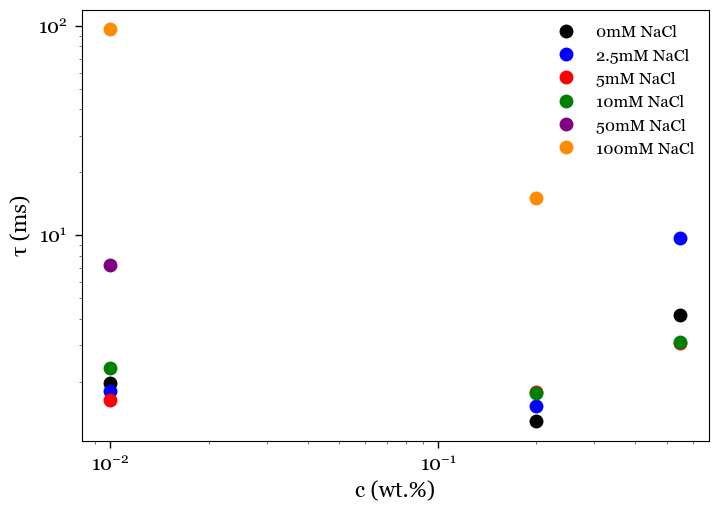

In [577]:
cnf_conc = [0.01, 0.2, 0.55]
tau_neatCNF = np.array([tau_fit_cnf001, tau_fit_cnf02, tau_fit_cnf055])
tau_025nacl = np.array([tau_fit_cnf001_025nacl,tau_fit_cnf02_025nacl,tau_fit_cnf055_025nacl])
tau_050nacl = np.array([tau_fit_cnf001_050nacl,tau_fit_cnf02_050nacl,tau_fit_cnf055_050nacl])
tau_100nacl = np.array([tau_fit_cnf001_100nacl,tau_fit_cnf02_100nacl,tau_fit_cnf055_100nacl])
cnf_conc_500nacl = [0.01]
tau_500nacl = [tau_fit_cnf001_500nacl]
cnf_conc_1000nacl = [0.01, 0.2]
tau_1000nacl = np.array([tau_fit_cnf001_1000nacl, tau_fit_cnf02_1000nacl])

# plot
#plt.scatter(cnf_conc, tau_neatCNF, marker='o', facecolors='black', linewidths=5, edgecolors='black', label = '0mM NaCl')
#plt.scatter(cnf_conc, tau_025nacl, marker='o', facecolors='midnightblue', linewidths=5, edgecolors='midnightblue', label = '2.5mM NaCl')
#plt.scatter(cnf_conc, tau_050nacl, marker='o', facecolors='darkred', linewidths=5, edgecolors='darkred', label = '5mM NaCl')
#plt.scatter(cnf_conc, tau_100nacl, marker='o', facecolors='darkgreen', linewidths=5, edgecolors='darkgreen', label = '10mM NaCl')
#plt.scatter(cnf_conc_500nacl, tau_500nacl, marker='o', facecolor='darkpurple', linewidth=5, edgecolor='darkpurple', label = '50mM NaCl')
#plt.scatter(cnf_conc_1000nacl, tau_1000nacl, marker='o', facecolors='darkorange', linewidths=5, edgecolors='darkorange', label = '100mM NaCl')
plt.style.use('seaborn-paper')
plt.plot(cnf_conc, tau_neatCNF, linestyle="", marker="o", c='black', markersize=10, label = '0mM NaCl')
plt.plot(cnf_conc, tau_025nacl, linestyle="", marker="o", c='blue', markersize=10, label = '2.5mM NaCl')
plt.plot(cnf_conc, tau_050nacl, linestyle="", marker="o", c='red', markersize=10, label = '5mM NaCl')
plt.plot(cnf_conc, tau_100nacl, linestyle="", marker="o", c='green', markersize=10, label = '10mM NaCl')
plt.plot(cnf_conc_500nacl, tau_500nacl, linestyle="", marker="o", c='purple', markersize=10,label = '50mM NaCl')
plt.plot(cnf_conc_1000nacl, tau_1000nacl, linestyle="", marker="o", c='darkorange', markersize=10, label = '100mM NaCl')

plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('c (wt.%)', fontsize=16)
plt.ylabel('\u03C4 (ms)', fontsize=16)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
plt.legend(frameon=False, fontsize=12, loc='upper right')
plt.yscale('log')
plt.xscale('log')
#plt.title('Relaxation time vs CNF concentrations')
plt.savefig("Relaxation time vs CNF Concentration all NaCl Conc_Colored.png", dpi=1500, bbox_inches='tight')
plt.show()

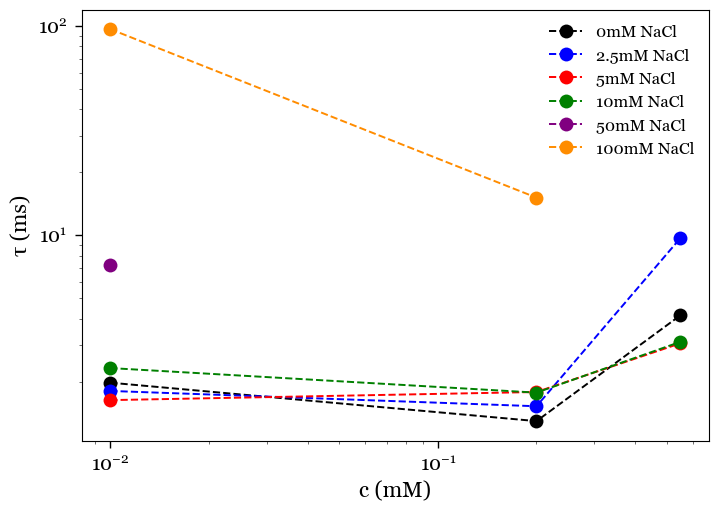

In [578]:
plt.plot(cnf_conc, tau_neatCNF, linestyle="--", marker="o", c='black', markersize=10, label = '0mM NaCl')
plt.plot(cnf_conc, tau_025nacl, linestyle="--", marker="o", c='blue', markersize=10, label = '2.5mM NaCl')
plt.plot(cnf_conc, tau_050nacl, linestyle="--", marker="o", c='red', markersize=10, label = '5mM NaCl')
plt.plot(cnf_conc, tau_100nacl, linestyle="--", marker="o", c='green', markersize=10, label = '10mM NaCl')
plt.plot(cnf_conc_500nacl, tau_500nacl, linestyle="--", marker="o", c='purple', markersize=10,label = '50mM NaCl')
plt.plot(cnf_conc_1000nacl, tau_1000nacl, linestyle="--", marker="o", c='darkorange', markersize=10, label = '100mM NaCl')
plt.style.use('seaborn-paper')
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('c (mM)', fontsize=16)
plt.ylabel('\u03C4 (ms)', fontsize=16)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=14)
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=14)
plt.legend(frameon=False, fontsize=12, loc='upper right')
plt.yscale('log')
plt.xscale('log')
#plt.title('Relaxation time vs CNF concentrations')
plt.savefig("Relaxation time vs CNF Concentration all NaCl Conc_Colored_Lined.png", dpi=1500, bbox_inches='tight')
plt.show()

# Calculations for mean gamma

In [316]:
import scipy.special
from sympy import symbols, integrate, exp, gamma

t, tau_K, beta = symbols('t tau_K beta')
integral = integrate(exp(-((t / tau_K)**beta)), (t, 0, float('inf')))
average_tau = tau_K / beta * gamma(1 / beta)

equation = f"\u27E8\u27E9 \u2261 \u222B\u2080\u221E dt\u2009e^(-(t/tau_K)^beta) = (tau_K / beta) \u0393((1 / beta))"

#print(equation)

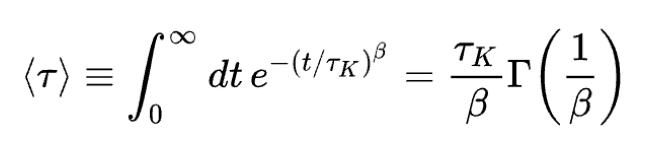

In [317]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("/Users/ningravi/Desktop/Python/eq.png")
plt.imshow(img)
plt.axis('off')  # Optional: Hide the axes
plt.show()

# Tau

In [319]:
# assign data sets

#tau_all_byCNF = np.array([[tau_fit_cnf001_0nacl, tau_fit_cnf001_025nacl, tau_fit_cnf001_050nacl, tau_fit_cnf001_100nacl, tau_fit_cnf001_500nacl, tau_fit_cnf001_1000nacl],
#                          [tau_fit_cnf02_0nacl, tau_fit_cnf02_025nacl, tau_fit_cnf02_050nacl, tau_fit_cnf02_100nacl, tau_fit_cnf02_1000nacl],
#                          [tau_fit_cnf055_0nacl, tau_fit_cnf055_025nacl, tau_fit_cnf055_050nacl, tau_fit_cnf055_100nacl]])
#print(tau_all_byCNF)

tau_neatCNF = np.array([tau_fit_cnf001, tau_fit_cnf02, beta_fit_cnf055])
tau_025nacl = np.array([tau_fit_cnf001_025nacl,tau_fit_cnf02_025nacl,tau_fit_cnf055_025nacl])
tau_050nacl = np.array([tau_fit_cnf001_050nacl,tau_fit_cnf02_050nacl,tau_fit_cnf055_050nacl])
tau_100nacl = np.array([tau_fit_cnf001_100nacl,tau_fit_cnf02_100nacl,tau_fit_cnf055_100nacl])

tau_all_byNaCl = np.array([[tau_fit_cnf001, tau_fit_cnf02, beta_fit_cnf055], 
                          [tau_fit_cnf001_025nacl,tau_fit_cnf02_025nacl,tau_fit_cnf055_025nacl],
                          [tau_fit_cnf001_050nacl,tau_fit_cnf02_050nacl,tau_fit_cnf055_050nacl],
                          [tau_fit_cnf001_100nacl,tau_fit_cnf02_100nacl,tau_fit_cnf055_100nacl]])

# Beta

In [252]:
beta_cnf001_NaCl = np.array([beta_fit_cnf001_0nacl, beta_fit_cnf001_025nacl, beta_fit_cnf001_050nacl, beta_fit_cnf001_100nacl, beta_fit_cnf001_500nacl, beta_fit_cnf001_1000nacl])
beta_cnf02_NaCl = np.array([beta_fit_cnf02_0nacl, beta_fit_cnf02_025nacl, beta_fit_cnf02_050nacl, beta_fit_cnf02_100nacl, beta_fit_cnf02_1000nacl])
beta_cnf055_NaCl = np.array([beta_fit_cnf055_0nacl, beta_fit_cnf055_025nacl, beta_fit_cnf055_050nacl, beta_fit_cnf055_100nacl])

beta_neatCNF = np.array([beta_fit_cnf001, beta_fit_cnf02, beta_fit_cnf055])
beta_025nacl = np.array([beta_fit_cnf001_025nacl,beta_fit_cnf02_025nacl,beta_fit_cnf055_025nacl])
beta_050nacl = np.array([beta_fit_cnf001_050nacl,beta_fit_cnf02_050nacl,beta_fit_cnf055_050nacl])
beta_100nacl = np.array([beta_fit_cnf001_100nacl,beta_fit_cnf02_100nacl,beta_fit_cnf055_100nacl])

# Mean Tau

In [320]:
tau_cnf001_NaCl = np.array([tau_fit_cnf001_0nacl, tau_fit_cnf001_025nacl, tau_fit_cnf001_050nacl, tau_fit_cnf001_100nacl, tau_fit_cnf001_500nacl, tau_fit_cnf001_1000nacl])
beta_cnf001_NaCl = np.array([beta_fit_cnf001_0nacl, beta_fit_cnf001_025nacl, beta_fit_cnf001_050nacl, beta_fit_cnf001_100nacl, beta_fit_cnf001_500nacl, beta_fit_cnf001_1000nacl])

meantau_cnf001s_nacl = ["meantau_0.01wt.%CNF_0mMnacl", "meantau_0.01wt.%CNF_2.5mMnacl", "meantau_0.01wt.%CNF_5mMnacl", "meantau_0.01wt.%CNF_10mMnacl", "meantau_0.01wt.%CNF_50mMnacl", "meantau_0.01wt.%CNF_100mMnacl"]
meantau_cnf001s = {}

import scipy.special

for i in range(len(tau_cnf001_NaCl)):
    meantau_cnf001 = (tau_cnf001_NaCl[i]/beta_cnf001_NaCl[i])*scipy.special.gamma(1/beta_cnf001_NaCl[i])
    name = meantau_cnf001s_nacl[i]
    meantau_cnf001s[name] = meantau_cnf001

#for name, meantau_cnf001 in meantau_cnf001s.items():
#    print(f"{name}: {meantau_cnf001}")

In [321]:
tau_cnf02_NaCl = np.array([tau_fit_cnf02_0nacl, tau_fit_cnf02_025nacl, tau_fit_cnf02_050nacl, tau_fit_cnf02_100nacl, tau_fit_cnf02_1000nacl])
beta_cnf02_NaCl = np.array([beta_fit_cnf02_0nacl, beta_fit_cnf02_025nacl, beta_fit_cnf02_050nacl, beta_fit_cnf02_100nacl, beta_fit_cnf02_1000nacl])

meantau_cnf02s_nacl = ["meantau_0.2wt.%CNF_0mMnacl", "meantau_0.2wt.%CNF_2.5mMnacl", "meantau_0.2wt.%CNF_5mMnacl", "meantau_0.2wt.%CNF_10mMnacl", "meantau_0.2wt.%CNF_100mMnacl"]
meantau_cnf02s = {}

import scipy.special

for i in range(len(tau_cnf02_NaCl)):
    meantau_cnf02 = (tau_cnf02_NaCl[i]/beta_cnf02_NaCl[i])*scipy.special.gamma(1/beta_cnf02_NaCl[i])
    name = meantau_cnf02s_nacl[i]
    meantau_cnf02s[name] = meantau_cnf02

#for name, meantau_cnf02 in meantau_cnf02s.items():
#    print(f"{name}: {meantau_cnf02}")

In [322]:
tau_cnf055_NaCl = np.array([tau_fit_cnf055_0nacl, tau_fit_cnf055_025nacl, tau_fit_cnf055_050nacl, tau_fit_cnf055_100nacl])
beta_cnf055_NaCl = np.array([beta_fit_cnf055_0nacl, beta_fit_cnf055_025nacl, beta_fit_cnf055_050nacl, beta_fit_cnf055_100nacl])

meantau_cnf055s_nacl = ["meantau_0.55wt.%CNF_0mMnacl", "meantau_0.55wt.%CNF_2.5mMnacl", "meantau_0.55wt.%CNF_5mMnacl", "meantau_0.55wt.%CNF_10mMnacl", "meantau_0.55wt.%CNF_100mMnacl"]
meantau_cnf055s = {}

import scipy.special

for i in range(len(tau_cnf055_NaCl)):
    meantau_cnf055 = (tau_cnf055_NaCl[i]/beta_cnf055_NaCl[i])*scipy.special.gamma(1/beta_cnf055_NaCl[i])
    name = meantau_cnf055s_nacl[i]
    meantau_cnf055s[name] = meantau_cnf055

#for name, meantau_cnf055 in meantau_cnf055s.items():
#    print(f"{name}: {meantau_cnf055}")

In [323]:
tau_neatCNF = np.array([tau_fit_cnf001, tau_fit_cnf02, tau_fit_cnf055])
beta_neatCNF = np.array([beta_fit_cnf001, beta_fit_cnf02, beta_fit_cnf055])

meantau_0mMNaCls_cnf = ["meantau_0.01wt.%CNF_0mMnacl", "meantau_0.2wt.%CNF_0mMnacl", "meantau_0.55wt.%CNF_0mMnacl"]
meantau_0mMNaCls = {}

import scipy.special

for i in range(len(tau_neatCNF)):
    meantau_0mMNaCl = (tau_neatCNF[i]/beta_neatCNF[i])*scipy.special.gamma(1/beta_neatCNF[i])
    name = meantau_0mMNaCls_cnf[i]
    meantau_0mMNaCls[name] = meantau_0mMNaCl

#for name, meantau_0mMNaCl in meantau_0mMNaCls.items():
#    print(f"{name}: {meantau_0mMNaCl}")

In [324]:
tau_025nacl = np.array([tau_fit_cnf001_025nacl,tau_fit_cnf02_025nacl,tau_fit_cnf055_025nacl])
beta_025nacl = np.array([beta_fit_cnf001_025nacl,beta_fit_cnf02_025nacl,beta_fit_cnf055_025nacl])

meantau_025mMNaCls_cnf = ["meantau_0.01wt.%CNF_2.5mMnacl", "meantau_0.2wt.%CNF_2.5mMnacl", "meantau_0.55wt.%CNF_2.5mMnacl"]
meantau_025mMNaCls = {}

import scipy.special

for i in range(len(tau_025nacl)):
    meantau_025mMNaCl = (tau_025nacl[i]/beta_025nacl[i])*scipy.special.gamma(1/beta_025nacl[i])
    name = meantau_025mMNaCls_cnf[i]
    meantau_025mMNaCls[name] = meantau_025mMNaCl

#for name, meantau_025mMNaCl in meantau_025mMNaCls.items():
#    print(f"{name}: {meantau_025mMNaCl}")

In [325]:
tau_050nacl = np.array([tau_fit_cnf001_050nacl,tau_fit_cnf02_050nacl,tau_fit_cnf055_050nacl])
beta_050nacl = np.array([beta_fit_cnf001_050nacl,beta_fit_cnf02_050nacl,beta_fit_cnf055_050nacl])

meantau_050mMNaCls_cnf = ["meantau_0.01wt.%CNF_5mMnacl", "meantau_0.2wt.%CNF_5mMnacl", "meantau_0.55wt.%CNF_5mMnacl"]
meantau_050mMNaCls = {}

import scipy.special

for i in range(len(tau_050nacl)):
    meantau_050mMNaCl = (tau_050nacl[i]/beta_050nacl[i])*scipy.special.gamma(1/beta_050nacl[i])
    name = meantau_050mMNaCls_cnf[i]
    meantau_050mMNaCls[name] = meantau_050mMNaCl

#for name, meantau_050mMNaCl in meantau_050mMNaCls.items():
#    print(f"{name}: {meantau_050mMNaCl}")

In [326]:
tau_100nacl = np.array([tau_fit_cnf001_100nacl,tau_fit_cnf02_100nacl,tau_fit_cnf055_100nacl])
beta_100nacl = np.array([beta_fit_cnf001_100nacl,beta_fit_cnf02_100nacl,beta_fit_cnf055_100nacl])

meantau_100mMNaCls_cnf = ["meantau_0.01wt.%CNF_10mMnacl", "meantau_0.2wt.%CNF_10mMnacl", "meantau_0.55wt.%CNF_10mMnacl"]
meantau_100mMNaCls = {}

import scipy.special

for i in range(len(tau_050nacl)):
    meantau_100mMNaCl = (tau_100nacl[i]/beta_100nacl[i])*scipy.special.gamma(1/beta_100nacl[i])
    name = meantau_100mMNaCls_cnf[i]
    meantau_100mMNaCls[name] = meantau_100mMNaCl

#for name, meantau_100mMNaCl in meantau_100mMNaCls.items():
#    print(f"{name}: {meantau_100mMNaCl}")

#_______________________________________________________________

#from tabulate import tabulate
#table = []
#for name, meantau_100mMNaCl in meantau_100mMNaCls.items():
#    table.append([name, meantau_100mMNaCl])
#headers = ["Name", "Result"]
#print(tabulate(table, headers, tablefmt="fancy_grid"))

#print(meantau_100mMNaCls)

# Extract only the values from the dictionary
#meantau_100mMNaCls_values = list(meantau_100mMNaCls.values())

# Print the list of results
#print(meantau_100mMNaCls.values())

# Table of fitting parameters and mean gamma <\u03C4> By CNF Conc

In [398]:
import pandas as pd

#CNF_conc = np.array(["0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.2", "0.2", "0.2", "0.2", "0.2", "0.55", "0.55", "0.55", "0.55"])
CNF_conc = np.array(["", "", "0.01", "", "", "", "", "", "0.2", "", "", "", "0.55", "", ""])
NaCl_conc = np.array(["0", "2.5", "5", "10", "50", "100", "0", "2.5", "5", "10", "100", "0", "2.5", "5", "10"])

tau_all = np.array([tau_fit_cnf001, tau_fit_cnf001_025nacl, tau_fit_cnf001_050nacl, tau_fit_cnf001_100nacl, tau_fit_cnf001_500nacl, tau_fit_cnf001_1000nacl,
           tau_fit_cnf02, tau_fit_cnf02_025nacl, tau_fit_cnf02_050nacl, tau_fit_cnf02_100nacl, tau_fit_cnf02_1000nacl,
           tau_fit_cnf055, tau_fit_cnf055_025nacl, tau_fit_cnf055_050nacl, tau_fit_cnf055_100nacl])
rounded_tau_all = np.round(tau_all, 2)

tau_all_s = tau_all/1000

beta_all = np.array([beta_fit_cnf001, beta_fit_cnf001_025nacl, beta_fit_cnf001_050nacl, beta_fit_cnf001_100nacl, beta_fit_cnf001_500nacl, beta_fit_cnf001_1000nacl,
           beta_fit_cnf02, beta_fit_cnf02_025nacl, beta_fit_cnf02_050nacl, beta_fit_cnf02_100nacl, beta_fit_cnf02_1000nacl,
           beta_fit_cnf055, beta_fit_cnf055_025nacl, beta_fit_cnf055_050nacl, beta_fit_cnf055_100nacl])
rounded_beta_all = np.round(beta_all, 3)

meantau_001 = np.array(list(meantau_cnf001s.values()))
meantau_02 = np.array(list(meantau_cnf02s.values()))
meantau_055 = np.array(list(meantau_cnf055s.values()))
meantau_all = np.concatenate((meantau_001, meantau_02, meantau_055))
rounded_meantau_all = np.round(meantau_all, 3)

meantau_all_s = meantau_all_2 / 1000
rounded_meantau_all_s = np.round(meantau_all_s, 2)

table_full = {
    '[CNF] (wt.%)': CNF_conc,
    '[NaCl] (mM)' : NaCl_conc,
    '\u03C4 (s)': tau_all_s,
    '\u03C4 (ms)': rounded_tau_all,
    '\u03B2': rounded_beta_all,
    '<\u03C4> (s)': meantau_all_s,
    '<\u03C4> (ms)': rounded_meantau_all
}
table_full_draw = pd.DataFrame(table_full)
#print(table_full_draw )

table1 = {
    '[CNF] (wt.%)': CNF_conc,
    '[NaCl] (mM)' : NaCl_conc,
    '\u03C4 (ms)': rounded_tau_all,
    '\u03B2': rounded_beta_all,
    '<\u03C4> (ms)': rounded_meantau_all
}

table1_draw = pd.DataFrame(table1)
print(table1_draw)

   [CNF] (wt.%) [NaCl] (mM)  τ (ms)      β  <τ> (ms)
0                         0    1.98  0.852     2.150
1                       2.5    1.81  0.826     2.002
2          0.01           5    1.63  0.770     1.903
3                        10    2.32  0.761     2.734
4                        50    7.23  0.686     9.327
5                       100   96.81  0.549   165.396
6                         0    1.30  0.726     1.587
7                       2.5    1.53  0.711     1.903
8           0.2           5    1.79  0.653     2.425
9                        10    1.77  0.707     2.223
10                      100   15.16  0.342    82.402
11                        0    4.15  0.511     7.982
12         0.55         2.5    9.71  0.413    29.639
13                        5    3.05  0.526     5.584
14                       10    3.10  0.507     6.055


In [399]:
## Style the table without colors
styled_table_draw = table1_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .format({'\u03C4 [ms]': '{:.2f}', '\u03B2': '{:.3f}', '<\u03C4> [ms]': '{:.2f}'})

## Display the styled DataFrame
styled_table_draw

## Save the styled table to a html table
html_table123 = 'styled_table_draw.html'
styled_table_draw.to_html(html_table123)
#IPython.display.display(IPython.display.HTML( html_table123))

## Convert the HTML file to an image/Save the htmal table to a png file
options = {
    'format': 'png',
    'quiet': '',
    'enable-local-file-access': '',
    'quality': 100,
    'zoom': 3,
    'width': 1200,  # A djust the width and height as needed
    'height': 1200,
    'encoding': 'UTF-8',  # Specify the character encoding
}

image_file123 = 'Extracted Parameters by CNF Conc_no color.png'
imgkit.from_file(html_table123, image_file123, options=options)

True

In [580]:
## Style the table with colors
#columns_for_legend = ['\u03C4 [ms]','\u03B2','<\u03C4> [ms]']
# Create a figure and subplots
#fig, axs = plt.subplots(1, len(columns_for_legend) + 1, figsize=(12, 4), gridspec_kw={'width_ratios': [6, 1, 1, 1]})


styled_table_draw_2 = table1_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='Reds') \
    .format({'\u03C4 [ms]': '{:.2f}', '\u03B2': '{:.3f}', '<\u03C4> [ms]': '{:.2f}'})
html_table124 = 'styled_table_draw_2.html'
styled_table_draw_2.to_html(html_table124)

IPython.display.display(IPython.display.HTML( html_table124))

## Convert the HTML file to an image
options = {
    'format': 'png',
    'quiet': '',
    'enable-local-file-access': '',
    'quality': 100,
    'zoom': 3,
    'width': 1200,  # A djust the width and height as needed
    'height': 1200,
    'encoding': 'UTF-8',  # Specify the character encoding
}
image_file124 = 'Extracted Parameters by CNF Conc.png'
imgkit.from_file(html_table124, image_file124, options=options)

True

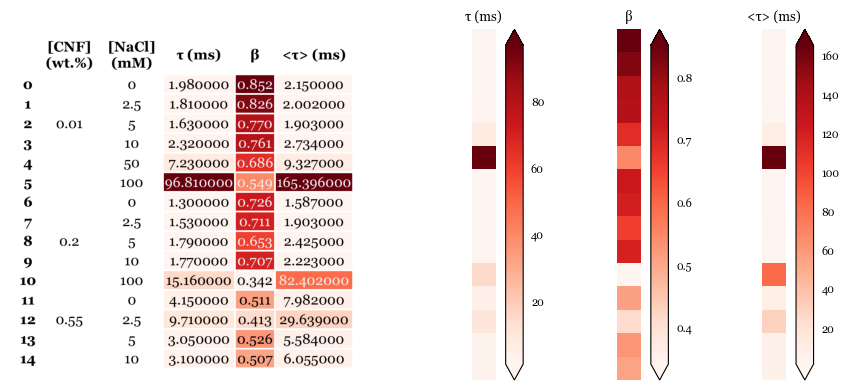

In [581]:
## Save the styled and colored table with color bars
import matplotlib.image as mpimg

fig, axs = plt.subplots(1, 4, figsize=(9,4), gridspec_kw={'width_ratios': [2, 1, 1, 1]})
image_path1 = 'Extracted Parameters by CNF Conc.png'
image1 = mpimg.imread(image_path1)
axs[0].imshow(image1)
colorbar_ax1 = axs[1].imshow(table1_draw['\u03C4 (ms)'].values.reshape(-1, 1), cmap='Reds')
colorbar_ax2 = axs[2].imshow(table1_draw['\u03B2'].values.reshape(-1, 1), cmap='Reds')
colorbar_ax3 = axs[3].imshow(table1_draw['<\u03C4> (ms)'].values.reshape(-1, 1), cmap='Reds')
fig.colorbar(colorbar_ax1, ax=axs[1], extend='both')
fig.colorbar(colorbar_ax2, ax=axs[2], extend='both')
fig.colorbar(colorbar_ax3, ax=axs[3], extend='both')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[3].axis('off')
    
axs[1].set_title('\u03C4 (ms)')
axs[2].set_title('\u03B2')
axs[3].set_title('<\u03C4> (ms)')

#IPython.display.display(IPython.display.HTML(html_table124))

# Adjust the layout
plt.tight_layout()
plt.savefig('Table of Extracted Parameters by CNF Conc.png', dpi=1000)

# Display the figure
plt.show()

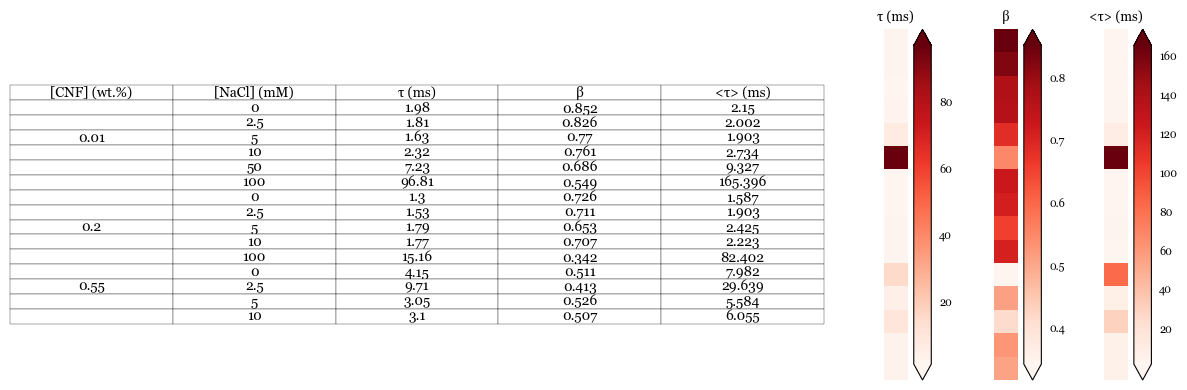

In [402]:
## Plain table with color bars

# Specify columns for color scale legends
columns_for_legend = ['\u03C4 (ms)','\u03B2','<\u03C4> (ms)']

# Create a figure and subplots
fig, axs = plt.subplots(1, len(columns_for_legend) + 1, figsize=(12, 4), gridspec_kw={'width_ratios': [6, 1, 1, 1]})

# Add the table to the first subplot
ax_table = axs[0]
ax_table.axis('off')
table = ax_table.table(cellText=table1_draw.values, colLabels=table1_draw.columns, cellLoc='center', loc='center')

# Add color scale legends for specific columns
for i, col in enumerate(columns_for_legend):
    ax_legend = axs[i + 1]
    cax = ax_legend.imshow(table1_draw[col].values.reshape(-1, 1), cmap='Reds')
    ax_legend.axis('off')
    fig.colorbar(cax, ax=ax_legend, extend='both')

axs[1].set_title('\u03C4 (ms)')
axs[2].set_title('\u03B2')
axs[3].set_title('<\u03C4> (ms)')

# Adjust the layout
plt.tight_layout()

# Display the figure
plt.show()

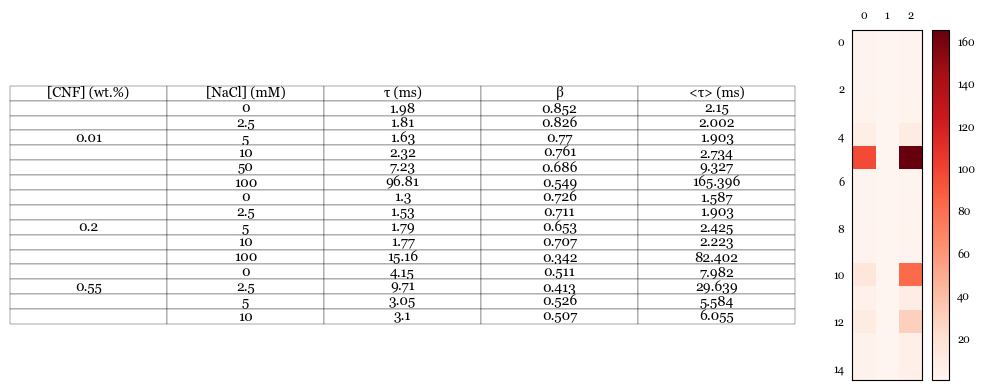

In [403]:
## Plain table with a color bar of the three columns
from matplotlib.gridspec import GridSpec

columns_for_legend = ['\u03C4 (ms)','\u03B2','<\u03C4> (ms)']

# Create a figure with GridSpec
fig = plt.figure(figsize=(10, 4))
gs = GridSpec(1, 2, width_ratios=[4, 1])

# Add the table
ax_table = fig.add_subplot(gs[0])
ax_table.axis('off')
table = ax_table.table(cellText= table1_draw.values, colLabels=table1_draw.columns, cellLoc='center', loc='center')
#table = styled_tablebysalt_draw2

# Add the color scale as a legend for specific columns
ax_legend = fig.add_subplot(gs[1])
cax = ax_legend.matshow(table1_draw[columns_for_legend], cmap='Reds')
fig.colorbar(cax, ax=ax_legend)

# Adjust the layout
plt.tight_layout()

# Display the figure
plt.show()

# Table of fitting parameters and mean gamma <\u03C4> By Salt Conc

In [364]:
import pandas as pd

#NaCl_conc2 = np.array(["0", "0", "0", "2.5", "2.5", "2.5", "5", "5", "5", "10", "10", "10"])
NaCl_conc2 = np.array(["", "0", "", "", "2.5", "", "", "5", "", "", "10", ""])
CNF_conc2 = np.array(["0.01", "0.2", "0.55", "0.01", "0.2", "0.55", "0.01", "0.2", "0.55", "0.01", "0.2", "0.55"])
tau_all2 = np.array([tau_fit_cnf001, tau_fit_cnf02, tau_fit_cnf055,
                    tau_fit_cnf001_025nacl, tau_fit_cnf02_025nacl, tau_fit_cnf055_025nacl,
                    tau_fit_cnf001_050nacl, tau_fit_cnf02_050nacl,  tau_fit_cnf055_050nacl,
                    tau_fit_cnf001_100nacl, tau_fit_cnf02_100nacl,  tau_fit_cnf055_100nacl])

beta_all2 = np.array([beta_fit_cnf001, beta_fit_cnf02, beta_fit_cnf055,
                      beta_fit_cnf001_025nacl, beta_fit_cnf02_025nacl, beta_fit_cnf055_025nacl,
                      beta_fit_cnf001_050nacl,  beta_fit_cnf02_050nacl, beta_fit_cnf055_050nacl,
                      beta_fit_cnf001_100nacl, beta_fit_cnf02_100nacl, beta_fit_cnf055_100nacl])

meantau_0nacl = np.array(list(meantau_0mMNaCls.values()))
meantau_025nacl = np.array(list(meantau_025mMNaCls.values()))
meantau_05nacl = np.array(list(meantau_050mMNaCls.values()))
meantau_100nacl = np.array(list(meantau_100mMNaCls.values()))
meantau_allnacl = np.concatenate((meantau_0nacl, meantau_025nacl, meantau_05nacl, meantau_100nacl))
meantau_all_nacl = np.array(meantau_allnacl)


tablebysalt = {
    '[NaCl] (mM)' : NaCl_conc2,
    '[CNF] (wt.%)': CNF_conc2,
    '\u03C4 [ms]': tau_all2,
    '\u03B2': beta_all2,
    '<\u03C4> [ms]': meantau_all_nacl
}

tablebysalt_draw = pd.DataFrame(tablebysalt)
#print(tablebysalt_draw)

In [344]:
## Style the table without colors
tablebysalt2 = {
    '[NaCl] (mM)' : NaCl_conc2,
    '[CNF] (wt.%)': CNF_conc2,
    '\u03C4 [ms]': tau_all2,
    '\u03B2': beta_all2,
    '<\u03C4> [ms]': meantau_all_nacl
}

tablebysalt_draw2 = pd.DataFrame(tablebysalt2)
#print(tablebysalt_draw2)
# Style the DataFrame
styled_tablebysalt_draw2 = tablebysalt_draw2.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .format({'\u03C4 [ms]': '{:.2f}', '\u03B2': '{:.3f}', '<\u03C4> [ms]': '{:.2f}'})

# Display the styled DataFrame
#styled_tablebysalt_draw2

In [582]:
## Style the table with colors
tablebysalt_draw3 = pd.DataFrame(tablebysalt2)
# Style the DataFrame
styled_tablebysalt_draw3 = tablebysalt_draw3.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='Blues') \
    .format({'\u03C4 [ms]': '{:.2f}', '\u03B2': '{:.3f}', '<\u03C4> [ms]': '{:.2f}'})

# Display the styled DataFrame
#styled_tablebysalt_draw3
html_table133 = 'tablebysalt_draw3.html'
styled_tablebysalt_draw3.to_html(html_table133)

#IPython.display.display(IPython.display.HTML(html_table133))

## Convert the HTML file to an image
options = {
    'format': 'png',
    'quiet': '',
    'enable-local-file-access': '',
    'quality': 100,
    'zoom': 3,
    'width': 1200,  # A djust the width and height as needed
    'height': 1200,
    'encoding': 'UTF-8',  # Specify the character encoding
}
image_file133 = 'Extracted Parameters by Salt Conc.png'
imgkit.from_file(html_table133, image_file133, options=options)

True

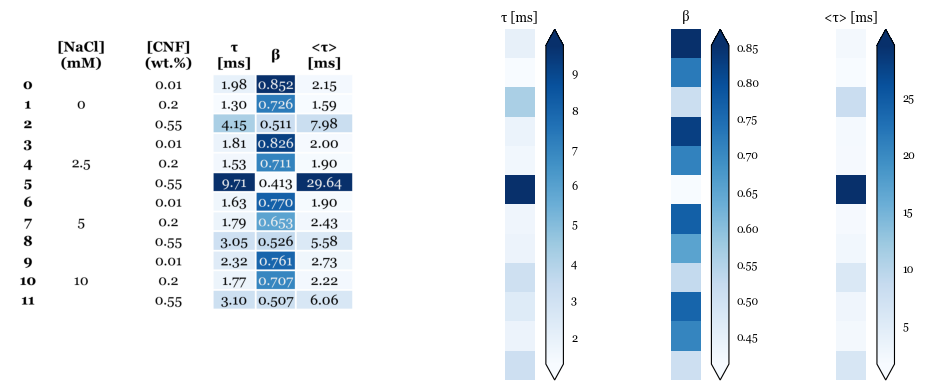

In [583]:
## Save the styled and colored table with color bars
import matplotlib.image as mpimg

fig, axs = plt.subplots(1, 4, figsize=(10,4), gridspec_kw={'width_ratios': [2, 1, 1, 1]})
image_path2 = 'Extracted Parameters by Salt Conc.png'
image2 = mpimg.imread(image_path2)
axs[0].imshow(image2)
colorbar_ax1 = axs[1].imshow(tablebysalt_draw3['\u03C4 [ms]'].values.reshape(-1, 1), cmap='Blues')
colorbar_ax2 = axs[2].imshow(tablebysalt_draw3['\u03B2'].values.reshape(-1, 1), cmap='Blues')
colorbar_ax3 = axs[3].imshow(tablebysalt_draw3['<\u03C4> [ms]'].values.reshape(-1, 1), cmap='Blues')
fig.colorbar(colorbar_ax1, ax=axs[1], extend='both')
fig.colorbar(colorbar_ax2, ax=axs[2], extend='both')
fig.colorbar(colorbar_ax3, ax=axs[3], extend='both')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[3].axis('off')
    
axs[1].set_title('\u03C4 [ms]')
axs[2].set_title('\u03B2')
axs[3].set_title('<\u03C4> [ms]')

#IPython.display.display(IPython.display.HTML(html_table124))

# Adjust the layout
plt.tight_layout()
plt.savefig('Table of Extracted Parameters by Salt Conc.png', dpi=1000)

# Display the figure
plt.show()

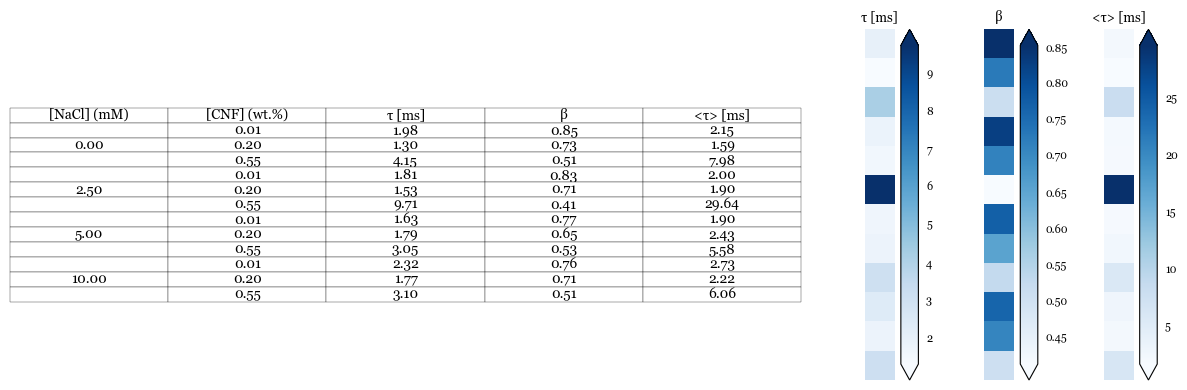

In [355]:
# Specify columns for color scale legends
columns_for_legend = ['\u03C4 [ms]','\u03B2','<\u03C4> [ms]']

# Create a figure and subplots
fig, axs = plt.subplots(1, len(columns_for_legend) + 1, figsize=(12, 4), gridspec_kw={'width_ratios': [6, 1, 1, 1]})

# Add the table to the first subplot
ax_table = axs[0]
ax_table.axis('off')
table = ax_table.table(cellText=tablebysalt_draw.values, colLabels=tablebysalt_draw.columns, cellLoc='center', loc='center')

# Format decimal numbers in the table
decimal_places = 2
for cell in table._cells.values():
    cell_text = cell.get_text().get_text()
    if cell_text.replace('.', '', 1).isdigit():
        rounded_text = "{:.{}f}".format(float(cell_text), decimal_places)
        cell.get_text().set_text(rounded_text)

# Add color scale legends for specific columns
for i, col in enumerate(columns_for_legend):
    ax_legend = axs[i + 1]
    cax = ax_legend.imshow(tablebysalt_draw[col].values.reshape(-1, 1), cmap='Blues')
    ax_legend.axis('off')
    fig.colorbar(cax, ax=ax_legend, extend='both')
    
axs[1].set_title('\u03C4 [ms]')
axs[2].set_title('\u03B2')
axs[3].set_title('<\u03C4> [ms]')

# Adjust the layout
plt.tight_layout()

# Display the figure
plt.show()

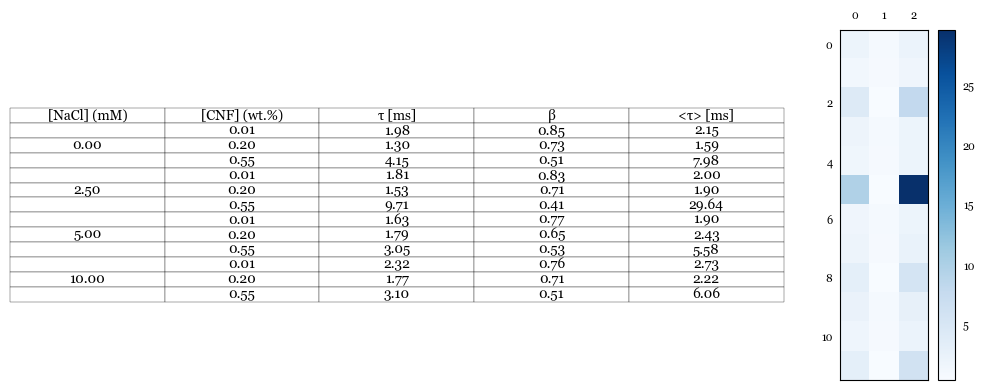

In [357]:
from matplotlib.gridspec import GridSpec

columns_for_legend = ['\u03C4 [ms]','\u03B2','<\u03C4> [ms]']

# Create a figure with GridSpec
fig1 = plt.figure(figsize=(10, 4))
gs1 = GridSpec(1, 2, width_ratios=[4, 1])

# Add the table
ax_table = fig1.add_subplot(gs[0])
ax_table.axis('off')
table = ax_table.table(cellText= tablebysalt_draw.values, colLabels=tablebysalt_draw.columns, cellLoc='center', loc='center')

# Format decimal numbers in the table
decimal_places = 2
for cell in table._cells.values():
    cell_text = cell.get_text().get_text()
    if cell_text.replace('.', '', 1).isdigit():
        rounded_text = "{:.{}f}".format(float(cell_text), decimal_places)
        cell.get_text().set_text(rounded_text)
        
# Add the color scale as a legend for specific columns
ax_legend = fig1.add_subplot(gs1[1])
cax = ax_legend.matshow(tablebysalt_draw[columns_for_legend], cmap='Blues')
fig.colorbar(cax, ax=ax_legend)

# Adjust the layout
plt.tight_layout()

# Display the figure
plt.show()

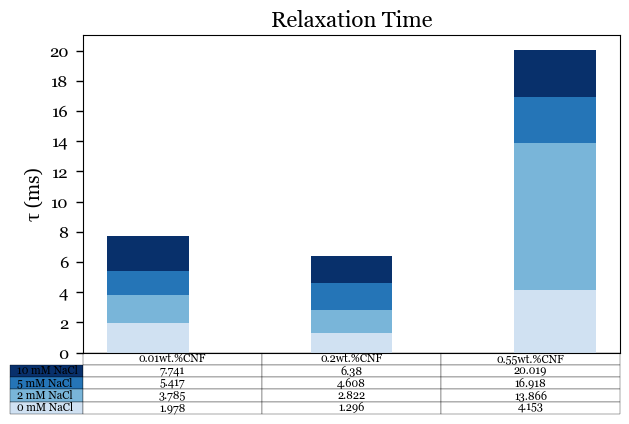

In [584]:
data_t_byCNF = [[tau_fit_cnf001, tau_fit_cnf02, tau_fit_cnf055],
        [tau_fit_cnf001_025nacl, tau_fit_cnf02_025nacl, tau_fit_cnf055_025nacl],
        [tau_fit_cnf001_050nacl, tau_fit_cnf02_050nacl,  tau_fit_cnf055_050nacl],
        [tau_fit_cnf001_100nacl, tau_fit_cnf02_100nacl,  tau_fit_cnf055_100nacl]]
columns_t_byCNF = ('0.01wt.%CNF', '0.2wt.%CNF', '0.55wt.%CNF')
rows_t_byCNF = ['%d mM NaCl' % x for x in (10, 5, 2.5, 0)]

values_t_byCNF = np.arange(0, 22, 2)
value_increment_t_byCNF = 1

# Get some pastel shades for the colors
colors_t_byCNF = plt.cm.Blues(np.linspace(0.2, 1, len(rows_t_byCNF)))
n_rows_t_byCNF = len(data_t_byCNF)

index_t_byCNF = np.arange(len(columns_t_byCNF)) + 0.3
bar_width_t_byCNF = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset_t_byCNF = np.zeros(len(columns_t_byCNF))

# Plot bars and create text labels for the table
cell_text_t_byCNF = []
decimal_places_t_byCNF = 3
for row in range(n_rows_t_byCNF):
    plt.bar(index_t_byCNF, data_t_byCNF[row], bar_width_t_byCNF, bottom=y_offset_t_byCNF, color=colors_t_byCNF[row])
    y_offset_t_byCNF = y_offset_t_byCNF + data_t_byCNF[row]
    cell_text_t_byCNF.append([round(x, decimal_places_t_byCNF) for x in y_offset_t_byCNF])

# Reverse colors and text labels to display the last value at the top.
colors_t_byCNF = colors_t_byCNF[::-1]
cell_text_t_byCNF.reverse()

# Add a table at the bottom of the axes
the_table_t_byCNF = plt.table(cellText=cell_text_t_byCNF,
                      rowLabels=rows_t_byCNF,
                      rowColours=colors_t_byCNF,
                      colLabels=columns_t_byCNF,
                      cellLoc='center',
                      loc='bottom')

# Set the font size of the cell text
font_size = 8  # Set the desired font size# Set the row height
#row_height = 0.2  # Set the desired row height (fraction of the default row height)

for cell in the_table_t_byCNF._cells:
    text = the_table_t_byCNF._cells[cell].get_text()
    text.set_fontsize(font_size)
#for row in range(len(data)):
    #for col in range(len(data[row])):
      #  the_table[row, col].set_height(row_height)
    
# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.style.use('seaborn-paper')
plt.rcParams['font.family'] = 'Georgia'
ylabel = plt.ylabel('\u03C4 (ms)')
ylabel.set_size(14)  # Set the desired size
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=12)
plt.yticks(values_t_byCNF * value_increment_t_byCNF, ['%d' % val for val in values_t_byCNF])
plt.xticks([])
title = plt.title('Relaxation Time')
title.set_size(16)
plt.tight_layout()
plt.savefig('Bar Charts of Relaxatin Time for added NaCl samples as a function of CNF concentration .png', dpi=1000)
plt.show()

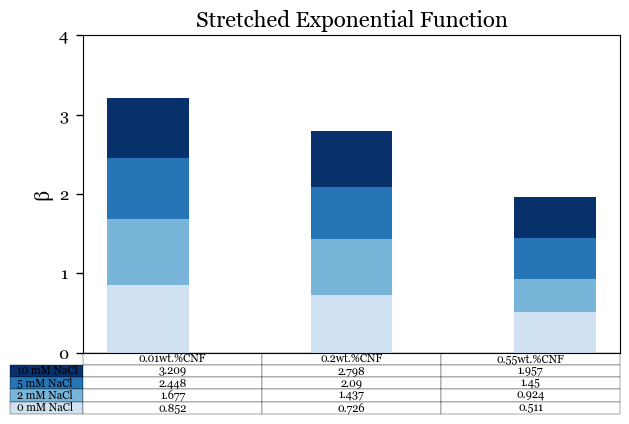

In [585]:
data_b_byCNF = [[beta_fit_cnf001, beta_fit_cnf02, beta_fit_cnf055],
        [beta_fit_cnf001_025nacl, beta_fit_cnf02_025nacl, beta_fit_cnf055_025nacl],
        [beta_fit_cnf001_050nacl, beta_fit_cnf02_050nacl,  beta_fit_cnf055_050nacl],
        [beta_fit_cnf001_100nacl, beta_fit_cnf02_100nacl,  beta_fit_cnf055_100nacl]]
columns_b_byCNF = ('0.01wt.%CNF', '0.2wt.%CNF', '0.55wt.%CNF')
rows_b_byCNF = ['%d mM NaCl' % x for x in (10, 5, 2.5, 0)]

values_b_byCNF = np.arange(0, 5, 1)
value_increment_b_byCNF = 1

# Get some pastel shades for the colors
colors_b_byCNF = plt.cm.Blues(np.linspace(0.2, 1, len(rows_b_byCNF)))
n_rows_b_byCNF = len(data_b_byCNF)

index_b_byCNF = np.arange(len(columns_b_byCNF)) + 0.3
bar_width_b_byCNF = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset_b_byCNF = np.zeros(len(columns_b_byCNF))

# Plot bars and create text labels for the table
cell_text_b_byCNF = []
decimal_places_b_byCNF = 3
for row in range(n_rows_b_byCNF):
    plt.bar(index_b_byCNF, data_b_byCNF[row], bar_width_b_byCNF, bottom=y_offset_b_byCNF, color=colors_b_byCNF[row])
    y_offset_b_byCNF = y_offset_b_byCNF + data_b_byCNF[row]
    cell_text_b_byCNF.append([round(x, decimal_places_b_byCNF) for x in y_offset_b_byCNF])

# Reverse colors and text labels to display the last value at the top.
colors_b_byCNF = colors_b_byCNF[::-1]
cell_text_b_byCNF.reverse()

# Add a table at the bottom of the axes
the_table_b_byCNF = plt.table(cellText=cell_text_b_byCNF,
                      rowLabels=rows_b_byCNF,
                      rowColours=colors_b_byCNF,
                      colLabels=columns_b_byCNF,
                      cellLoc='center',
                      loc='bottom')

# Set the font size of the cell text
font_size = 8  # Set the desired font size# Set the row height
#row_height = 0.2  # Set the desired row height (fraction of the default row height)

for cell in the_table_b_byCNF._cells:
    text = the_table_b_byCNF._cells[cell].get_text()
    text.set_fontsize(font_size)
#for row in range(len(data)):
    #for col in range(len(data[row])):
      #  the_table[row, col].set_height(row_height)
    
# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.style.use('seaborn-paper')
plt.rcParams['font.family'] = 'Georgia'
ylabel = plt.ylabel('\u03B2')
ylabel.set_size(14)  # Set the desired size
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=12)
plt.yticks(values_b_byCNF * value_increment_b_byCNF, ['%d' % val for val in values_b_byCNF])
plt.xticks([])
title = plt.title('Stretched Exponential Function')
title.set_size(16)
plt.tight_layout()
plt.savefig('Bar Charts of Stretched Exponential Function for added NaCl samples as a function of CNF concentration .png', dpi=1000)
plt.show()

# Calculation for different Ions

In [477]:
import scipy.special
salt_conc = np.array([2.5, 50])

taucnf001nacl = np.array([tau_fit_cnf001_025nacl, tau_fit_cnf001_500nacl])
betacnf001nacl = np.array([beta_fit_cnf001_025nacl, beta_fit_cnf001_500nacl])
meantau_cnf001s_nacl_2 = ["meantau_0.01wt.%CNF_2.5mMNaCl", "meantau_0.01wt.%CNF_50mMNaCl"]
meantau_cnf001nacls = {}
for i in range(len(taucnf001nacl)):
    meantau_cnf001nacl = (taucnf001nacl[i]/betacnf001nacl[i])*scipy.special.gamma(1/betacnf001nacl[i] )
    namena = meantau_cnf001s_nacl_2[i]
    meantau_cnf001nacls[namena] = meantau_cnf001nacl
for namena, meantau_cnf001nacl in meantau_cnf001nacls.items():
    print(f"{namena}: {meantau_cnf001nacl}")
taucnf001nacl_s = taucnf001nacl/1000
rounded_taucnf001nacl_s = np.round(taucnf001nacl_s, 2)
meantau_nacl = np.array(list(meantau_cnf001nacls.values()))
meantau_nacl_s = meantau_nacl/1000
rounded_meantau_nacl = np.round(meantau_nacl_s, 2)
    
    
taucnf001licl = np.array([tau_fit_cnf001_025licl, tau_fit_cnf001_500licl])
betacnf001licl = np.array([beta_fit_cnf001_025licl, beta_fit_cnf001_500licl])
meantau_cnf001s_licl = ["meantau_0.01wt.%CNF_2.5mMLiCl", "meantau_0.01wt.%CNF_50mMLiCl"]
meantau_cnf001licls = {}
for i in range(len(taucnf001licl)):
    meantau_cnf001licl = (taucnf001licl[i]/betacnf001licl[i])*scipy.special.gamma(1/betacnf001licl[i] )
    nameli = meantau_cnf001s_licl[i]
    meantau_cnf001licls[nameli] = meantau_cnf001licl
for nameli, meantau_cnf001licl in meantau_cnf001licls.items():
    print(f"{nameli}: {meantau_cnf001licl}")
taucnf001licl_s = taucnf001licl/1000
rounded_taucnf001licl_s = np.round(taucnf001licl_s, 2)
meantau_licl = np.array(list(meantau_cnf001licls.values()))
meantau_licl_s = meantau_licl/1000
rounded_meantau_licl = np.round(meantau_licl_s, 2)


taucnf001cscl = np.array([tau_fit_cnf001_025cscl, tau_fit_cnf001_500cscl])
betacnf001cscl = np.array([beta_fit_cnf001_025cscl, beta_fit_cnf001_500cscl])
meantau_cnf001s_cscl = ["meantau_0.01wt.%CNF_2.5mMCsCl", "meantau_0.01wt.%CNF_50mMCsCl"]
meantau_cnf001cscls = {}
for i in range(len(taucnf001cscl)):
    meantau_cnf001cscl = (taucnf001cscl[i]/betacnf001cscl[i])*scipy.special.gamma(1/betacnf001cscl[i] )
    namecs = meantau_cnf001s_cscl[i]
    meantau_cnf001cscls[namecs] = meantau_cnf001cscl
for namecs, meantau_cnf001cscl in meantau_cnf001cscls.items():
    print(f"{namecs}: {meantau_cnf001cscl}")
taucnf001cscl_s = taucnf001cscl/1000
rounded_taucnf001cscl_s = np.round(taucnf001cscl_s, 2)
meantau_cscl = np.array(list(meantau_cnf001cscls.values()))
meantau_cscl_s = meantau_cscl/1000
rounded_meantau_cscl = np.round(meantau_cscl_s, 2)

taucnf001nascn = np.array([tau_fit_cnf001_025nascn, tau_fit_cnf001_500nascn])
betacnf001nascn = np.array([beta_fit_cnf001_025nascn, beta_fit_cnf001_500nascn])
meantau_cnf001s_nascn = ["meantau_0.01wt.%CNF_2.5mMNaSCN", "meantau_0.01wt.%CNF_50mMNaSCN"]
meantau_cnf001nascns = {}
for i in range(len(taucnf001nascn)):
    meantau_cnf001nascn = (taucnf001nascn[i]/betacnf001nascn[i])*scipy.special.gamma(1/betacnf001nascn[i] )
    namescn = meantau_cnf001s_nascn[i]
    meantau_cnf001nascns[namescn] = meantau_cnf001nascn
for namescn, meantau_cnf001nascn in meantau_cnf001nascns.items():
    print(f"{namescn}: {meantau_cnf001nascn}")
taucnf001nascn_s = taucnf001nascn/1000
rounded_taucnf001nascn_s = np.round(taucnf001nascn_s, 2)
meantau_nascn = np.array(list(meantau_cnf001nascns.values()))
meantau_nascn_s = meantau_nascn/1000
rounded_meantau_nascn = np.round(meantau_nascn_s, 2)

taucnf001na2so4 = np.array([tau_fit_cnf001_025na2so4, tau_fit_cnf001_500na2so4])
betacnf001na2so4 = np.array([beta_fit_cnf001_025na2so4, beta_fit_cnf001_500na2so4])
meantau_cnf001s_na2so4 = ["meantau_0.01wt.%CNF_2.5mMNa2SO4", "meantau_0.01wt.%CNF_50mMNa2SO4"]
meantau_cnf001na2so4s = {}
import scipy.special
for i in range(len(taucnf001na2so4)):
    meantau_cnf001na2so4 = (taucnf001na2so4[i]/betacnf001na2so4[i])*scipy.special.gamma(1/betacnf001na2so4[i] )
    namena2so4 = meantau_cnf001s_na2so4[i]
    meantau_cnf001na2so4s[namena2so4] = meantau_cnf001na2so4
for namena2so4, meantau_cnf001na2so4 in meantau_cnf001na2so4s.items():
    print(f"{namena2so4}: {meantau_cnf001na2so4}")
taucnf001na2so4_s = taucnf001na2so4/1000
rounded_taucnf001na2so4_s = np.round(taucnf001na2so4_s, 2)
meantau_na2so4 = np.array(list(meantau_cnf001na2so4s.values()))
meantau_na2so4_s = meantau_na2so4/1000
rounded_meantau_na2so4 = np.round(meantau_na2so4_s, 2)
   


meantau_0.01wt.%CNF_2.5mMNaCl: 2.002332565152848
meantau_0.01wt.%CNF_50mMNaCl: 9.326968667295523
meantau_0.01wt.%CNF_2.5mMLiCl: 1.8806594347580188
meantau_0.01wt.%CNF_50mMLiCl: 10.388485313409996
meantau_0.01wt.%CNF_2.5mMCsCl: 3.1198546780180116
meantau_0.01wt.%CNF_50mMCsCl: 24.759957295653106
meantau_0.01wt.%CNF_2.5mMNaSCN: 3.185299852461291
meantau_0.01wt.%CNF_50mMNaSCN: 12.435551346165655
meantau_0.01wt.%CNF_2.5mMNa2SO4: 2.6645128098764763
meantau_0.01wt.%CNF_50mMNa2SO4: 30.090842038433124


In [588]:
ions = ["LiCl", "", "CsCl", "", "NaCl", "", "NaSCN", "", "Na2SO4", ""]
salt_conc_ions = np.concatenate((salt_conc, salt_conc, salt_conc, salt_conc, salt_conc))
beta_ions = np.concatenate((betacnf001licl, betacnf001cscl, betacnf001nacl, betacnf001nascn, betacnf001na2so4))
tau_ions = np.concatenate((taucnf001licl, taucnf001cscl, taucnf001nacl, taucnf001nascn, taucnf001na2so4))
tau_ions_s = tau_ions/1000
round_tau_ions_s = np.round(tau_ions_s, 2)
meantau_ions = np.concatenate((meantau_licl, meantau_cscl, meantau_nacl, meantau_nascn, meantau_na2so4))
meantau_ions_s = meantau_ions/1000
round_meantau_ions_s = np.round(meantau_ions_s, 2)

table_ions = {
    'Ions' : ions,
    '[Salt] (mM)' : salt_conc_ions,
    '\u03C4 (s)' : tau_ions_s, 
    '\u03C4 (ms)':  tau_ions,
    '\u03B2': beta_ions,
    '<\u03C4> (s)': meantau_ions_s,
    '<\u03C4> (ms)': meantau_ions
}
table_ions_draw = pd.DataFrame(table_ions)
#print(table_ions_draw)

table_ions2 = {
    'Ions' : ions,
    '[Salt] (mM)' : salt_conc_ions,
    '\u03C4 (ms)':  tau_ions,
    '\u03B2': beta_ions,
    '<\u03C4> (ms)': meantau_ions
}
table_ions2_draw = pd.DataFrame(table_ions2)
print(table_ions2_draw)

     Ions  [Salt] (mM)     τ (ms)         β   <τ> (ms)
0    LiCl          2.5   1.693621  0.823564   1.880659
1                 50.0   8.241411  0.703102  10.388485
2    CsCl          2.5   2.424636  0.688284   3.119855
3                 50.0  16.574432  0.603317  24.759957
4    NaCl          2.5   1.806498  0.825822   2.002333
5                 50.0   7.225476  0.686070   9.326969
6   NaSCN          2.5   2.340589  0.652321   3.185300
7                 50.0   9.829812  0.700429  12.435551
8  Na2SO4          2.5   2.219513  0.742613   2.664513
9                 50.0  23.038129  0.678091  30.090842


In [610]:
table_ions2_draw22 = pd.DataFrame(table_ions2)

# Style the DataFrame
styled_table_ions2_draw22 = table_ions2_draw22.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .format({'[Salt] (mM)':'{:.1f}','\u03C4 (ms)': '{:.2f}', '\u03B2': '{:.3f}', '<\u03C4> (ms)': '{:.2f}'}) \
    .hide(axis='index') 

# Display the styled DataFrame
html_table345 = 'styled_table_ions2_draw22.html'
styled_table_ions2_draw22.to_html(html_table345)

IPython.display.display(IPython.display.HTML(html_table345))

## Convert the HTML file to an image
options = {
    'format': 'png',
    'quiet': '',
    'enable-local-file-access': '',
    'quality': 100,
    'zoom': 3,
    'width': 1200,  # A djust the width and height as needed
    'height': 1200,
    'encoding': 'UTF-8',  # Specify the character encoding
}
image_file124 = 'Extracted Parameters Ion Specificity.png'
imgkit.from_file(html_table345, image_file124, options=options)


True

In [612]:
table_ions2_draw3 = pd.DataFrame(table_ions2)

# Style the DataFrame
styled_table_ions2_draw3 = table_ions2_draw3.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(subset=['\u03C4 (ms)', '\u03B2', '<\u03C4> (ms)'], cmap='YlOrBr') \
   .format({'[Salt] (mM)':'{:.1f}','\u03C4 (ms)': '{:.2f}', '\u03B2': '{:.3f}', '<\u03C4> (ms)': '{:.2f}'}) \
    .hide(axis='index')
# Display the styled DataFrame
styled_table_ions2_draw3

html_table346 = 'styled_table_ions2_draw2.html'
styled_table_ions2_draw3.to_html(html_table346)

IPython.display.display(IPython.display.HTML(html_table346))

## Convert the HTML file to an image
options = {
    'format': 'png',
    'quiet': '',
    'enable-local-file-access': '',
    'quality': 100,
    'zoom': 3,
    'width': 1200,  # A djust the width and height as needed
    'height': 1200,
    'encoding': 'UTF-8',  # Specify the character encoding
}
#image_file125 = 'Extracted Parameters Ion Specificity Colored.png'
#imgkit.from_file(html_table346, image_file125, options=options)